In [1]:
import os
import sys
sys.path.insert(0, os.path.join(os.getenv("HOME"), "linked-data-latex"))

import logging
logging.basicConfig(level="INFO")

import pandas as pd
from matplotlib import pylab as plt
from astropy import units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [2]:
# oda:version "v0.1.17"
nsampler=30

In [3]:
from odafunction.executors import default_execute_to_value
from odafunction.func.urifunc import URIipynbFunction, URIValue

focus_obs_name='total_3p'

# TODO: set version restriction here
# TODO: make nb2workflow store in remote storages
# TODO: make possible to disrupt equivalence with indications
# TODO: make common fd/fc depending on

v = default_execute_to_value(URIipynbFunction.from_generic_uri("file:///home/savchenk/grb221009/grbbase.ipynb")(focus_obs_name=focus_obs_name), valueclass=URIValue, cached=True)

import io
import tempfile
import base64
import tarfile
    
with tarfile.open(v['output_values']['fits_pack_url'].replace("file://", "")) as tar:
    tar.extractall(path=f"grbbase_fitspack_{focus_obs_name}")

!ls -ltor grbbase_fitspack*/*fits

INFO:odafunction.func.urifunc:constructing <class 'odafunction.func.urifunc.URIipynbFunction'> from uri=file:///home/savchenk/grb221009/grbbase.ipynb value=None provenance=None
INFO:odafunction.func.urifunc:parsing URI file:///home/savchenk/grb22100...(45)
INFO:odafunction.func.urifunc:parsed uri file:///home/savchenk/grb221009/grbbase.ipynb as {'modifier': None, 'schema': 'file', 'path': '/home/savchenk/grb221009/grbbase.ipynb', 'funcname': None, 'revision': None}
INFO:nb2workflow.nbadapter:notebook_dir: /home/savchenk/grb221009
INFO:nb2workflow.semantics:input combined turtle: @prefix oda: <http://odahub.io/ontology#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix unit: <http://odahub.io/ontology/unit#> .


<http://odahub.io/ontology#grbbase_3bed2abf> a oda:version "v0.2.26" .
INFO:nb2workflow.semantics:this variation could not be parsed: <http://odahub.i

-rw-rw-r-- 1 savchenk  4472640 Feb 10 23:14 grbbase_fitspack_lc_total_3p/isgri_total_3p_mosaic.fits
-rw-rw-r-- 1 savchenk 17262720 Feb 10 23:14 grbbase_fitspack_lc_total_3p/jemx1_total_3p_mosaic.fits
-rw-rw-r-- 1 savchenk 17262720 Feb 10 23:14 grbbase_fitspack_lc_total_3p/jemx2_total_3p_mosaic.fits
-rw-rw-r-- 1 savchenk 17262720 Feb 10 23:18 grbbase_fitspack_lc_total_3p/jemx1_mosaic.fits
-rw-rw-r-- 1 savchenk 17262720 Feb 10 23:18 grbbase_fitspack_lc_total_3p/jemx2_mosaic.fits
-rw-rw-r-- 1 savchenk  4472640 Feb 10 23:18 grbbase_fitspack_lc_total_3p/isgri_mosaic.fits
-rw-rw-r-- 1 savchenk  4472640 Feb 10 23:18 grbbase_fitspack_total_3p/isgrihe_mosaic.fits
-rw-rw-r-- 1 savchenk  4472640 Feb 10 23:18 grbbase_fitspack_lc_total_3p/isgrihe_mosaic.fits
-rw-rw-r-- 1 savchenk    23040 Feb 10 23:18 grbbase_fitspack_lc_total_3p/JMX1_lc_GRB221009A.fits
-rw-rw-r-- 1 savchenk    23040 Feb 10 23:18 grbbase_fitspack_lc_total_3p/JMX2_lc_GRB221009A.fits
-rw-rw-r-- 1 savchenk    28800 Feb 10 23:18 grbbas

In [4]:
vacs = default_execute_to_value(URIipynbFunction.from_generic_uri("file:///home/savchenk/grb221009/acs.ipynb"), valueclass=URIValue, cached=True)
import pandas as pd
acslc = pd.read_csv(vacs['output_values']['acslc_csv_url'].replace("file://", ""))

INFO:odafunction.func.urifunc:constructing <class 'odafunction.func.urifunc.URIipynbFunction'> from uri=file:///home/savchenk/grb221009/acs.ipynb value=None provenance=None
INFO:odafunction.func.urifunc:parsing URI file:///home/savchenk/grb22100...(41)
INFO:odafunction.func.urifunc:parsed uri file:///home/savchenk/grb221009/acs.ipynb as {'modifier': None, 'schema': 'file', 'path': '/home/savchenk/grb221009/acs.ipynb', 'funcname': None, 'revision': None}
INFO:nb2workflow.nbadapter:notebook_dir: /home/savchenk/grb221009
INFO:nb2workflow.semantics:input combined turtle: @prefix oda: <http://odahub.io/ontology#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix unit: <http://odahub.io/ontology/unit#> .


<http://odahub.io/ontology#acs_3bed2abf> a oda:version "v0.1.4" .
INFO:nb2workflow.semantics:this variation could not be parsed: <http://odahub.io/ontology#acs_3b

In [5]:
prompt = default_execute_to_value(URIipynbFunction.from_generic_uri("file:///home/savchenk/grb221009/prompt.ipynb"), valueclass=URIValue, cached=True)
import pandas as pd

with pd.HDFStore(prompt['output_values']['hklc_h5_url'].replace("file://", "")) as store:
    hklc = {k: store.get(k) for k in store}

INFO:odafunction.func.urifunc:constructing <class 'odafunction.func.urifunc.URIipynbFunction'> from uri=file:///home/savchenk/grb221009/prompt.ipynb value=None provenance=None
INFO:odafunction.func.urifunc:parsing URI file:///home/savchenk/grb22100...(44)
INFO:odafunction.func.urifunc:parsed uri file:///home/savchenk/grb221009/prompt.ipynb as {'modifier': None, 'schema': 'file', 'path': '/home/savchenk/grb221009/prompt.ipynb', 'funcname': None, 'revision': None}
INFO:nb2workflow.nbadapter:notebook_dir: /home/savchenk/grb221009
INFO:nb2workflow.semantics:input combined turtle: @prefix oda: <http://odahub.io/ontology#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix unit: <http://odahub.io/ontology/unit#> .


<http://odahub.io/ontology#prompt_3bed2abf> a oda:version "dev1.1.27" .
INFO:nb2workflow.semantics:this variation could not be parsed: <http://odahub.io/

In [6]:
from astropy.time import Time

T0_isot = v['output_values']['data']['T0_isot']
T0_ijd = Time(T0_isot).mjd - 51544

# TODO: import from other wfl
src_coord = SkyCoord("19h 13m 03.43s", "+19d 46m 23.1s", unit=u.deg)


In [7]:

from ddpaper.draftdata import load_globals

load_globals("eventinfo", globals())


INFO:ddpaper.draftdata:loading T0_ijd = 8317.553472222222
INFO:ddpaper.draftdata:loading T0_isot = '2022-10-09T13:17:00'
INFO:ddpaper.draftdata:loading source_name = 'GRB221009A'
INFO:ddpaper.draftdata:loading src_coord = <SkyCoord (ICRS): (ra, dec) in deg
    (288.26429167, 19.77308333)>


        59861.532764       -1.132263e-08
        59861.532875       -2.860962e-08
        59861.532967        8.372585e-09
        59861.533060        2.639475e-08
        59861.533152        5.800138e-08
        59861.533243        7.682774e-09
        59861.533336       -2.288027e-08
        59861.533427       -2.711575e-08
        59861.533519       -1.538258e-09
        59861.533612       -4.196331e-08


[]

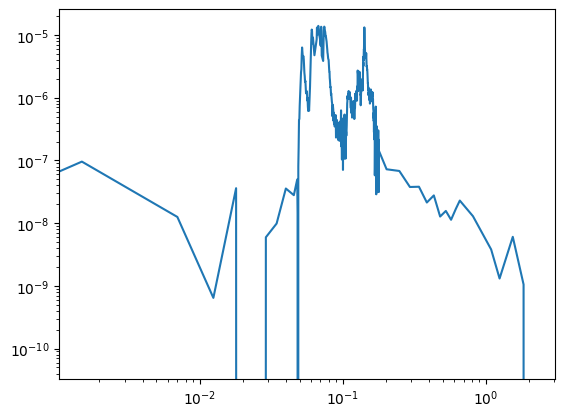

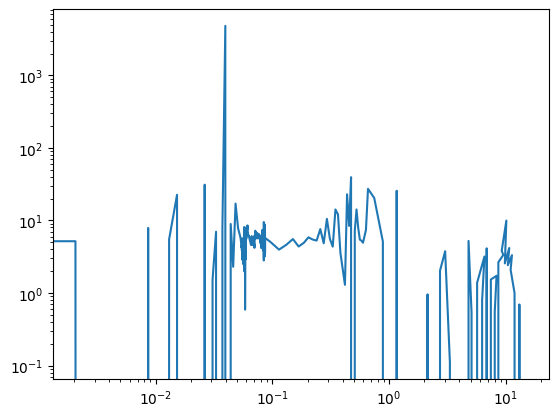

In [8]:
plt.figure()

!head picsit/grb221009a_afterglow_picsit_lc.txt

picsit_lc = pd.read_csv("picsit/grb221009a_afterglow_picsit_lc.txt", delim_whitespace=True, names=["mjd", "flux"])
picsit_hr = pd.read_csv("picsit/grb221009a_afterglow_picsit_hr.txt", delim_whitespace=True, names=["mjd", "hr"])
picsit_ag = pd.read_csv("picsit/grb221009a_picsit_prompt_afterglow_erg_230302.txt", delim_whitespace=True, names=["mjd", "flux", "flux_err"])


plt.plot(
    (picsit_ag.mjd - (T0_ijd + 51544))*24, 
    picsit_ag.flux, 
)

plt.loglog()

plt.figure()

plt.plot(
    (picsit_hr.mjd - (T0_ijd + 51544))*24, 
    picsit_hr.hr, 
)

plt.loglog()

In [9]:
import numpy as np
from rebin import rebin_in_bins


In [10]:
picsit_ag.sort_values('mjd', inplace=True)

# picsit_ag['flux_err'] = picsit_ag.flux*0 + 1e-8
picsit_ag['dt']  = np.concatenate([[0], np.array(picsit_ag['mjd'])[1:] - np.array(picsit_ag['mjd'])[:-1]])
picsit_ag['dt']

0      0.000000
1      0.000238
2      0.000229
3      0.000230
4      0.000231
         ...   
551    0.011530
552    0.006606
553    0.012333
554    0.012212
555    0.012244
Name: dt, Length: 556, dtype: float64

In [11]:
import subprocess
import io
import pathlib
from astropy.io import fits

def sshopen(fn):
    cfn = pathlib.Path("/tmp/sshopen-cache/") / fn.replace("/", "_")
    cfn.parent.mkdir(exist_ok=True)

    try:
        of = fits.open(cfn)
    except:
        f = io.BytesIO(subprocess.check_output(f"ssh login01.astro.unige.ch tar cf - {fn} | tar xf - -O", shell=True))

        with open(cfn, "wb") as F:
            F.write(f.read())
        
        of = fits.open(cfn)
    return of

sshopen("/isdc/arc/rev_3/scw/2558/255800290010.001/compton_events.fits.gz")


[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7fa91c7ed490>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fa91c795610>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fa91c77d730>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fa91c77d790>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fa91c79cc10>]

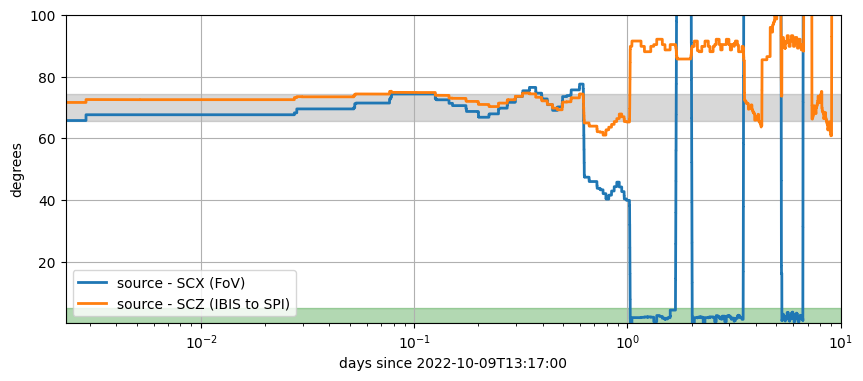

In [12]:
ijd2plot = lambda T: (T - T0_ijd)*24*3600
ijd2plot_d = lambda T: (T - T0_ijd)

att_hist = None

for orbit in ["2558", "2559", "2560", "2561"]:
    _ = sshopen(f"/isdc/arc/rev_3/aux/adp/{orbit}.001/attitude_historic.fits.gz")[1].data
    if att_hist is None:
        att_hist = _
    else:
        att_hist = np.concatenate([att_hist, _])



scx = SkyCoord(att_hist['RA_SCX'], att_hist['DEC_SCX'], unit="deg")
scz = SkyCoord(att_hist['RA_SCZ'], att_hist['DEC_SCZ'], unit="deg")

theta = scx.separation(src_coord).deg

plt.figure(figsize=(10, 4))


def plot_obs():
    plt.step(
    # plt.scatter(
        ijd2plot_d(att_hist['TIME']),
        # att_hist['RA_SCX'],
        # att_hist['DEC_SCX']
        theta,
        where="pre",
        label="source - SCX (FoV)",
        lw=2
    )

    plt.step(
        ijd2plot_d(att_hist['TIME']),
        -1 * scz.separation(src_coord).deg + 180,
        label="source - SCZ (IBIS to SPI)",
        where='pre',
        lw=2
    )

    # m_stable_ons_response = theta > 60
    m_stable_ons_response = ijd2plot_d(att_hist['POINTING_TIME']) - att_hist['DURATION']/24/3600 < 0.1
    m_stable_ons_response &= ijd2plot_d(att_hist['POINTING_TIME']) > -0.1



    plt.axhspan(0, 5, color='green', alpha=0.3, 
                # label='< 5 deg, FoV observations with ISGRI and JEM-X'
                )
    # plt.axhspan(5, 10, color='yellow', alpha=0.3)

    plt.axhspan(theta[m_stable_ons_response].min(), theta[m_stable_ons_response].max(), color='grey', alpha=0.3,
                # label="range of relative source angles with stable all-sky response"
                )
    

    return m_stable_ons_response

plot_obs()

plt.xlim([200/24/3600, 10])
plt.ylim([0.1, 100])

# plt.loglog()
plt.semilogx()

plt.legend(loc='lower left')

plt.xlabel(f"days since {T0_isot}")
plt.ylabel(f"degrees")

plt.grid()

plt.savefig("relpos_history.pdf")

In [13]:
att_hist

array([(b'25580000', b'P', b'P', 0, 8316.73990954, 8316.73990954, 8316.73990954, 1.157035e+04, 0., 315.00226, -34.99975  , 210.64058, -19.506361, b'            ',   0.     , 0.       , 111.2, 0, nan,        nan,        nan),
       (b'25580001', b'O', b'M', 0, 8316.87382157, 8316.87894889, 8316.87465491, 0.000000e+00, 0., 316.01096, -36.77675  , 210.02783, -20.223055, b'            ',   0.     , 0.       , 111. , 0, nan,        nan,        nan),
       (b'25580001', b'O', b'M', 1, 8316.87382157, 8316.87894889, 8316.87512944, 0.000000e+00, 0., 316.89224, -38.214638 , 209.46721, -20.823944, b'            ',   0.     , 0.       , 111. , 0, nan,        nan,        nan),
       ...,
       (b'25610077', b'P', b'G', 0, 8327.24341648, 8327.24526833, 8327.26026833, 2.100000e+02, 0., 152.00063,   2.997611 , 241.2125 , -14.717639, b'0244-00053-1', 151.5325 , 2.4294446,  53. , 0, 0.3,  6.205e-04, -0.0023855),
       (b'25610077', b'P', b'G', 0, 8327.24341648, 8327.24526833, 8327.26269889, 2.69990

In [14]:
"""
obs1 (1-1.7 days, 8 rings):
 Model Flux 0.0014555 photons (1.0229e-11 ergs/cm^2/s) range (3.0000 - 10.000 keV)
 Model Flux 3.7829e-05 photons (7.6619e-13 ergs/cm^2/s) range (10.000 - 20.000 keV)
 Model Flux 3.359e-06 photons (1.455e-13 ergs/cm^2/s) range (20.000 - 100.00 keV)

obs2 (2-3.5 days, 4 rings):
 Model Flux 0.00027077 photons (1.8924e-12 ergs/cm^2/s) range (3.0000 - 10.000 keV)
 Model Flux 6.3803e-06 photons (1.2892e-13 ergs/cm^2/s) range (10.000 - 20.000 keV)
 Model Flux 5.4611e-07 photons (2.3622e-14 ergs/cm^2/s) range (20.000 - 100.00 keV)

obs3 (5.3-6.6 days, 2 rings):
 Model Flux 4.473e-05 photons (3.0338e-13 ergs/cm^2/s) range (3.0000 - 10.000 keV)
 Model Flux 7.8889e-07 photons (1.5892e-14 ergs/cm^2/s) range (10.000 - 20.000 keV)
 Model Flux 6.4597e-08 photons (2.7899e-15 ergs/cm^2/s) range (20.000 - 100.00 keV)
"""

rings = {
    'r2558': {
        'flux_ecs_3_10': 1.0229e-11,
        't1_since_t0_d': 1,
        't2_since_t0_d': 1.7,
    }
}

In [15]:
import ogip.core
import ogip.tools

import importlib

importlib.reload(ogip.tools)


def get_conversion(instr):
    pha = ogip.core.open_something(f"grbbase_fitspack_{focus_obs_name}/{instr}_spectrum_GRB221009A_{focus_obs_name}.fits")
    rmf = ogip.core.open_something(f"grbbase_fitspack_{focus_obs_name}/{instr}_rmf_GRB221009A_{focus_obs_name}.fits")
    arf = ogip.core.open_something(f"grbbase_fitspack_{focus_obs_name}/{instr}_arf_GRB221009A_{focus_obs_name}.fits")


    model_generator = lambda p:(lambda x:(p[0]*(x/25.)))
    fit_result, fitted_model = ogip.tools.fit(model_generator, [7e-5], pha, rmf, None, 
                                            mask=~np.isnan(pha._rate))

    # TODO: check
    return ogip.tools.get_unfolding_factor(fitted_model, rmf, arf) * u.keV.to(u.erg)


get_conversion('IBIS').mean(), 1e-8/200

INFO:root:opened grbbase_fitspack_total_3p/IBIS_spectrum_GRB221009A_total_3p.fits as <ogip.spec.PHAI object at 0x7fa8b69def10>
INFO:root:opened grbbase_fitspack_total_3p/IBIS_rmf_GRB221009A_total_3p.fits as <ogip.spec.RMF object at 0x7fa8b695dc70>
INFO:root:opened grbbase_fitspack_total_3p/IBIS_arf_GRB221009A_total_3p.fits as <ogip.spec.ARF object at 0x7fa8b69a90a0>


(2.824827e-11, 5e-11)

In [16]:
m = np.array(picsit_ag.mjd)
m[1:][~((m[1:] - m[:-1]) > 0)]

array([], dtype=float64)

In [17]:
lc_by_instrument = {}

In [18]:
print("hklc:", list(hklc.keys()))

gedrate = hklc['/SPI_GEDRATE']
gedrate

hklc: ['/SPI_GEDRATE', '/SPI_GEDRATE0', '/SPI_GEDRATE1', '/SPI_GEDRATE10', '/SPI_GEDRATE11', '/SPI_GEDRATE12', '/SPI_GEDRATE13', '/SPI_GEDRATE14', '/SPI_GEDRATE15', '/SPI_GEDRATE16', '/SPI_GEDRATE17', '/SPI_GEDRATE18', '/SPI_GEDRATE2', '/SPI_GEDRATE3', '/SPI_GEDRATE4', '/SPI_GEDRATE5', '/SPI_GEDRATE6', '/SPI_GEDRATE7', '/SPI_GEDRATE8', '/SPI_GEDRATE9', '/SPI_GEDSAT', '/SPI_GEDSAT0', '/SPI_GEDSAT1', '/SPI_GEDSAT10', '/SPI_GEDSAT11', '/SPI_GEDSAT12', '/SPI_GEDSAT13', '/SPI_GEDSAT14', '/SPI_GEDSAT15', '/SPI_GEDSAT16', '/SPI_GEDSAT17', '/SPI_GEDSAT18', '/SPI_GEDSAT2', '/SPI_GEDSAT3', '/SPI_GEDSAT4', '/SPI_GEDSAT5', '/SPI_GEDSAT6', '/SPI_GEDSAT7', '/SPI_GEDSAT8', '/SPI_GEDSAT9', '/SPI_VETOGATE', '/SPI_VETONONSAT', '/SPI_VETOSAT']


,t,dt,c,ds
0,8317.507977,0.040009,19699,43820.040008
1,8317.507989,1.040009,20287,43821.040009
2,8317.508000,2.040009,19738,43822.040008
3,8317.508012,3.040011,19845,43823.040010
4,8317.508023,4.040011,20335,43824.040010
...,...,...,...,...
7995,8317.600512,7995.045364,19346,51815.045364
7996,8317.600523,7996.045364,20252,51816.045364
7997,8317.600535,7997.045366,19747,51817.045366
7998,8317.600547,7998.045366,19517,51818.045366


[]

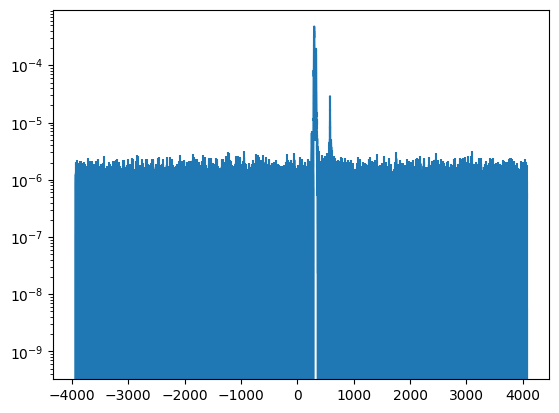

In [19]:
plt.figure()

m = gedrate.t < T0_ijd - 100./24/3600

resp = 4e8
gedrate['flux'] = (gedrate.c - np.mean(gedrate.c[m]))/resp
gedrate['flux_err'] = gedrate['flux']*0 + np.std(gedrate.c[m])/resp


plt.errorbar(
    ijd2plot(gedrate.t),
    gedrate.flux,
    gedrate.flux_err
)
plt.semilogy()

In [20]:
picsit_bti = pd.read_csv("picsit/grb221009a_bti_list.txt", delim_whitespace=True, names=["t1", "t2"])

for i, r in picsit_bti.iterrows():
    print(r.t1, r.t2)
    picsit_ag.flux[(picsit_ag.mjd > r.t1) & (picsit_ag.mjd < r.t2)] = np.NaN

59861.55557508222 59861.55559625096
59861.555623106426 59861.555623739376
59861.55602204203 59861.55626627378
59861.55643693712 59861.55656065312
59861.55714926659 59861.557170313834


/tmp/ipykernel_2499693/4189911600.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gedrate.flux[~m] = np.NaN
INFO:root:opened grbbase_fitspack_total_3p/JMX1_spectrum_GRB221009A_total_3p.fits as <ogip.spec.PHAI object at 0x7fa91c79cdf0>
INFO:root:opened grbbase_fitspack_total_3p/JMX1_rmf_GRB221009A_total_3p.fits as <ogip.spec.RMF object at 0x7fa8b5acb970>
INFO:root:opened grbbase_fitspack_total_3p/JMX1_arf_GRB221009A_total_3p.fits as <ogip.spec.ARF object at 0x7fa8b6911be0>
/home/savchenk/miniconda-recent/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/miniconda-recent/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret 

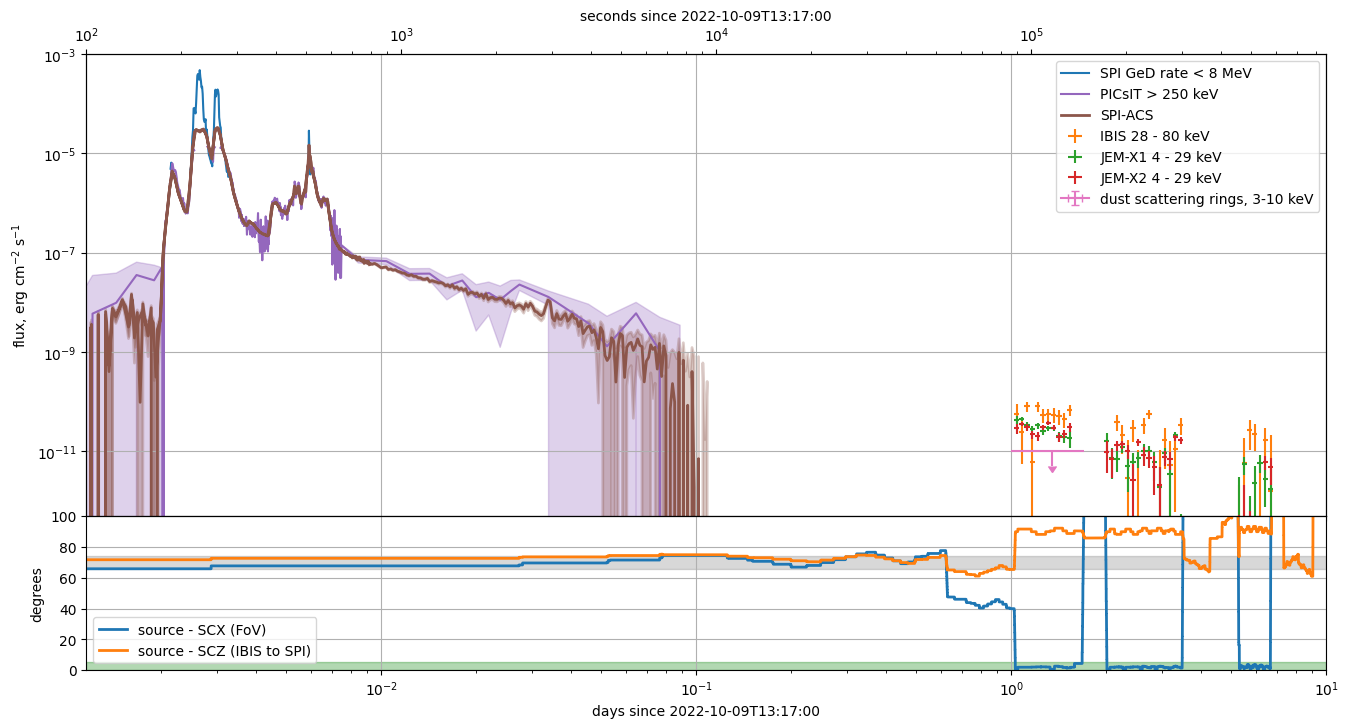

In [21]:
from astropy.io import fits

t_mjd_offset = 70./24/3600

T = np.logspace(-1, 1, 120)
Tc = (T[1:] + T[:-1])/2.
dT = (T[1:] - T[:-1])/2.

# plt.figure(figsize=(16, 6))
f, axes = plt.subplots(2, 1, figsize=(16, 8), height_ratios=[3, 1], sharex=True)
plt.sca(axes[0])

ijd2plot = lambda t:(t- T0_ijd)

plt.axhline(0, lw=2, c='k', alpha=0.5)


m = ((_:=ijd2plot(gedrate.t - t_mjd_offset)) < 0.01) & (_ > 0.002)
m &= gedrate.flux > 3e-6
gedrate.flux[~m] = np.NaN

plt.plot(
    ijd2plot(gedrate.t - t_mjd_offset),
    gedrate.flux,
    label='SPI GeD rate < 8 MeV'
)

for label, n in [('IBIS', 'IBIS'),
                 ('JEM-X1', 'JMX1'),
                 ('JEM-X2', 'JMX2')
                ]:

    f = fits.open(f"grbbase_fitspack_total_3p/{n}_lc_GRB221009A.fits")
    d = f[1].data
    conversion_factor = get_conversion('JMX1').mean()

    # plt.errorbar(ijd2plot(isgri_lc['TIME']), isgri_lc['RATE'], isgri_lc['ERROR'])

    d['RATE'][d['ERROR'] > np.nanmedian(d['ERROR'])*10] = np.NaN    

    r = rebin_in_bins(d['TIME'] - T0_ijd, d['RATE'], T)
    re = rebin_in_bins(d['TIME'] - T0_ijd, d['ERROR'], T, agg=lambda x:(np.sum(x**2))**0.5/len(x))

    m = re < np.nanmedian(re)*3

    # factor = 1e-8/200
    factor = conversion_factor

    plt.errorbar(
        Tc[m], 
        r[m]*factor,
        re[m]*factor,
        xerr=dT[m],
        label=f"{label} {int(f[1].header['E_MIN']):d} - {int(f[1].header['E_MAX']):d} keV",
        ls=""
    )

    lc_by_instrument[n] = {'t': Tc[m], 'r': r[m], 're': re[m], 'conversion_factor': conversion_factor}

m = (picsit_ag.mjd - (T0_ijd + 51544)) < 0.1

c = plt.plot(
# c = plt.errorbar(
    (picsit_ag.mjd - (T0_ijd + 51544))[m], 
    picsit_ag.flux[m],
    # picsit_ag.flux_err[m],
    # xerr=picsit_ag.dt[m]/2,
    # ls="",
    label='PICsIT > 250 keV'
)[0].get_color()

plt.fill_between(
    (picsit_ag.mjd - (T0_ijd + 51544))[m], 
    picsit_ag.flux[m] - picsit_ag.flux_err[m],
    picsit_ag.flux[m] + picsit_ag.flux_err[m],
    # xerr=picsit_lc.dt[m]/2,
    # ls="",
    # label='PICsIT > 250 keV'
    alpha=0.3,
    color=c
)


lc_by_instrument['picsit'] = {'t': (picsit_ag.mjd - (T0_ijd + 51544))[m], 'r': picsit_ag.flux[m], 're': picsit_ag.flux_err[m], 'conversion_factor': 1}

n = 1000

def rebin(x, n):
    N = int(len(x)/n)
    return np.array(x[:N*n]).reshape((N, n)).sum(1)


## ACS
# TODO: check values
bkg = 5336.468053846153
cts_to_fluence = 3e-10

tail_change = 0.01
tail_bins = np.logspace(-3, np.log10(0.11), 300)

acs_T = np.concatenate([np.linspace(0, tail_change, int(tail_change/3*24*3600)), tail_bins])
acs_Tc = (acs_T[1:] + acs_T[:-1])/2.
acs_dT = (acs_T[1:] - acs_T[:-1])/2.

from rebin import rebin_in_bins, rebin_bins_in_bins


acs_C = rebin_in_bins(acslc.t - T0_ijd, acslc.c - bkg - acslc.bkg_mean, acs_T, agg=lambda x:(np.sum(x))/len(x))
acs_Cmin = rebin_in_bins(acslc.t - T0_ijd, acslc.c - bkg - acslc.bkg_max, acs_T, agg=lambda x:(np.sum(x))/len(x))
acs_Cmax = rebin_in_bins(acslc.t - T0_ijd, acslc.c - bkg - acslc.bkg_min, acs_T, agg=lambda x:(np.sum(x))/len(x))

c = None

c = plt.plot(
    acs_Tc- t_mjd_offset,
    acs_C * cts_to_fluence,
    lw=2,
    label="SPI-ACS"
)[0].get_color()


c = plt.fill_between(
    acs_Tc - t_mjd_offset,
    acs_Cmin * cts_to_fluence,
    acs_Cmax * cts_to_fluence,
    lw=2,
    color=c,
    alpha=0.3
)

lc_by_instrument['acs'] = {'t': acs_Tc - t_mjd_offset, 'r': acs_C, 're': (acs_Cmax - acs_Cmin)/2, 'conversion_factor': cts_to_fluence}

# TODO: picsit erange

plt.errorbar(
    (rings['r2558']['t1_since_t0_d'] + rings['r2558']['t2_since_t0_d'])/2.,
    rings['r2558']['flux_ecs_3_10'],
    rings['r2558']['flux_ecs_3_10']/2.,
    xerr=(rings['r2558']['t2_since_t0_d'] - rings['r2558']['t1_since_t0_d'])/2., 
    uplims=[True],
    label="dust scattering rings, 3-10 keV"
)



plt.ylim([0.5e-12, 1e-3])
plt.ylabel("flux, erg cm$^{-2}$ s$^{-1}$")
plt.loglog()
plt.grid()
plt.legend()

plt.sca(axes[1])

m_stable_ons_response = plot_obs()

plt.ylabel("degrees")
plt.ylim([0, 100])
plt.xlim([100./24/3600, 10])

# plt.grid(which='both')
plt.grid()

plt.legend(loc="lower left")

plt.xlabel(f"days since {T0_isot}")

plt.subplots_adjust(hspace=0)
# plt.semilogx()

plt.sca(axes[0])
xl_d = plt.gca().get_xlim()

ax = plt.twiny()
ax.set_xlabel(f"seconds since {T0_isot}")
plt.xlim(np.array(xl_d)*24*3600)
plt.semilogx()


plt.savefig("lc.png")
plt.savefig("lc.pdf")

# TODO: plot early AG SPI-ACS
# TODO: plot model fitb
# TODO: plot rings contribution approx



9.999988000013202e-12 [9.999999999999994e-06]


[]

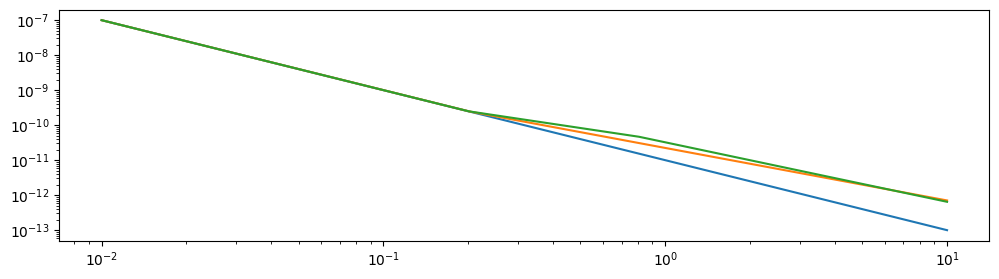

In [22]:
t_N = 1.

def conversion_for_instrument(i):
    return lc_by_instrument[i]['conversion_factor']

def s_t_model_gen(N, slope, t_break=np.NaN, slope_pb=np.NaN, t_break_er=np.NaN, slope_mid=np.NaN):

    def model(t, i):
        this_N = N
        this_slope = slope

        if not np.isnan(t_break) and t > t_break:
            this_slope = slope_pb
            this_N -= np.log10(t_break) * (slope_pb - slope)
            if not np.isnan(t_break_er):
                this_N += np.log10(t_break) * (slope_mid - slope)    
                this_N -= np.log10(t_break_er) * (slope_mid - slope)
            
        if not np.isnan(t_break_er) and t_break_er < t < t_break:
            this_slope = slope_mid
            this_N -= np.log10(t_break_er) * (slope_mid - slope)
            
        m = 10**this_N*(t/t_N)**this_slope/conversion_for_instrument(i)
        
        # if t > 1 and t < 1.7:
        #     m += rings_flux_ecs_3_10_r2558
    
        return m
    
    # TODO: this is too slow
    return np.frompyfunc(model, 2, 1)    

print(s_t_model_gen(-11, -1.2)(1.000001, 'picsit'), s_t_model_gen(-11, -1.2)(np.array([0.00001]), 'picsit'))

plt.figure(figsize=(12, 3))

t = np.logspace(-2, 1, 1000)

plt.plot(t, s_t_model_gen(-11, -2)(t, 'picsit'))
plt.plot(t, s_t_model_gen(-11, -2, 0.2, -1.5)(t, 'picsit'))
plt.plot(t, s_t_model_gen(-11, -2, 0.8, -1.7, 0.2, -1.2)(t, 'picsit'))
plt.loglog()

/tmp/ipykernel_2499693/1446606060.py:23: RuntimeWarning: invalid value encountered in double_scalars
  m = 10**this_N*(t/t_N)**this_slope/conversion_for_instrument(i)


this returns NaN: [-10.93335744  -1.66037607   0.83809215  -1.1432403    0.19280634
  -1.25286003] nan
this returns NaN: [-10.70299049  -1.83119343   0.83063781  -1.2133507    0.18891384
  -1.18912424] nan
this returns NaN: [-11.25614264  -1.73709842   0.72000741  -1.14638786   0.20074968
  -1.20267631] nan
this returns NaN: [-10.85386302  -1.75930914   0.82180498  -1.26357658   0.19686664
  -1.25144518] nan
this returns NaN: [-10.52250375  -1.7487761    0.84039816  -1.22040286   0.20350219
  -1.32682912] nan
this returns NaN: [-11.71050684  -1.9369271    0.75559882  -1.05482694   0.21678113
  -1.31574955] nan
this returns NaN: [-10.77812408  -1.73831201   0.85330414  -1.26158109   0.19640117
  -1.17607881] nan
this returns NaN: [-11.35265964  -1.88298147   0.84410596  -1.17581582   0.19794535
  -1.19398178] nan
this returns NaN: [-11.58224391  -1.65176627   0.80244638  -1.24759504   0.18613269
  -1.06906782] nan
this returns NaN: [-10.77990591  -1.76528023   0.76826533  -1.31752868   

  0%|          | 0/30 [00:00<?, ?it/s]

this returns NaN: [-10.90840383  -1.66200637   0.8385739   -1.1478379    0.19281921
  -1.24781438] nan
this returns NaN: [-10.77631441  -1.85164971   0.82729317  -1.20432523   0.18822587
  -1.20116986] nan
this returns NaN: [-11.87185514  -1.6279582    0.60980381  -1.10933441   0.21129357
  -1.26086308] nan
this returns NaN: [-10.63365756  -1.76443011   0.84695818  -1.18024889   0.20117079
  -1.27549006] nan
this returns NaN: [-11.95205201  -1.96672678   0.75741274  -1.02045336   0.21664188
  -1.34322108] nan
this returns NaN: [-10.6439884   -1.74191475   0.87090438  -1.29966796   0.19865753
  -1.16022649] nan
this returns NaN: [-11.34264798  -1.89306425   0.84592264  -1.17268569   0.19846047
  -1.199429  ] nan
this returns NaN: [-11.00409753  -1.83531281   0.67970313  -1.16149769   0.21583311
  -1.09617478] nan
this returns NaN: [-11.76066615  -1.82300182   0.82011672  -1.28838603   0.19709204
  -1.20131411] nan
this returns NaN: [-11.58535921  -1.8579887    0.81083702  -1.09419994   

/home/savchenk/miniconda-recent/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]


this returns NaN: [-11.34596656  -1.83550496   0.77423551  -1.12738992   0.21454419
  -1.20523804] nan
this returns NaN: [-10.84782202  -1.90844648   0.75370374  -1.37311311   0.19838191
  -1.20672125] nan
this returns NaN: [-10.83346598  -1.88681198   0.80333808  -1.27239997   0.20304109
  -1.12813011] nan
this returns NaN: [-10.89182808  -1.85162822   0.8735944   -1.07369108   0.19177026
  -1.14801866] nan
this returns NaN: [-11.37820062  -2.03146245   0.75175844  -1.15920239   0.20982337
  -1.24633744] nan
this returns NaN: [-11.77002241  -1.77327569   0.90958687  -1.0750946    0.2054004
  -1.21599756] nan
this returns NaN: [-10.68585505  -1.79524949   0.82450681  -1.22497359   0.19438194
  -1.26324602] nan
this returns NaN: [-10.9879048   -1.79313719   0.78071911  -1.24431083   0.1940806
  -1.20091857] nan
this returns NaN: [-11.11925883  -1.70547643   0.77391172  -1.21062833   0.21166301
  -1.12382218] nan
this returns NaN: [-10.69877607  -1.82366351   0.79733297  -1.12689887   0.

  3%|▎         | 1/30 [00:00<00:28,  1.00it/s]

this returns NaN: [-10.72333098  -1.76659391   0.85064507  -1.11870271   0.21762998
  -1.09039687] nan
this returns NaN: [-10.9779066   -1.80029126   0.73411759  -1.05168286   0.19685422
  -1.10806895] nan
this returns NaN: [-10.56290084  -1.78471952   0.75138349  -1.18624664   0.19145206
  -1.13319862] nan
this returns NaN: [-10.50931234  -1.77977898   0.82380846  -1.17665875   0.19287634
  -1.14318216] nan
this returns NaN: [-10.63995696  -1.89173448   0.76275853  -1.22453734   0.194077
  -1.19061798] nan
this returns NaN: [-10.54679546  -1.68980969   0.7466664   -1.12525975   0.20962437
  -1.18497799] nan
this returns NaN: [-10.71573648  -1.82152369   0.79463743  -1.16619978   0.20422822
  -1.17563835] nan
this returns NaN: [-10.92947645  -1.84823279   0.81980188  -1.18952782   0.18977768
  -1.20690298] nan
this returns NaN: [-11.20121225  -1.72324181   0.73215699  -1.17858947   0.19307093
  -1.19629373] nan
this returns NaN: [-10.77405008  -1.73275668   0.82893443  -1.1878869    0.

  7%|▋         | 2/30 [00:02<00:30,  1.08s/it]

this returns NaN: [-10.98948231  -1.72494363   0.77139323  -1.20938145   0.17952817
  -1.20065974] nan
this returns NaN: [-11.12429604  -1.56736398   0.84107367  -1.13052664   0.18766947
  -1.26028999] nan
this returns NaN: [-11.83844206  -1.95472592   0.75216377  -1.03659472   0.22055573
  -1.33047249] nan
this returns NaN: [-10.97843333  -1.87911042   0.84410489  -1.15893771   0.19503364
  -1.1898496 ] nan
this returns NaN: [-11.56493137  -1.73703837   0.80197965  -1.20716601   0.19226485
  -1.15592619] nan
this returns NaN: [-11.60078362  -1.69602464   0.7906605   -1.09831631   0.18635512
  -1.27563201] nan
this returns NaN: [-10.75664889  -1.80710709   0.80043047  -1.05392367   0.20138582
  -1.20415029] nan
this returns NaN: [-10.57458789  -1.82056797   0.78152733  -1.19162685   0.20898131
  -1.14926889] nan
this returns NaN: [-12.37534001  -1.51757819   0.83727358  -1.33317364   0.21218229
  -1.3646873 ] nan
this returns NaN: [-11.47412789  -1.82279219   0.80556946  -1.18966627   

 10%|█         | 3/30 [00:03<00:26,  1.00it/s]

this returns NaN: [-11.90174545  -1.57880088   0.83903969  -1.33411219   0.19825534
  -1.22005896] nan
this returns NaN: [-11.59634394  -1.64450436   0.70985189  -1.24110747   0.16881587
  -1.20372397] nan
this returns NaN: [-10.82551994  -1.64448778   0.82916389  -1.15507086   0.19073413
  -1.24533203] nan
this returns NaN: [-10.65934793  -1.73931025   0.80912275  -1.21702507   0.2041842
  -1.29065524] nan
this returns NaN: [-11.5265273   -1.87870425   0.76940123  -1.07595044   0.21520983
  -1.29779318] nan
this returns NaN: [-11.07171136  -1.69020921   0.90573308  -1.32189629   0.2050938
  -1.15075438] nan
this returns NaN: [-11.43620315  -1.9016429    0.85179686  -1.16878601   0.19961374
  -1.19687726] nan
this returns NaN: [-10.92668576  -1.81975852   0.84258909  -1.13498429   0.21079039
  -1.18354211] nan
this returns NaN: [-11.50140325  -1.81746359   0.78900921  -1.15974878   0.1993448
  -1.2449844 ] nan
this returns NaN: [-11.18198474  -1.75989402   0.78950317  -1.12136174   0.1

 13%|█▎        | 4/30 [00:04<00:26,  1.01s/it]

this returns NaN: [-10.88487818  -1.82849927   0.83407686  -1.12491215   0.19135553
  -1.14953152] nan
this returns NaN: [-11.2561521   -1.73432663   0.74265166  -1.18584735   0.18625334
  -1.19850538] nan
this returns NaN: [-10.77392385  -1.86976227   0.85225503  -1.27237722   0.20391039
  -1.30085988] nan
this returns NaN: [-10.90124902  -1.69141521   0.63585011  -1.17003996   0.20600065
  -1.32718361] nan
this returns NaN: [-10.93720172  -1.84028082   0.71098352  -1.07317893   0.20300844
  -1.10663439] nan
this returns NaN: [-10.86398287  -1.79672777   0.88331557  -1.13212702   0.1930475
  -1.2186509 ] nan
this returns NaN: [-12.47556313  -1.65139241   0.84439497  -1.42883101   0.20519644
  -1.2029459 ] nan
this returns NaN: [-10.61614978  -1.81475827   0.76100648  -1.17912919   0.20777789
  -1.1407338 ] nan
this returns NaN: [-10.57874478  -1.71280586   0.73857764  -1.15789942   0.21357037
  -1.18545411] nan
this returns NaN: [-10.98291348  -1.6581428    0.85385909  -1.1459737    0

 17%|█▋        | 5/30 [00:05<00:25,  1.00s/it]

this returns NaN: [-10.6435375   -1.8266121    0.73337064  -1.2934811    0.19898629
  -1.20616911] nan
this returns NaN: [-10.81820006  -1.77957155   0.87941371  -1.1338865    0.19396271
  -1.20915093] nan
this returns NaN: [-12.16059126  -1.70147827   0.83708537  -1.32104572   0.20423765
  -1.23727916] nan
this returns NaN: [-11.45018546  -1.61970531   0.72881775  -1.30903157   0.16942053
  -1.18137131] nan
this returns NaN: [-10.71703841  -1.73164846   0.75191539  -1.15981276   0.21047849
  -1.19715657] nan
this returns NaN: [-12.24212695  -1.65689037   0.67578873  -1.07447151   0.20754905
  -1.14014667] nan
this returns NaN: [-11.90943913  -1.94778614   0.74523244  -1.00278366   0.2196101
  -1.35931815] nan
this returns NaN: [-10.77254836  -1.73303585   0.86110258  -1.26761903   0.1951912
  -1.17312978] nan
this returns NaN: [-11.76117391  -1.8859723    0.83639039  -1.16753261   0.20287905
  -1.22434574] nan
this returns NaN: [-12.05814108  -1.59279239   0.80951847  -1.26084753   0.

 20%|██        | 6/30 [00:06<00:24,  1.00s/it]

this returns NaN: [-10.51100867  -1.67531058   0.76182742  -1.15526064   0.20937698
  -1.20226605] nan
this returns NaN: [-10.61026443  -1.82003791   0.83767435  -1.21720404   0.19767546
  -1.15463826] nan
this returns NaN: [-10.67506547  -1.68043255   0.84729568  -0.97701122   0.17819132
  -1.32529535] nan
this returns NaN: [-10.57569125  -1.81866957   0.81330778  -1.26745295   0.19032731
  -1.207443  ] nan
this returns NaN: [-11.31957617  -1.88070769   0.83730533  -1.17677404   0.19861406
  -1.19050876] nan
this returns NaN: [-10.80657385  -1.76370213   0.76556302  -1.30794527   0.20479778
  -1.23017197] nan
this returns NaN: [-10.93590647  -1.80692639   0.84859339  -1.11709769   0.21279431
  -1.18153369] nan
this returns NaN: [-10.77999152  -1.86951437   0.79606298  -1.04218194   0.20436189
  -1.24462283] nan
this returns NaN: [-12.3313678   -1.53156452   0.84623115  -1.34120393   0.20842612
  -1.38254458] nan
this returns NaN: [-11.20340118  -1.82521935   0.79192658  -1.12395236   

 23%|██▎       | 7/30 [00:06<00:22,  1.02it/s]

this returns NaN: [-11.13632384  -1.70203901   0.79289133  -1.24309395   0.18653523
  -1.18326512] nan
this returns NaN: [-10.62165714  -1.69699051   0.70337505  -1.22986943   0.19555841
  -1.21201296] nan
this returns NaN: [-10.75016743  -1.67559722   0.74533243  -1.16107103   0.20893863
  -1.20418557] nan
this returns NaN: [-10.67762217  -1.72965722   0.79887066  -1.19307731   0.19994147
  -1.23217981] nan
this returns NaN: [-10.57252348  -1.77161707   0.8376932   -1.21844844   0.1994592
  -1.28866587] nan
this returns NaN: [-10.57650346  -1.76001201   0.86605594  -1.26508787   0.19897583
  -1.20291016] nan
this returns NaN: [-11.32949984  -1.85923585   0.84161084  -1.19182404   0.19697327
  -1.21531598] nan
this returns NaN: [-10.92087032  -1.7504323    0.78957542  -1.28866379   0.20426091
  -1.21744294] nan
this returns NaN: [-10.9499935   -1.7746648    0.86089617  -1.14578608   0.22961411
  -1.17450551] nan
this returns NaN: [-10.63511887  -1.96570423   0.7154251   -1.14206227   0

 27%|██▋       | 8/30 [00:08<00:21,  1.00it/s]

this returns NaN: [-10.58697473  -1.78659882   0.92287268  -1.06730547   0.1866658
  -0.91878644] nan
this returns NaN: [-10.65530454  -1.78706633   0.76650079  -1.21335441   0.1897051
  -1.1903932 ] nan
this returns NaN: [-10.70843302  -1.71691757   0.70666592  -1.2219455    0.19816148
  -1.22595292] nan
this returns NaN: [-10.56501072  -1.73777419   0.77390938  -1.14660799   0.20406859
  -1.16944166] nan
this returns NaN: [-10.76831179  -1.6709109    0.82575712  -1.17307576   0.19401312
  -1.24569998] nan
this returns NaN: [-10.71808019  -1.83416268   0.83462482  -1.21122946   0.18871737
  -1.19318813] nan
this returns NaN: [-11.24094417  -1.74006936   0.70644414  -1.15523047   0.20373648
  -1.19429002] nan
this returns NaN: [-10.90138731  -1.75689892   0.82306109  -1.26597529   0.1978347
  -1.27136854] nan
this returns NaN: [-11.73366105  -1.98840476   0.74714182  -1.02002815   0.22231383
  -1.3602809 ] nan
this returns NaN: [-10.92243244  -1.8105634    0.8440042   -1.10769412   0.2

 30%|███       | 9/30 [00:09<00:21,  1.00s/it]

this returns NaN: [-10.5056735   -1.85689396   0.77383317  -1.21822961   0.20185765
  -1.19928378] nan
this returns NaN: [-11.07001585  -1.86627348   0.79034846  -1.188581     0.20166639
  -1.20815635] nan
this returns NaN: [-10.9236633   -1.86632721   0.81909635  -1.25721497   0.20232381
  -1.18286003] nan
this returns NaN: [-10.54584702  -1.78588444   0.86470223  -1.06719633   0.22601569
  -1.04408082] nan
this returns NaN: [-10.60298772  -1.77423114   0.74888669  -1.189227     0.19073146
  -1.12969066] nan
this returns NaN: [-10.80619086  -1.77328266   0.85721001  -1.18108521   0.19453202
  -1.21433727] nan
this returns NaN: [-11.07096499  -1.68888003   0.76047475  -1.25680279   0.17434884
  -1.18097952] nan
this returns NaN: [-10.54944243  -1.77999148   0.89086877  -1.20825515   0.20425711
  -1.09903118] nan
this returns NaN: [-11.28226395  -1.53407813   0.80611004  -1.12832799   0.17303074
  -1.24643398] nan
this returns NaN: [-11.0440684   -1.94267537   0.82323769  -1.19248796   

 33%|███▎      | 10/30 [00:10<00:20,  1.00s/it]

this returns NaN: [-10.72023157  -1.83734954   0.77436507  -1.23942605   0.19897597
  -1.20904777] nan
this returns NaN: [-10.90522431  -1.85082321   0.81168487  -1.15168828   0.1930816
  -1.20327295] nan
this returns NaN: [-10.71084875  -1.77658257   0.8040036   -1.21889384   0.18647863
  -1.16495054] nan
this returns NaN: [-10.54059372  -1.68628785   0.804083    -1.21971108   0.19954231
  -1.09865033] nan
this returns NaN: [-10.51671854  -1.84794656   0.70268381  -1.15223028   0.17070245
  -1.23123138] nan
this returns NaN: [-11.68122788  -1.89178949   0.81499264  -1.19497872   0.21044186
  -1.30561038] nan
this returns NaN: [-12.25570658  -2.00651429   0.81097103  -1.2849295    0.19237194
  -1.472296  ] nan
this returns NaN: [-10.61458433  -1.94586915   0.71208019  -1.2404746    0.24359245
  -1.15436922] nan
this returns NaN: [-11.18190365  -2.05205817   0.80522682  -1.13271767   0.18032829
  -1.14923967] nan
this returns NaN: [-11.23803978  -1.55978347   0.63432253  -1.04777098   0

 37%|███▋      | 11/30 [00:11<00:19,  1.01s/it]

this returns NaN: [-11.40871779  -2.01579374   0.93278021  -1.33558629   0.18985929
  -1.28516951] nan
this returns NaN: [-12.42016468  -1.89422216   0.73879552  -1.26922934   0.20521072
  -1.46026349] nan
this returns NaN: [-10.78341396  -1.78407659   0.89470638  -1.14244163   0.19226761
  -1.18782641] nan
this returns NaN: [-10.66002795  -1.8300159    0.75656088  -1.17699723   0.2088892
  -1.15217991] nan
this returns NaN: [-10.61962384  -1.65365902   0.73710153  -1.31935835   0.17086521
  -1.21419407] nan
this returns NaN: [-10.78132447  -1.80068298   0.81896321  -1.22038524   0.19155339
  -1.19995559] nan
this returns NaN: [-11.19308068  -1.75349208   0.81715624  -1.19797549   0.1976699
  -1.19077111] nan
this returns NaN: [-12.16318417  -2.03213508   0.84639492  -1.12782719   0.19449026
  -1.15815205] nan
this returns NaN: [-12.10117642  -1.68286603   0.80651406  -1.26706636   0.18777296
  -1.00558597] nan
this returns NaN: [-10.78032728  -1.70693787   0.72810924  -1.50556654   0.

 40%|████      | 12/30 [00:12<00:19,  1.06s/it]

this returns NaN: [-10.6915211   -1.90804021   0.78284974  -1.17979851   0.1909669
  -1.17814506] nan
this returns NaN: [-10.93020481  -1.73650957   0.69006369  -1.18025739   0.20568507
  -1.28588393] nan
this returns NaN: [-10.76606856  -1.78026438   0.86020013  -1.15484329   0.1924142
  -1.1979171 ] nan
this returns NaN: [-11.75472509  -1.78682426   0.81778561  -1.27653043   0.20041154
  -1.22163229] nan
this returns NaN: [-11.17178522  -1.65082422   0.74192516  -1.26742159   0.17073866
  -1.1787644 ] nan
this returns NaN: [-11.01457732  -1.72738721   0.76617869  -1.1993782    0.20368748
  -1.21612471] nan
this returns NaN: [-10.64444163  -1.67199161   0.72278242  -1.11071327   0.21353847
  -1.19545749] nan
this returns NaN: [-10.89020671  -1.68679386   0.82516634  -1.14775978   0.19534988
  -1.23676141] nan
this returns NaN: [-10.88182884  -1.68826968   0.67900228  -1.04567344   0.20992159
  -1.20243636] nan
this returns NaN: [-11.37979622  -1.88152258   0.84344612  -1.16959395   0.

 43%|████▎     | 13/30 [00:13<00:17,  1.05s/it]

this returns NaN: [-10.61414275  -1.80842686   0.77850869  -1.21482422   0.18159344
  -1.1872098 ] nan
this returns NaN: [-11.20822717  -1.87447917   0.81057639  -1.16751916   0.20740416
  -1.17720812] nan
this returns NaN: [-10.81689956  -1.83476767   0.825906    -1.14693691   0.194258
  -1.23350231] nan
this returns NaN: [-10.79579328  -1.76504119   0.81008199  -1.18894065   0.18910347
  -1.17232741] nan
this returns NaN: [-11.09728494  -1.88252244   0.83706556  -1.24504913   0.20231556
  -1.2784469 ] nan
this returns NaN: [-11.45485524  -1.86601192   0.87562024  -1.27317289   0.21216243
  -1.24954892] nan
this returns NaN: [-10.82835213  -1.73992272   0.66498489  -1.18392883   0.20568166
  -1.30171478] nan
this returns NaN: [-10.79737618  -1.75132988   0.84928782  -1.09786206   0.20779136
  -1.19739823] nan
this returns NaN: [-10.55482158  -1.80469244   0.79382135  -1.14134665   0.20168
  -1.15927945] nan
this returns NaN: [-10.77409999  -1.77878464   0.86749965  -1.14432651   0.197

 47%|████▋     | 14/30 [00:14<00:15,  1.02it/s]

this returns NaN: [-10.85584127  -1.8608144    0.84500404  -1.28108593   0.20171353
  -1.27903112] nan
this returns NaN: [-10.87457215  -1.95667746   0.74851088  -1.16938577   0.18574164
  -1.17814383] nan
this returns NaN: [-10.83398752  -1.7495219    0.8587053   -1.08289448   0.20912748
  -1.2058054 ] nan
this returns NaN: [-10.92930153  -1.71532017   0.88142331  -1.09224506   0.19357711
  -0.94285011] nan
this returns NaN: [-10.81548931  -1.78790118   0.86713845  -1.157568     0.19448085
  -1.20376684] nan
this returns NaN: [-12.04912395  -1.7088636    0.81851626  -1.30482793   0.20043378
  -1.23173936] nan
this returns NaN: [-11.02050411  -1.67765681   0.77212628  -1.28452523   0.16780964
  -1.17529656] nan
this returns NaN: [-10.83734955  -1.68617629   0.82971916  -1.15568381   0.19257825
  -1.24624403] nan
this returns NaN: [-10.76160493  -1.7697236    0.82422838  -1.25276024   0.19530618
  -1.24796298] nan
this returns NaN: [-10.75816099  -1.78687312   0.8414507   -1.20774589   

 50%|█████     | 15/30 [00:14<00:14,  1.07it/s]

this returns NaN: [-10.76255636  -1.79600264   0.81788555  -1.11267298   0.20047082
  -1.18826314] nan
this returns NaN: [-11.02363102  -1.7566537    0.82059847  -1.20838548   0.19383807
  -1.24246142] nan
this returns NaN: [-10.7834112   -1.97824491   0.72992403  -1.20248717   0.20112013
  -1.1835854 ] nan
this returns NaN: [-10.93227498  -1.85305028   0.77052493  -1.2003255    0.21469474
  -1.19929615] nan
this returns NaN: [-10.80610866  -1.86809277   0.82679291  -1.1536854    0.19172292
  -1.20397   ] nan
this returns NaN: [-10.77209848  -1.761437     0.78565237  -1.21275231   0.18783314
  -1.17105912] nan
this returns NaN: [-10.73319581  -1.81919367   0.77611883  -1.20869472   0.18268462
  -1.21332733] nan
this returns NaN: [-11.11760803  -1.82484249   0.85103022  -1.24926701   0.20394734
  -1.25516956] nan
this returns NaN: [-10.78053851  -1.74745508   0.68787673  -1.18880692   0.20395529
  -1.28881818] nan
this returns NaN: [-10.97973271  -1.72245319   0.82149041  -1.13570203   

 53%|█████▎    | 16/30 [00:15<00:12,  1.10it/s]

this returns NaN: [-10.72963253  -1.74946019   0.775868    -1.20714122   0.1814103
  -1.13794371] nan
this returns NaN: [-11.01336672  -1.8461321    0.83477399  -1.23399871   0.20092736
  -1.23792672] nan
this returns NaN: [-11.84357391  -1.89156126   0.76401819  -1.2229227    0.1998079
  -1.4040097 ] nan
this returns NaN: [-11.18982003  -1.95651755   0.69373052  -1.03249736   0.2016478
  -1.20529115] nan
this returns NaN: [-10.59925992  -1.77623472   0.75600787  -1.19016496   0.19832201
  -1.14692947] nan
this returns NaN: [-10.65904029  -1.75810148   0.86080132  -1.15277915   0.19334884
  -1.06680343] nan
this returns NaN: [-10.76808824  -1.77456033   0.87554706  -1.14814724   0.19144493
  -1.20040656] nan
this returns NaN: [-12.35634871  -1.70280409   0.90960914  -1.35945475   0.19677678
  -1.17996381] nan
this returns NaN: [-10.54383218  -1.76301219   0.78451907  -1.18172209   0.20387544
  -1.20319496] nan
this returns NaN: [-11.29694561  -1.72073095   0.70744954  -1.14985756   0.2

 57%|█████▋    | 17/30 [00:16<00:11,  1.12it/s]

this returns NaN: [-10.55065216  -1.83541978   0.73414939  -1.16217691   0.21203989
  -1.14730112] nan
this returns NaN: [-11.05628234  -1.73202265   0.76335926  -1.26342846   0.17873967
  -1.18841019] nan
this returns NaN: [-10.92036336  -1.66689983   0.8393655   -1.15314622   0.19310725
  -1.24643292] nan
this returns NaN: [-10.56351826  -1.83892682   0.82395681  -1.26037831   0.17565713
  -1.1914004 ] nan
this returns NaN: [-11.1430315   -1.75441423   0.76065373  -1.13202848   0.19946932
  -1.19285137] nan
this returns NaN: [-11.55333026  -1.91835662   0.83731834  -1.20835672   0.19861367
  -1.20438627] nan
this returns NaN: [-11.79499147  -1.63710198   0.81718222  -1.25390338   0.18322015
  -1.0364195 ] nan
this returns NaN: [-11.62848902  -1.65152784   0.80335643  -1.27318099   0.20477056
  -1.27580598] nan
this returns NaN: [-11.59371927  -1.76257692   0.77316691  -1.09085428   0.20146573
  -1.23988342] nan
this returns NaN: [-12.10814886  -1.60212709   0.85845724  -1.12020363   

 60%|██████    | 18/30 [00:17<00:10,  1.14it/s]

this returns NaN: [-10.68101442  -1.76924572   0.76208915  -1.1852107    0.19275617
  -1.14071296] nan
this returns NaN: [-10.78011535  -1.73723692   0.84200647  -1.13165874   0.18853658
  -1.08753717] nan
this returns NaN: [-10.87269396  -1.72631389   0.72463361  -1.18120414   0.21015404
  -1.18798416] nan
this returns NaN: [-10.68920606  -1.59195608   0.85269897  -1.13569632   0.19030025
  -1.2529563 ] nan
this returns NaN: [-10.80474234  -1.70540606   0.86133435  -1.2786681    0.19905377
  -1.17145709] nan
this returns NaN: [-11.31058768  -1.81939075   0.79001114  -1.16298811   0.19916776
  -1.19777174] nan
this returns NaN: [-10.69617178  -1.77205468   0.79051749  -1.2919567    0.20411068
  -1.2105889 ] nan
this returns NaN: [-10.58855594  -1.67525745   0.78326636  -1.20062406   0.19427619
  -1.21149967] nan
this returns NaN: [-11.20812669  -1.77008134   0.8001747   -1.15203903   0.19140752
  -1.25360258] nan
this returns NaN: [-10.80804715  -1.82683347   0.81823948  -1.09292635   

 63%|██████▎   | 19/30 [00:18<00:09,  1.13it/s]

this returns NaN: [-11.0789836   -1.78574      0.90084634  -1.08452273   0.21947976
  -1.04522059] nan
this returns NaN: [-10.58878637  -1.80411674   0.71731351  -1.10573191   0.19939986
  -1.13591784] nan
this returns NaN: [-11.0978955   -1.71357976   0.76465607  -1.24740227   0.17858453
  -1.1848883 ] nan
this returns NaN: [-10.68152219  -1.82874802   0.82794392  -1.21359418   0.18936385
  -1.18996375] nan
this returns NaN: [-11.22320501  -1.74149119   0.73831944  -1.17327223   0.19748319
  -1.21051707] nan
this returns NaN: [-11.0732646   -1.76117501   0.83603273  -1.17765882   0.19773499
  -1.25329123] nan
this returns NaN: [-11.64372666  -1.65095048   0.7990689   -1.25748277   0.18550035
  -1.05165329] nan
this returns NaN: [-10.6400246   -1.80817653   0.74580976  -1.41674805   0.2083883
  -1.27075758] nan
this returns NaN: [-10.77796633  -1.89974601   0.84966391  -1.02191267   0.21029024
  -1.20228016] nan
this returns NaN: [-11.3229002   -1.75101742   0.8100522   -1.14538715   0

 67%|██████▋   | 20/30 [00:19<00:09,  1.10it/s]

this returns NaN: [-11.44839937  -1.84662551   0.78953088  -1.22283355   0.20109242
  -1.34981783] nan
this returns NaN: [-10.5982363   -1.80788875   0.76528952  -1.19581004   0.19632047
  -1.16629632] nan
this returns NaN: [-10.58240983  -1.87504838   0.78784688  -1.16856363   0.21142143
  -1.08440037] nan
this returns NaN: [-10.5595703   -1.66221088   0.69123872  -1.2272299    0.21201888
  -1.24470353] nan
this returns NaN: [-10.67762199  -1.72909991   0.81578909  -1.17638599   0.19219878
  -1.23523705] nan
this returns NaN: [-11.26134914  -1.71916417   0.70559177  -1.1505423    0.20091767
  -1.19390664] nan
this returns NaN: [-10.65447059  -1.98630469   0.8236231   -1.21412958   0.1966498
  -1.25625998] nan
this returns NaN: [-11.06956026  -1.66964623   0.69781573  -1.38038653   0.21476017
  -1.24139563] nan
this returns NaN: [-10.95905887  -1.81660047   0.84530499  -1.13607977   0.21259441
  -1.18082823] nan
this returns NaN: [-11.55290873  -1.83209676   0.80168557  -1.16299683   0

 70%|███████   | 21/30 [00:20<00:08,  1.07it/s]

this returns NaN: [-11.06848226  -1.78043713   0.84150958  -1.33512186   0.20880677
  -1.22460676] nan
this returns NaN: [-11.85642341  -1.88357466   0.79557379  -1.23128973   0.1972104
  -1.43219402] nan
this returns NaN: [-10.54644917  -1.7881553    0.76051666  -1.21201499   0.21683805
  -1.17008087] nan
this returns NaN: [-10.88189697  -1.73691372   0.84307753  -1.11304633   0.20787116
  -1.21270868] nan
this returns NaN: [-10.63141001  -1.81042569   0.80105792  -1.16568174   0.20004868
  -1.148829  ] nan
this returns NaN: [-10.79265669  -1.74340396   0.86525421  -1.13678161   0.19276037
  -1.04526234] nan
this returns NaN: [-11.56664367  -1.7195824    0.78848841  -1.26921785   0.20091547
  -1.23895258] nan
this returns NaN: [-10.65965137  -1.83217433   0.75234816  -1.1706797    0.21005448
  -1.14726187] nan
this returns NaN: [-10.99284918  -1.67997839   0.75511793  -1.30064554   0.17092764
  -1.16303765] nan
this returns NaN: [-10.82942239  -1.59513807   0.84937219  -1.13469981   0

 73%|███████▎  | 22/30 [00:21<00:07,  1.04it/s]

this returns NaN: [-10.68707633  -1.89842974   0.77104327  -1.17471691   0.19171652
  -1.19038026] nan
this returns NaN: [-10.56902809  -1.78273493   0.78432721  -1.17860583   0.18873274
  -1.08986964] nan
this returns NaN: [-12.46379675  -1.59779295   0.84086959  -1.30321392   0.19663134
  -1.28771571] nan
this returns NaN: [-10.66195724  -1.65450088   0.72309383  -1.12594597   0.21413343
  -1.18885811] nan
this returns NaN: [-10.79638836  -1.83007922   0.83031218  -1.21934276   0.18958345
  -1.19020572] nan
this returns NaN: [-11.13520939  -1.65474514   0.69389873  -1.12088363   0.20018256
  -1.19581741] nan
this returns NaN: [-11.3853107   -1.88813201   0.84427067  -1.17919618   0.19686964
  -1.19467448] nan
this returns NaN: [-10.55046036  -1.78529992   0.83942701  -1.04314294   0.21093476
  -1.24378598] nan
this returns NaN: [-11.06557036  -1.92554094   0.6503063   -1.16754487   0.21280955
  -0.98622053] nan
this returns NaN: [-11.64057562  -1.61286261   0.81979937  -1.28461291   

 77%|███████▋  | 23/30 [00:22<00:06,  1.05it/s]

this returns NaN: [-10.98470242  -1.89743294   0.78265509  -1.30320471   0.20850499
  -1.07709241] nan
this returns NaN: [-11.13784848  -1.90859424   0.77580884  -1.19782762   0.2059218
  -1.18559779] nan
this returns NaN: [-10.50631675  -1.8643155    0.83492583  -1.17089645   0.2052671
  -1.23811413] nan
this returns NaN: [-11.43160734  -2.03292723   0.78483476  -1.1944412    0.2060715
  -1.23076862] nan
this returns NaN: [-11.08633134  -1.73660666   0.79432785  -1.27119079   0.18147188
  -1.22184381] nan
this returns NaN: [-11.2225304   -1.78094198   0.83601446  -1.21695743   0.19436968
  -1.26429617] nan
this returns NaN: [-11.77121868  -2.09242159   0.78884043  -1.2408372    0.17179476
  -1.15677805] nan
this returns NaN: [-10.68305967  -1.79008219   0.81575998  -1.2315269    0.19712514
  -1.18180863] nan
this returns NaN: [-10.67504002  -1.84971989   0.83066151  -1.19823455   0.17174689
  -1.1661231 ] nan
this returns NaN: [-11.73988839  -2.02940049   0.79660468  -1.1426669    0.2

 80%|████████  | 24/30 [00:23<00:05,  1.08it/s]

this returns NaN: [-10.50420085  -1.8037408    0.85210386  -1.09950996   0.19971852
  -1.19436697] nan
this returns NaN: [-10.89996103  -1.77645011   0.84328338  -1.09532247   0.21979009
  -1.09905492] nan
this returns NaN: [-10.70525902  -1.79050585   0.87807165  -1.13562334   0.19274262
  -0.92981278] nan
this returns NaN: [-10.71554202  -1.74565434   0.88484086  -1.13627564   0.19278027
  -1.19025303] nan
this returns NaN: [-11.94188661  -1.71086679   0.82356125  -1.30462236   0.19925478
  -1.20987537] nan
this returns NaN: [-10.52566427  -1.63522663   0.70600909  -1.07414887   0.22468729
  -1.19535587] nan
this returns NaN: [-10.97745516  -1.68733187   0.83040135  -1.1803422    0.19058103
  -1.24967045] nan
this returns NaN: [-11.08779197  -1.74744532   0.82798797  -1.27538377   0.20163174
  -1.34951399] nan
this returns NaN: [-11.57623936  -1.90825853   0.7713907   -1.05922689   0.2156022
  -1.29891383] nan
this returns NaN: [-10.71172713  -1.59371028   0.85089116  -1.23801046   0

 83%|████████▎ | 25/30 [00:24<00:04,  1.10it/s]

this returns NaN: [-10.6251209   -1.77065177   0.75865656  -1.17896459   0.19225839
  -1.13552323] nan
this returns NaN: [-10.50104116  -1.92328109   0.68649934  -1.33159821   0.19702385
  -1.17865915] nan
this returns NaN: [-11.09765254  -1.69509216   0.77450043  -1.25038993   0.17965667
  -1.1819604 ] nan
this returns NaN: [-10.60698916  -1.77927493   0.84381524  -1.23377061   0.19948771
  -1.18836045] nan
this returns NaN: [-10.87796966  -1.68619131   0.84080239  -1.14926955   0.19214637
  -1.23798855] nan
this returns NaN: [-11.24585516  -1.71412913   0.71318508  -1.14272019   0.20035377
  -1.20116713] nan
this returns NaN: [-10.53463987  -1.68016051   0.80753265  -1.31974229   0.19617628
  -1.28822098] nan
this returns NaN: [-11.81518887  -1.65354774   0.79591978  -1.27321823   0.17942957
  -1.02292712] nan
this returns NaN: [-10.85050293  -1.82141326   0.77003689  -1.31194479   0.20274958
  -1.22917515] nan
this returns NaN: [-11.34058284  -1.72357344   0.78096385  -1.10591181   

 87%|████████▋ | 26/30 [00:24<00:03,  1.15it/s]

this returns NaN: [-11.05858835  -1.65473248   0.87793609  -1.15014777   0.185546
  -1.27782647] nan
this returns NaN: [-10.7778025   -1.7381226    0.85293949  -1.26590546   0.19652876
  -1.18064444] nan
this returns NaN: [-11.8179065   -1.97858998   0.90571117  -1.06070271   0.19218408
  -1.16325969] nan
this returns NaN: [-11.79786163  -1.60377901   0.7995819   -1.28521419   0.18187351
  -1.02740047] nan
this returns NaN: [-11.61264492  -1.81272594   0.8346721   -1.24173251   0.1969098
  -1.19439252] nan
this returns NaN: [-11.67207616  -1.90852906   0.71979676  -1.11315306   0.20704519
  -1.44600408] nan
this returns NaN: [-11.30700167  -1.63285865   0.8238402   -1.38580111   0.21427172
  -1.14624621] nan
this returns NaN: [-10.76121234  -1.7365822    0.80242353  -1.22364036   0.20214555
  -1.19720457] nan
this returns NaN: [-11.28492301  -1.77425736   0.8024223   -1.23783382   0.20293392
  -1.35219712] nan
this returns NaN: [-11.41858834  -1.77731345   0.86995424  -1.25373022   0.1

 90%|█████████ | 27/30 [00:25<00:02,  1.19it/s]

this returns NaN: [-10.72810451  -1.54349961   0.60968517  -1.09295762   0.20522211
  -1.12526783] nan
this returns NaN: [-10.89125571  -1.67166521   0.83985353  -1.14923158   0.19352746
  -1.24371234] nan
this returns NaN: [-11.27511179  -1.65295306   0.69984886  -1.1070621    0.20816297
  -1.21007652] nan
this returns NaN: [-12.03934726  -1.98143774   0.7537917   -1.02047911   0.21848929
  -1.34726376] nan
this returns NaN: [-11.41331209  -1.93221957   0.86142918  -1.15834567   0.19691528
  -1.18205757] nan
this returns NaN: [-11.75161401  -1.61755354   0.79356592  -1.25579608   0.18595794
  -1.06004397] nan
this returns NaN: [-11.32778485  -1.74532589   0.771473    -1.0403758    0.18085535
  -1.26282624] nan
this returns NaN: [-11.33910271  -1.83191677   0.78146135  -1.23938555   0.20280614
  -1.17071738] nan
this returns NaN: [-11.19149917  -1.82424862   0.78919838  -1.13111791   0.20087122
  -1.2426609 ] nan
this returns NaN: [-10.92983106  -1.66403017   0.82236914  -1.15433487   

 93%|█████████▎| 28/30 [00:26<00:01,  1.24it/s]

this returns NaN: [-11.20811975  -1.93886901   0.79680586  -1.19109634   0.20231296
  -1.22180663] nan
this returns NaN: [-11.10666805  -1.84049782   0.8381276   -1.19112608   0.19118358
  -1.17567268] nan
this returns NaN: [-11.53797943  -1.74498119   0.92702056  -1.10890511   0.21002894
  -1.28873487] nan
this returns NaN: [-11.34079249  -1.82801965   0.81903091  -1.15416359   0.18967952
  -1.15214578] nan
this returns NaN: [-10.76627437  -1.73211288   0.81496989  -1.25695574   0.18513295
  -1.2556683 ] nan
this returns NaN: [-11.80583274  -1.68941728   0.82700767  -1.12696078   0.19754626
  -1.03580553] nan
this returns NaN: [-10.98800667  -1.83524492   0.81279552  -1.12417145   0.19360783
  -1.22956108] nan
this returns NaN: [-11.46140097  -2.13924858   0.69760684  -1.30587354   0.17811316
  -1.12951352] nan
this returns NaN: [-11.30251534  -2.04129425   0.84096744  -1.21127069   0.1956693
  -1.23128664] nan
this returns NaN: [-10.51215139  -1.71840432   0.74380967  -1.16161011   0

 97%|█████████▋| 29/30 [00:27<00:00,  1.27it/s]

this returns NaN: [-11.69080021  -2.04851075   0.80194576  -1.2520003    0.20632772
  -1.21861923] nan
this returns NaN: [-10.73153073  -1.84081074   0.79520653  -1.25061549   0.18218038
  -1.03346153] nan
this returns NaN: [-10.84276955  -1.76241607   0.8920005   -1.03355274   0.19942915
  -1.16032277] nan
this returns NaN: [-10.97948471  -1.91666238   0.78208819  -1.20023113   0.20333622
  -1.21301086] nan
this returns NaN: [-11.05359789  -1.82786064   0.79561752  -1.28735687   0.19002468
  -1.23438301] nan
this returns NaN: [-11.60375152  -1.74848588   0.82433185  -1.12379432   0.19825268
  -1.11423357] nan
this returns NaN: [-11.14277083  -1.68917629   0.76717151  -1.21001841   0.2117781
  -1.13017207] nan
this returns NaN: [-11.12364054  -1.82733735   0.83860639  -1.21130465   0.19322983
  -1.27914172] nan
this returns NaN: [-11.38646056  -2.21665363   0.76911648  -1.25413874   0.20205648
  -1.24197431] nan
this returns NaN: [-12.2051138   -2.03614576   0.81203796  -1.08709433   0

100%|██████████| 30/30 [00:27<00:00,  1.08it/s]

this returns NaN: [-10.7181961   -1.74738403   0.81562295  -1.23216392   0.18951407
  -1.16122772] nan
this returns NaN: [-10.87398938  -1.7691763    0.86553262  -1.02562282] nan
this returns NaN: [-10.54913179  -1.71358986   0.80038595  -1.17804973] nan
this returns NaN: [-11.20549546  -1.70046841   0.74374141  -1.0660427 ] nan
this returns NaN: [-11.31020058  -1.75832754   0.79732947  -1.21087542] nan
this returns NaN: [-11.9133372   -1.64626547   0.81070282  -1.18323285] nan
this returns NaN: [-11.41388708  -1.80963842   0.8386738   -1.22226959] nan
this returns NaN: [-10.84188837  -1.68692963   0.79663375  -1.28438282] nan
this returns NaN: [-11.18733489  -1.8557165    0.81927096  -1.24376975] nan
this returns NaN: [-11.17475985  -1.85405963   0.7912916   -1.24103741] nan
this returns NaN: [-11.61250059  -1.86078769   0.80551839  -1.10609921] nan
this returns NaN: [-11.05563425  -1.80374688   0.81020137  -1.34932349] nan
this returns NaN: [-10.55933858  -1.77768151   0.77913656  -1

this returns NaN: [-11.00667148  -1.68255744   0.89626498  -1.22280878] nan
this returns NaN: [-10.90227239  -1.86692807   0.79730796  -1.12373823] nan
this returns NaN: [-10.66437118  -1.75630865   0.7310273   -1.24693794] nan
this returns NaN: [-10.55498379  -1.65200999   0.79993114  -1.09930098] nan
this returns NaN: [-11.75580183  -1.61504887   0.79743388  -1.13118646] nan
this returns NaN: [-10.96455668  -1.83486526   0.77964803  -1.21123457] nan
this returns NaN: [-10.64800626  -1.75572081   0.8297929   -1.22084328] nan
this returns NaN: [-10.77940393  -1.86268118   0.83083563  -1.26379099] nan
this returns NaN: [-11.04353314  -1.5826994    0.8040681   -1.12218184] nan
this returns NaN: [-11.14303131  -1.77708696   0.79457551  -1.1586241 ] nan
this returns NaN: [-11.69675239  -1.88493332   0.8396716   -1.20063132] nan
this returns NaN: [-10.86535912  -1.75405248   0.77901897  -1.16465207] nan
this returns NaN: [-11.29405912  -1.85562806   0.81810908  -1.24696176] nan
this returns

  0%|          | 0/30 [00:00<?, ?it/s]

this returns NaN: [-11.23216711  -1.6930044    0.74124828  -1.06247916] nan
this returns NaN: [-11.18600283  -1.85554099   0.81630714  -1.24348032] nan
this returns NaN: [-10.54532175  -1.79179697   0.7784174   -1.16562494] nan
this returns NaN: [-11.77461444  -1.92933668   0.75881151  -1.13844862] nan
this returns NaN: [-10.6880428   -1.93777325   0.81974194  -1.18367863] nan
this returns NaN: [-10.92603027  -1.80045047   0.83698836  -1.23884587] nan
this returns NaN: [-10.68084504  -1.80703095   0.84176144  -1.25586192] nan
this returns NaN: [-10.97546358  -1.67193995   0.90250654  -1.22098657] nan
this returns NaN: [-10.96251359  -2.04650078   0.79798058  -0.9634736 ] nan
this returns NaN: [-10.62852365  -1.52492309   0.79092379  -1.06468334] nan
this returns NaN: [-11.77466813  -1.61106632   0.79717342  -1.12985873] nan
this returns NaN: [-10.91410154  -1.85060624   0.77929754  -1.20992865] nan
this returns NaN: [-10.99925347  -1.67806255   0.91549887  -1.16750962] nan
this returns

  3%|▎         | 1/30 [00:00<00:27,  1.05it/s]

this returns NaN: [-11.00248533  -1.79896407   0.85190775  -1.26644538] nan
this returns NaN: [-10.97290519  -1.82279527   0.80860754  -1.16004948] nan
this returns NaN: [-11.83738571  -1.87336857   0.85815969  -1.26123429] nan
this returns NaN: [-11.62035471  -1.75387713   0.78551313  -1.17479883] nan
this returns NaN: [-11.07706319  -1.82948804   0.79163719  -1.22132524] nan
this returns NaN: [-10.95433502  -1.68589975   0.82906546  -1.25223412] nan
this returns NaN: [-11.05776268  -1.81300365   0.77889093  -1.25702036] nan
this returns NaN: [-10.67129277  -1.83823081   0.77837954  -1.21563974] nan
this returns NaN: [-11.05271576  -1.79239807   0.83227639  -1.07308045] nan
this returns NaN: [-10.75662241  -1.69302521   0.70027897  -1.00116264] nan
this returns NaN: [-11.0896312   -1.77558326   0.78916897  -1.21411513] nan
this returns NaN: [-11.34278995  -1.79992471   0.83554157  -1.21381884] nan
this returns NaN: [-11.44225412  -1.91248654   0.82681425  -1.27002048] nan
this returns

  7%|▋         | 2/30 [00:01<00:24,  1.16it/s]

this returns NaN: [-11.84833201  -1.67969002   0.79736114  -1.14762141] nan
this returns NaN: [-10.5900018   -2.00398482   0.77886914  -1.26559152] nan
this returns NaN: [-11.16763809  -1.80946306   0.80645007  -1.23124991] nan
this returns NaN: [-11.4150594   -1.89400939   0.88927193  -0.99508112] nan
this returns NaN: [-10.96870604  -1.74654071   0.78460608  -1.15723835] nan
this returns NaN: [-11.14846143  -1.99564757   0.74788665  -1.23884358] nan
this returns NaN: [-12.34869333  -1.61905942   0.77661782  -1.19450135] nan
this returns NaN: [-10.89662823  -1.69861866   0.79730799  -1.28174957] nan
this returns NaN: [-11.21594369  -1.85952449   0.79084194  -1.25921962] nan
this returns NaN: [-11.13798874  -1.7965721    0.82078805  -1.35202285] nan
this returns NaN: [-10.99331733  -1.81369355   0.78973841  -1.18944528] nan
this returns NaN: [-11.34017441  -1.87395194   0.80965142  -1.14215049] nan
this returns NaN: [-11.93899901  -1.60861599   0.81364346  -1.30132644] nan
this returns

 10%|█         | 3/30 [00:02<00:24,  1.11it/s]

this returns NaN: [-10.72366332  -1.8079977    0.83615993  -1.25183081] nan
this returns NaN: [-11.16547475  -1.66691897   0.93248789  -1.22166311] nan
this returns NaN: [-11.3519872   -1.83950547   0.78080903  -0.95249028] nan
this returns NaN: [-11.89714602  -1.57695603   0.79485648  -1.08715071] nan
this returns NaN: [-10.89187902  -1.64376956   0.79625932  -1.13331523] nan
this returns NaN: [-11.23585341  -1.82929132   0.81103075  -1.25308214] nan
this returns NaN: [-10.71494928  -1.85272445   0.80046335  -1.21571245] nan
this returns NaN: [-11.59985793  -1.8655187    0.8732852   -1.21869016] nan
this returns NaN: [-11.16155054  -1.66776436   0.8384469   -1.21469273] nan
this returns NaN: [-12.08472011  -2.00029569   0.73329633  -1.1674584 ] nan
this returns NaN: [-11.1438801   -1.83341055   0.76855845  -1.10572076] nan
this returns NaN: [-11.34593357  -1.75574763   0.74975941  -1.2352093 ] nan
this returns NaN: [-11.44031253  -1.81636372   0.80576042  -1.17474846] nan
this returns

 13%|█▎        | 4/30 [00:03<00:20,  1.24it/s]

this returns NaN: [-11.82117875  -1.77815528   0.75585746  -1.3030352 ] nan
this returns NaN: [-11.34538255  -1.71656482   0.75181338  -1.24680554] nan
this returns NaN: [-11.14120705  -1.87831564   0.85279165  -1.19402061] nan
this returns NaN: [-11.1023437   -1.68869652   0.8057818   -1.26957705] nan
this returns NaN: [-11.25891249  -1.71566022   0.75882331  -1.18758579] nan
this returns NaN: [-11.1564361   -1.77887028   0.78824694  -1.21093181] nan
this returns NaN: [-11.08923541  -1.79479039   0.84121565  -1.2750858 ] nan
this returns NaN: [-11.40306498  -1.76967234   0.82042183  -1.2106014 ] nan
this returns NaN: [-11.10585932  -1.84860651   0.80585064  -1.06214801] nan
this returns NaN: [-11.57828717  -1.73749272   0.81875502  -1.22166795] nan
this returns NaN: [-11.24952455  -2.05730266   0.74975871  -1.24592044] nan
this returns NaN: [-11.29048613  -1.86294189   0.83691614  -1.20490853] nan
this returns NaN: [-10.96001226  -1.83624111   0.75131729  -1.22072244] nan
this returns

 17%|█▋        | 5/30 [00:04<00:20,  1.23it/s]

this returns NaN: [-11.15587272  -1.77952696   0.78348528  -1.21106322] nan
this returns NaN: [-11.01687212  -1.79191974   0.75795588  -1.11699781] nan
this returns NaN: [-12.38934987  -1.53140022   0.82308943  -1.17835619] nan
this returns NaN: [-12.21610219  -1.96425746   0.87082428  -1.19543174] nan
this returns NaN: [-10.81319397  -1.69418381   0.79245682  -1.28547597] nan
this returns NaN: [-10.86569107  -1.78071744   0.77176541  -1.29961924] nan
this returns NaN: [-10.50433054  -1.77009943   0.78965386  -1.19394722] nan
this returns NaN: [-11.87388891  -1.80774147   0.80796906  -1.33353997] nan
this returns NaN: [-11.70180653  -1.68437393   0.77944282  -1.27897484] nan
this returns NaN: [-10.95917713  -1.83293649   0.80980731  -1.14661793] nan
this returns NaN: [-10.64558757  -1.81500135   0.84493929  -1.35833014] nan
this returns NaN: [-11.06754347  -1.79254532   0.77957176  -1.21809451] nan
this returns NaN: [-10.56235909  -1.81391011   0.82627162  -1.20500887] nan
this returns

 20%|██        | 6/30 [00:04<00:18,  1.27it/s]

this returns NaN: [-11.40402949  -1.75808885   0.7930073   -1.24595047] nan
this returns NaN: [-10.73478086  -2.09379758   0.66554552  -1.27543296] nan
this returns NaN: [-11.06411344  -1.7721119    0.78499003  -1.25396987] nan
this returns NaN: [-11.00552966  -1.75426293   0.7785488   -1.22621306] nan
this returns NaN: [-10.75185178  -1.7251912    0.819642    -1.22532788] nan
this returns NaN: [-11.29661908  -1.7928163    0.77383464  -1.21056794] nan
this returns NaN: [-11.20770022  -1.70021927   0.74325371  -1.06540822] nan
this returns NaN: [-11.25022995  -1.79305397   0.82087537  -1.205079  ] nan
this returns NaN: [-10.89065598  -1.69418817   0.78874073  -1.28343132] nan
this returns NaN: [-10.90255256  -1.78036397   0.81232571  -1.3230865 ] nan
this returns NaN: [-10.53757652  -1.86897634   0.8198965   -1.20000193] nan
this returns NaN: [-10.8173949   -1.72857473   0.79550549  -1.27293794] nan
this returns NaN: [-11.09187635  -2.04690263   0.73320582  -1.03411321] nan
this returns

 23%|██▎       | 7/30 [00:05<00:18,  1.24it/s]

this returns NaN: [-10.66956796  -1.84137676   0.80289131  -1.1144982 ] nan
this returns NaN: [-12.11105225  -1.66114473   0.91442858  -1.17662449] nan
this returns NaN: [-11.41474089  -1.82334845   0.81046417  -1.17942642] nan
this returns NaN: [-11.09008878  -2.12365798   0.7123556   -1.18909361] nan
this returns NaN: [-11.20357767  -1.87282014   0.79236859  -1.24823059] nan
this returns NaN: [-11.749266    -1.78224428   0.75338008  -1.03414719] nan
this returns NaN: [-12.03120002  -1.7047594    0.81537323  -1.14257145] nan
this returns NaN: [-10.63852836  -1.91010326   0.81198923  -1.26207992] nan
this returns NaN: [-10.90435274  -1.89112796   0.8020737   -1.22995501] nan
this returns NaN: [-11.22074126  -1.80005574   0.83282583  -1.13669764] nan
this returns NaN: [-10.58758642  -1.94779486   0.76180254  -1.27588925] nan
this returns NaN: [-10.68721265  -1.80270853   0.74844793  -1.21121635] nan
this returns NaN: [-11.36395372  -1.78939325   0.76764152  -1.20691535] nan
this returns

 27%|██▋       | 8/30 [00:06<00:18,  1.17it/s]

this returns NaN: [-11.51880994  -1.80978354   0.80102265  -1.18872556] nan
this returns NaN: [-11.45469621  -1.75173716   0.76954082  -1.22700251] nan
this returns NaN: [-11.32465528  -1.78191205   0.77897079  -1.19724904] nan
this returns NaN: [-11.03950431  -1.8160768    0.82438848  -1.27443116] nan
this returns NaN: [-12.37802058  -1.71608629   0.79293851  -1.09507545] nan
this returns NaN: [-10.96858364  -1.74598985   0.90027045  -1.18807532] nan
this returns NaN: [-11.32696116  -1.77010437   0.82523016  -1.18168826] nan
this returns NaN: [-11.28150731  -1.86179162   0.83780738  -1.20532437] nan
this returns NaN: [-12.4976087   -1.64229588   0.75156503  -1.05848196] nan
this returns NaN: [-10.92662146  -1.6658921    0.85523422  -1.25231621] nan
this returns NaN: [-11.80662705  -1.89670867   0.85543507  -0.97258232] nan
this returns NaN: [-10.52113877  -2.26701495   0.749596    -1.31732601] nan
this returns NaN: [-10.88041936  -1.73575048   0.70082472  -1.18975469] nan
this returns

 30%|███       | 9/30 [00:07<00:18,  1.15it/s]

this returns NaN: [-10.91679684  -1.61346615   0.82995793  -1.27222797] nan
this returns NaN: [-11.19574842  -1.85558149   0.81975751  -1.24363185] nan
this returns NaN: [-11.33018706  -1.86822569   0.77570857  -1.23668103] nan
this returns NaN: [-11.33050899  -1.82422718   0.80985317  -1.25027888] nan
this returns NaN: [-10.53562064  -1.69526523   0.80699156  -1.31782043] nan
this returns NaN: [-11.63977218  -1.71852138   0.81385829  -1.26040094] nan
this returns NaN: [-11.45583796  -1.94045878   0.75383927  -1.02024287] nan
this returns NaN: [-11.24396646  -1.77885905   0.82738887  -1.26256742] nan
this returns NaN: [-11.34790632  -1.52033688   0.96185174  -1.19244738] nan
this returns NaN: [-10.89421365  -1.8147081    0.80451944  -1.13794039] nan
this returns NaN: [-10.63060221  -1.75518192   0.82992311  -1.22174315] nan
this returns NaN: [-10.73627627  -1.84304394   0.84724843  -1.27118755] nan
this returns NaN: [-10.89717314  -1.46092288   0.81655752  -1.10871939] nan
this returns

 33%|███▎      | 10/30 [00:08<00:17,  1.15it/s]

this returns NaN: [-12.03350356  -1.8327704    0.82121457  -1.27245645] nan
this returns NaN: [-11.32555843  -2.01160294   0.85875963  -1.18060993] nan
this returns NaN: [-11.34787555  -1.6879403    0.78013359  -1.14648014] nan
this returns NaN: [-11.55981142  -1.89527624   0.75404417  -1.22052661] nan
this returns NaN: [-10.89147179  -1.82298091   0.79508446  -1.11831639] nan
this returns NaN: [-11.53536169  -1.7766376    0.69857414  -1.28715136] nan
this returns NaN: [-10.9344054   -1.99441803   0.73128113  -1.24068341] nan
this returns NaN: [-11.16939725  -1.75505471   0.76666602  -1.23133589] nan
this returns NaN: [-10.92479658  -1.8348896    0.85892387  -1.26742993] nan
this returns NaN: [-11.73624928  -1.87579557   0.80689339  -1.24218404] nan
this returns NaN: [-11.39578143  -1.82510596   0.77638265  -1.15274702] nan
this returns NaN: [-10.9985348   -1.86370427   0.80425633  -1.15498671] nan
this returns NaN: [-11.06428237  -1.89126695   0.78758729  -1.23623294] nan
this returns

 37%|███▋      | 11/30 [00:09<00:16,  1.16it/s]

this returns NaN: [-11.16748627  -2.00504086   0.76050407  -1.44256526] nan
this returns NaN: [-10.98115488  -1.67291468   0.77403382  -1.09063227] nan
this returns NaN: [-10.77330822  -1.84797172   0.79382096  -1.25795352] nan
this returns NaN: [-11.25535299  -2.10143042   0.74211443  -1.25496451] nan
this returns NaN: [-11.137637    -1.79490582   0.80475346  -1.24096176] nan
this returns NaN: [-10.72547122  -1.71050808   0.83192366  -1.22509811] nan
this returns NaN: [-10.54225479  -1.84276905   0.79419394  -1.25949531] nan
this returns NaN: [-11.24063148  -1.73412417   0.75284619  -1.08776174] nan
this returns NaN: [-11.69417471  -1.67073984   0.79776148  -1.18745689] nan
this returns NaN: [-10.74603285  -1.80611417   0.86517339  -1.32346226] nan
this returns NaN: [-11.80133743  -1.89279657   0.79989185  -1.08083972] nan
this returns NaN: [-11.60402637  -1.78546713   0.83951413  -1.40777885] nan
this returns NaN: [-10.67909472  -1.82727099   0.77756559  -1.18390823] nan
this returns

 40%|████      | 12/30 [00:10<00:15,  1.15it/s]

this returns NaN: [-10.65507011  -1.92226005   0.78257482  -1.255801  ] nan
this returns NaN: [-12.41069828  -1.97123133   0.82157182  -1.34663069] nan
this returns NaN: [-10.65184483  -1.82848589   0.79530965  -1.16269743] nan
this returns NaN: [-12.05648918  -1.75607407   0.74788046  -1.13076003] nan
this returns NaN: [-11.7794941   -1.71507823   0.80083174  -1.15888349] nan
this returns NaN: [-10.89390907  -1.90769623   0.78485345  -1.21546328] nan
this returns NaN: [-10.51531823  -1.76481459   0.87262507  -1.16655811] nan
this returns NaN: [-11.71000253  -1.90291145   0.83682648  -1.16884663] nan
this returns NaN: [-10.94277764  -1.8419314    0.71548543  -1.21295181] nan
this returns NaN: [-10.96985862  -1.84448812   0.79575721  -1.29277174] nan
this returns NaN: [-11.12860003  -1.92207367   0.77070087  -1.28347717] nan
this returns NaN: [-11.07914572  -1.76291784   0.79110233  -1.25826178] nan
this returns NaN: [-10.73107028  -1.72773837   0.82145035  -1.22372501] nan
this returns

 43%|████▎     | 13/30 [00:11<00:15,  1.12it/s]

this returns NaN: [-11.03076039  -1.75123993   0.78990624  -1.24542762] nan
this returns NaN: [-11.06724688  -1.82012589   0.8829263   -1.28621239] nan
this returns NaN: [-11.76266268  -1.87185089   0.80698835  -1.24468055] nan
this returns NaN: [-11.38584419  -1.83879022   0.7623821   -1.15289641] nan
this returns NaN: [-10.65614179  -1.8390151    0.67838722  -1.21698145] nan
this returns NaN: [-10.96379904  -1.83359529   0.77861995  -1.24138882] nan
this returns NaN: [-11.07306591  -1.76506015   0.81972648  -1.24551179] nan
this returns NaN: [-11.36975442  -1.776568     0.78307635  -1.19680618] nan
this returns NaN: [-10.6944675   -1.75001332   0.87990238  -0.8367828 ] nan
this returns NaN: [-11.38180405  -1.79943742   0.82941807  -1.21912032] nan
this returns NaN: [-11.11591979  -1.72034652   0.81051368  -1.26151327] nan
this returns NaN: [-11.09942677  -1.79722299   0.80310976  -1.25859   ] nan
this returns NaN: [-11.66008854  -1.86660722   0.80977598  -1.0976168 ] nan
this returns

 47%|████▋     | 14/30 [00:11<00:13,  1.15it/s]

this returns NaN: [-10.96547349  -1.81796137   0.84244973  -1.24355127] nan
this returns NaN: [-11.69738783  -1.79549937   0.83582193  -1.22464751] nan
this returns NaN: [-11.69922885  -2.1206854    0.81625335  -1.06513855] nan
this returns NaN: [-12.27492238  -1.61154394   0.82224788  -1.1791837 ] nan
this returns NaN: [-10.54725613  -2.01559042   0.75053974  -1.28550341] nan
this returns NaN: [-10.5721037   -1.72964679   0.88753861  -1.18778626] nan
this returns NaN: [-11.00155487  -1.90136505   0.82118159  -1.2443236 ] nan
this returns NaN: [-10.71269213  -1.61280288   0.8507627   -1.25430343] nan
this returns NaN: [-10.85321175  -1.87145591   0.76748175  -1.31694617] nan
this returns NaN: [-10.81604725  -1.73797384   0.79944785  -1.11574321] nan
this returns NaN: [-11.20584703  -1.80082696   0.77659252  -1.19583888] nan
this returns NaN: [-10.74382038  -1.73923712   0.87405089  -0.96951932] nan
this returns NaN: [-10.55719119  -1.71698936   0.79947781  -1.17963197] nan
this returns

 50%|█████     | 15/30 [00:12<00:13,  1.14it/s]

this returns NaN: [-11.35204953  -1.73208274   0.8217988   -1.17705495] nan
this returns NaN: [-11.13476376  -1.78301299   0.80984856  -1.18858977] nan
this returns NaN: [-11.77836266  -1.87662343   0.74643781  -1.10438712] nan
this returns NaN: [-11.04699093  -1.86902536   0.80730023  -1.16069938] nan
this returns NaN: [-11.40333687  -1.78133893   0.81845896  -1.22232992] nan
this returns NaN: [-10.52518928  -1.74403272   0.91680133  -1.14257376] nan
this returns NaN: [-11.16911799  -1.78411672   0.82065733  -1.15104454] nan
this returns NaN: [-11.09012637  -1.86568329   0.82449016  -1.21446551] nan
this returns NaN: [-10.99532159  -1.8252031    0.73656589  -1.22672661] nan
this returns NaN: [-11.27171987  -1.75851812   0.79608845  -1.16963671] nan
this returns NaN: [-11.17351998  -1.7917222    0.83574532  -1.12281084] nan
this returns NaN: [-10.90922875  -1.94610587   0.74430801  -1.33375605] nan
this returns NaN: [-10.88983766  -1.73830561   0.82696174  -1.24943568] nan
this returns

 53%|█████▎    | 16/30 [00:13<00:12,  1.12it/s]

this returns NaN: [-10.86755685  -1.78343553   0.79416759  -1.12247241] nan
this returns NaN: [-10.51919402  -1.90563252   0.79144959  -1.27018575] nan
this returns NaN: [-11.33275643  -1.85634485   0.79814712  -1.19468606] nan
this returns NaN: [-10.726928    -1.73406854   0.83269778  -1.19399451] nan
this returns NaN: [-11.16384703  -1.7664758    0.78622713  -1.21686097] nan
this returns NaN: [-11.05196895  -1.78251481   0.8566785   -1.09044827] nan
this returns NaN: [-11.34391151  -1.67898322   0.75724643  -1.08242802] nan
this returns NaN: [-11.3320551   -1.65315104   0.75658973  -1.21756235] nan
this returns NaN: [-10.91360783  -1.67260587   0.774992    -1.32085014] nan
this returns NaN: [-10.84646694  -1.85165077   0.83029679  -1.3541443 ] nan
this returns NaN: [-11.71264047  -2.02619701   0.7605129   -1.12791853] nan
this returns NaN: [-11.07465997  -1.85357998   0.77314505  -1.15109692] nan
this returns NaN: [-10.50253301  -1.77289336   0.78736046  -1.27616384] nan
this returns

 57%|█████▋    | 17/30 [00:14<00:11,  1.09it/s]

this returns NaN: [-11.30751945  -1.88674017   0.84115022  -1.21061718] nan
this returns NaN: [-11.52016884  -1.79302108   0.78835016  -1.20251984] nan
this returns NaN: [-11.18495262  -1.86193687   0.82167872  -1.22145035] nan
this returns NaN: [-10.6348694   -1.58856357   0.87573119  -1.28447363] nan
this returns NaN: [-11.19955973  -1.79579508   0.83024208  -1.14478457] nan
this returns NaN: [-11.34475587  -1.60314265   0.81994243  -1.21231119] nan
this returns NaN: [-10.82395481  -1.78415122   0.78626794  -1.29002196] nan
this returns NaN: [-10.59650273  -1.69981065   0.84826928  -1.21957899] nan
this returns NaN: [-11.20190506  -1.7725366    0.78047078  -1.22578699] nan
this returns NaN: [-10.85463119  -1.71789862   0.89370252  -0.91201982] nan
this returns NaN: [-11.2009401   -1.70331819   0.71864928  -1.01147046] nan
this returns NaN: [-11.1669939   -1.82869175   0.83221828  -1.22154247] nan
this returns NaN: [-10.92215119  -1.83911887   0.76787899  -1.26059119] nan
this returns

 60%|██████    | 18/30 [00:15<00:10,  1.14it/s]

this returns NaN: [-11.14285199  -1.85830102   0.79880263  -1.31106463] nan
this returns NaN: [-11.03653253  -1.8512438    0.790759    -1.28599031] nan
this returns NaN: [-10.8579629   -1.79364646   0.79210496  -1.23083045] nan
this returns NaN: [-12.41635171  -1.7085664    0.84295653  -1.11907161] nan
this returns NaN: [-10.55105185  -1.72564653   0.7963886   -1.17422689] nan
this returns NaN: [-11.25429025  -1.69011698   0.734345    -1.06176918] nan
this returns NaN: [-11.84218247  -1.65315493   0.81870094  -1.19821149] nan
this returns NaN: [-11.16595519  -1.85386766   0.81520808  -1.25217602] nan
this returns NaN: [-10.98339099  -1.83095749   0.81011202  -1.18316978] nan
this returns NaN: [-10.79419438  -1.83486185   0.80819281  -1.27684416] nan
this returns NaN: [-11.04486017  -1.85588016   0.7926547   -1.20168346] nan
this returns NaN: [-10.6724845   -1.74965818   0.84377745  -1.23826734] nan
this returns NaN: [-10.76107686  -1.86253532   0.83782485  -1.25847986] nan
this returns

 63%|██████▎   | 19/30 [00:16<00:09,  1.21it/s]

this returns NaN: [-11.26902064  -1.67631917   0.81954467  -1.1208706 ] nan
this returns NaN: [-11.35089279  -1.98043389   0.81627986  -1.2575894 ] nan
this returns NaN: [-11.67755275  -1.68698537   0.77231355  -1.33189928] nan
this returns NaN: [-11.12940084  -1.89230258   0.84560513  -1.20240587] nan
this returns NaN: [-10.81332669  -1.82481282   0.75003828  -1.21805087] nan
this returns NaN: [-11.78045673  -1.81551963   0.77001903  -1.20916072] nan
this returns NaN: [-11.26685519  -1.77468448   0.77973432  -1.20335768] nan
this returns NaN: [-11.06865112  -1.78570992   0.84529579  -1.25129251] nan
this returns NaN: [-11.34013842  -1.82984095   0.77862088  -1.14939728] nan
this returns NaN: [-11.14484873  -1.83488916   0.79099417  -1.17894864] nan
this returns NaN: [-11.87462304  -1.73268581   0.81536662  -1.21949975] nan
this returns NaN: [-10.57464157  -1.79970778   0.84587818  -1.18166751] nan
this returns NaN: [-11.43268523  -1.59420841   0.89011302  -1.14115183] nan
this returns

 67%|██████▋   | 20/30 [00:17<00:08,  1.22it/s]

this returns NaN: [-10.55351573  -1.76826214   0.84275514  -1.21879447] nan
this returns NaN: [-10.84151381  -1.81367606   0.81551311  -1.25212307] nan
this returns NaN: [-11.03821755  -1.85318733   0.7829769   -1.27594449] nan
this returns NaN: [-11.20996878  -2.00586507   0.7415284   -1.23839696] nan
this returns NaN: [-11.24358855  -1.74623665   0.80082484  -1.18039752] nan
this returns NaN: [-10.93125304  -1.79482711   0.76944856  -1.24076634] nan
this returns NaN: [-11.95611412  -1.5537353    0.79360716  -1.15467226] nan
this returns NaN: [-10.67505568  -1.85787441   0.77944369  -1.25565081] nan
this returns NaN: [-10.99632766  -1.80370256   0.83533511  -1.11324263] nan
this returns NaN: [-11.25407447  -1.73366321   0.77916187  -1.11858575] nan
this returns NaN: [-12.01039949  -1.81697468   0.80088217  -1.19560905] nan
this returns NaN: [-11.75304007  -1.68123227   0.81448736  -1.18404912] nan
this returns NaN: [-11.60613971  -1.83199257   0.84563558  -1.22008051] nan
this returns

 70%|███████   | 21/30 [00:17<00:07,  1.24it/s]

this returns NaN: [-10.65199958  -1.73233152   0.79610763  -1.18272722] nan
this returns NaN: [-12.0255104   -1.631202     0.81254526  -1.18066826] nan
this returns NaN: [-11.31908223  -1.7959738    0.83775128  -1.22262355] nan
this returns NaN: [-11.22913595  -1.83422285   0.79267824  -1.15672773] nan
this returns NaN: [-11.08077214  -1.76651003   0.81315923  -1.46771316] nan
this returns NaN: [-10.83915655  -1.74732363   0.7964854   -1.25299149] nan
this returns NaN: [-12.12822784  -1.92374078   0.75848145  -1.1592128 ] nan
this returns NaN: [-10.65261599  -1.81844083   0.78700826  -1.27158729] nan
this returns NaN: [-10.64009007  -1.84815345   0.82508015  -1.31502396] nan
this returns NaN: [-10.51987379  -1.91894583   0.82180453  -0.97742585] nan
this returns NaN: [-11.60618283  -1.53123937   0.98934508  -1.22471833] nan
this returns NaN: [-11.21681547  -1.87405654   0.81408018  -1.15418102] nan
this returns NaN: [-11.80277472  -1.58550526   0.7961854   -1.12470309] nan
this returns

 73%|███████▎  | 22/30 [00:18<00:06,  1.22it/s]

this returns NaN: [-10.92684253  -1.80830793   0.78885984  -1.22850453] nan
this returns NaN: [-11.55103685  -1.75928298   0.83037626  -1.23226844] nan
this returns NaN: [-11.32569105  -1.83008509   0.77671882  -1.15256098] nan
this returns NaN: [-10.84134938  -1.92151272   0.80737828  -1.16740747] nan
this returns NaN: [-11.3909184   -1.74913409   0.82016397  -1.17695583] nan
this returns NaN: [-12.30024149  -1.65826652   0.71641531  -1.12484562] nan
this returns NaN: [-10.96343614  -1.87394392   0.80800042  -1.25936524] nan
this returns NaN: [-11.00017048  -1.70368277   0.83461876  -1.22047402] nan
this returns NaN: [-11.40390599  -1.7523194    0.84001799  -1.12483808] nan
this returns NaN: [-11.59053876  -1.8568019    0.78831553  -1.34920462] nan
this returns NaN: [-10.94049617  -1.71156891   0.7949796   -1.06371633] nan
this returns NaN: [-11.03981399  -1.72007993   0.81004742  -1.23898218] nan
this returns NaN: [-11.27194277  -1.75979932   0.74792224  -1.19767732] nan
this returns

 77%|███████▋  | 23/30 [00:19<00:05,  1.23it/s]

this returns NaN: [-11.36289826  -1.87675562   0.77311354  -1.21521242] nan
this returns NaN: [-10.65733193  -1.84449702   0.82006064  -1.06324587] nan
this returns NaN: [-12.04146426  -1.4859874    0.9327267   -1.05538408] nan
this returns NaN: [-10.81914516  -1.8351854    0.81526817  -1.25426563] nan
this returns NaN: [-11.0584361   -1.74578874   0.77478023  -1.20879504] nan
this returns NaN: [-11.15375066  -1.78768874   0.85150602  -1.26629061] nan
this returns NaN: [-11.83152745  -1.7831757    0.83778978  -1.26778715] nan
this returns NaN: [-10.94609042  -1.84254117   0.84295486  -1.20796086] nan
this returns NaN: [-11.25894106  -1.90143176   0.70369624  -1.22607844] nan
this returns NaN: [-11.81143754  -1.73952594   0.76203771  -1.16855532] nan
this returns NaN: [-11.3515605   -1.63906353   0.79594718  -1.29718682] nan
this returns NaN: [-10.79082523  -1.77978839   0.87870389  -1.13870395] nan
this returns NaN: [-11.08334692  -1.66942825   0.81504425  -1.29402467] nan
this returns

 80%|████████  | 24/30 [00:20<00:05,  1.20it/s]

this returns NaN: [-10.75726412  -1.78956175   0.78222358  -0.96058252] nan
this returns NaN: [-11.56979219  -1.6080474    0.80601604  -1.2389788 ] nan
this returns NaN: [-11.6120643   -1.77634444   0.73441617  -1.1443021 ] nan
this returns NaN: [-12.04026868  -1.92299104   0.75157987  -1.17217282] nan
this returns NaN: [-11.16810064  -1.75427975   0.77523256  -1.20904168] nan
this returns NaN: [-10.77215467  -1.85029611   0.75575985  -1.17409273] nan
this returns NaN: [-11.30580637  -1.80822306   0.83805017  -1.20404278] nan
this returns NaN: [-11.26912373  -1.86270301   0.81589851  -1.25117091] nan
this returns NaN: [-10.84350134  -2.00074216   0.74238582  -1.22863126] nan
this returns NaN: [-12.08281605  -1.86456015   0.7961874   -1.03978985] nan
this returns NaN: [-11.57158426  -1.89775305   0.76813477  -1.13954897] nan
this returns NaN: [-11.44492897  -1.70034674   0.80399365  -1.28756574] nan
this returns NaN: [-10.82011016  -1.89196016   0.77905711  -1.11301758] nan
this returns

 83%|████████▎ | 25/30 [00:21<00:04,  1.17it/s]

this returns NaN: [-10.97004445  -1.83084854   0.84649389  -1.18474654] nan
this returns NaN: [-11.29871873  -1.76080406   0.82400082  -1.19489285] nan
this returns NaN: [-10.81698341  -1.84386708   0.73370833  -1.23481404] nan
this returns NaN: [-11.45726796  -1.73104673   0.78458254  -1.18610686] nan
this returns NaN: [-10.91965195  -1.88286896   0.80449736  -1.27038576] nan
this returns NaN: [-10.65066092  -1.58798565   0.88107774  -1.27857908] nan
this returns NaN: [-11.30379827  -1.76204588   0.82622199  -1.13668794] nan
this returns NaN: [-10.7740562   -1.94623408   0.78234468  -1.37150005] nan
this returns NaN: [-10.90293147  -1.69550819   0.76916748  -1.26376536] nan
this returns NaN: [-10.86594949  -1.81252231   0.76642014  -1.23974159] nan
this returns NaN: [-11.35355173  -1.7777162    0.75551971  -1.20780961] nan
this returns NaN: [-11.0996007   -1.77150055   0.78124346  -1.21666396] nan
this returns NaN: [-11.35979575  -1.83039853   0.82939072  -1.23341584] nan
this returns

 87%|████████▋ | 26/30 [00:22<00:03,  1.22it/s]

this returns NaN: [-11.92324663  -1.64291534   0.81058431  -1.18221309] nan
this returns NaN: [-11.44560829  -1.82886956   0.84163669  -1.22051801] nan
this returns NaN: [-11.17747884  -1.85441788   0.79734134  -1.2416282 ] nan
this returns NaN: [-11.65446362  -1.87281383   0.82252897  -1.15318252] nan
this returns NaN: [-11.2464114   -1.77752694   0.80822076  -1.35363132] nan
this returns NaN: [-10.58055297  -1.74115315   0.76643629  -1.13568609] nan
this returns NaN: [-11.7566671   -1.91910372   0.76077413  -1.14335869] nan
this returns NaN: [-12.46167671  -1.80870779   0.82639145  -1.27340462] nan
this returns NaN: [-11.97537304  -1.61385283   0.79437549  -1.31503922] nan
this returns NaN: [-11.68661302  -1.63892866   0.81666364  -1.17725447] nan
this returns NaN: [-11.00754227  -1.80787575   0.78394486  -1.22887581] nan
this returns NaN: [-10.59488271  -1.75255772   0.82139129  -1.26673522] nan
this returns NaN: [-10.79040635  -1.89362928   0.8581488   -1.28647255] nan
this returns

 90%|█████████ | 27/30 [00:22<00:02,  1.28it/s]

this returns NaN: [-11.0753676   -1.92403922   0.74646279  -1.35227269] nan
this returns NaN: [-10.99702823  -1.70691579   0.81963117  -1.25097094] nan
this returns NaN: [-11.18001439  -1.78495411   0.7951197   -1.25432202] nan
this returns NaN: [-11.03098566  -1.78545893   0.75523314  -1.21343556] nan
this returns NaN: [-11.02858278  -1.77040248   0.79084021  -1.21985443] nan
this returns NaN: [-11.25242095  -1.76334499   0.79057662  -1.21324782] nan
this returns NaN: [-11.66184304  -1.68833114   0.80066553  -1.19453438] nan
this returns NaN: [-11.36046378  -1.77690263   0.83368196  -1.207832  ] nan
this returns NaN: [-10.84143488  -1.68689727   0.79661971  -1.28442331] nan
this returns NaN: [-11.25835255  -1.84454253   0.81545528  -1.22418909] nan
this returns NaN: [-11.49127013  -1.84318436   0.82256237  -1.22054216] nan
this returns NaN: [-11.52733694  -1.8357332    0.81827498  -1.12250551] nan
this returns NaN: [-10.97278652  -1.81765088   0.81949802  -1.3681992 ] nan
this returns

 93%|█████████▎| 28/30 [00:23<00:01,  1.28it/s]

this returns NaN: [-11.60069386  -1.78771035   0.79223245  -1.17945378] nan
this returns NaN: [-11.07254123  -1.94671695   0.7795707   -1.40870328] nan
this returns NaN: [-11.85248022  -1.77757051   0.87638132  -1.10770405] nan
this returns NaN: [-11.60759297  -1.85662275   0.78862288  -1.35032665] nan
this returns NaN: [-10.82795565  -1.73620863   0.78636268  -1.13961278] nan
this returns NaN: [-11.12024844  -1.77055723   0.78142737  -1.2165164 ] nan
this returns NaN: [-11.04844935  -1.72583904   0.80954272  -1.19859497] nan
this returns NaN: [-11.1226178   -1.80604973   0.8112491   -1.22081431] nan
this returns NaN: [-10.78083691  -1.68754214   0.79219735  -1.28678474] nan
this returns NaN: [-11.18212569  -1.81725123   0.77989611  -1.19909963] nan
this returns NaN: [-11.27909876  -1.75607026   0.79350869  -1.41851749] nan
this returns NaN: [-11.72617301  -1.98092484   0.76083446  -1.13428823] nan
this returns NaN: [-11.56574137  -1.85749466   0.80760016  -1.267498  ] nan
this returns

 97%|█████████▋| 29/30 [00:24<00:00,  1.27it/s]

this returns NaN: [-11.53313032  -1.69879319   0.78160214  -1.15048144] nan
this returns NaN: [-11.51398346  -1.80036911   0.82970984  -1.17868137] nan
this returns NaN: [-10.82840691  -1.76680234   0.78263329  -1.17020433] nan
this returns NaN: [-11.10583956  -1.84757263   0.82287616  -1.2490359 ] nan
this returns NaN: [-10.55763873  -1.82903481   0.81281554  -1.21923931] nan
this returns NaN: [-11.28423413  -1.80962096   0.80747518  -1.18627181] nan
this returns NaN: [-11.37523512  -1.87120265   0.92136354  -1.27514928] nan
this returns NaN: [-10.81089342  -1.79440189   0.77844464  -1.21734418] nan
this returns NaN: [-10.94414324  -1.7311158    0.83235521  -1.28526593] nan
this returns NaN: [-11.03889991  -1.8384252    0.78453406  -1.10292109] nan
this returns NaN: [-11.32442171  -1.65333019   0.83595759  -1.13490821] nan
this returns NaN: [-11.47075424  -1.77313244   0.73887929  -1.25216303] nan
this returns NaN: [-11.01505099  -2.08107082   0.68688995  -1.22212038] nan
this returns

100%|██████████| 30/30 [00:25<00:00,  1.20it/s]

this returns NaN: [-10.73144893  -1.85404848   0.8000824   -1.20671371] nan
this returns NaN: [-11.76639345  -1.70857089   0.8333969   -1.1174655 ] nan
this returns NaN: [-11.16242941  -1.65719102   0.81518664  -1.23615456] nan
this returns NaN: [-11.09307548  -1.82382705   0.78767471  -1.13592583] nan
this returns NaN: [-11.43045137  -1.72336107   0.85113469  -1.14195894] nan
this returns NaN: [-11.58869592  -1.73495051   0.7184587   -1.28754423] nan
this returns NaN: [-11.68355497  -1.87200512   0.80618812  -1.24094066] nan
this returns NaN: [-11.32826217  -1.78622912   0.82730497  -1.22790429] nan
this returns NaN: [-11.92669941  -1.6546734    0.83593499  -1.2303983 ] nan
this returns NaN: [-10.945298    -1.87574485   0.80116721  -1.23489784] nan
this returns NaN: [-11.22995375  -1.78290967   0.83381917  -1.2150737 ] nan
this returns NaN: [-11.91158346  -1.86421019   0.86544175  -1.22857543] nan
this returns NaN: [-11.58285838  -1.85226566   0.82983017  -1.26156742] nan
this returns

this returns NaN: [-10.51941501  -1.87678168] nan
this returns NaN: [-11.15925743  -1.91220001] nan
this returns NaN: [-11.30184251  -1.74677936] nan
this returns NaN: [-10.64183263  -1.86171549] nan
this returns NaN: [-11.36382552  -1.79693204] nan
this returns NaN: [-12.43819579  -1.8108607 ] nan
this returns NaN: [-10.95531376  -1.67684016] nan
this returns NaN: [-11.22200532  -1.83544595] nan
this returns NaN: [-10.52892271  -1.81225395] nan
this returns NaN: [-10.84451686  -1.93140487] nan
this returns NaN: [-10.72838038  -1.86370391] nan
this returns NaN: [-11.52421732  -1.93077011] nan
this returns NaN: [-11.37984031  -1.80771016] nan
this returns NaN: [-10.61419021  -1.777072  ] nan
this returns NaN: [-10.95196562  -2.00469222] nan
this returns NaN: [-11.46756142  -1.84201273] nan
this returns NaN: [-10.74711748  -1.72653691] nan
this returns NaN: [-10.76393607  -1.88706917] nan
this returns NaN: [-10.68653086  -1.62085376] nan
this returns NaN: [-11.27311774  -1.76738947] nan


  0%|          | 0/30 [00:00<?, ?it/s]

this returns NaN: [-11.76502428  -1.86420083] nan
this returns NaN: [-10.85288942  -1.93477116] nan
this returns NaN: [-10.77025601  -1.89121347] nan
this returns NaN: [-11.54164221  -1.93636423] nan
this returns NaN: [-12.1617816   -1.66813582] nan
this returns NaN: [-10.58639886  -1.7978874 ] nan
this returns NaN: [-10.56411715  -1.72623035] nan
this returns NaN: [-10.7740098   -1.75489652] nan
this returns NaN: [-11.46944456  -1.86353778] nan
this returns NaN: [-10.75180579  -1.7261187 ] nan
this returns NaN: [-11.20241454  -1.87183371] nan
this returns NaN: [-10.53345825  -1.58261457] nan
this returns NaN: [-11.07816458  -1.81825046] nan
this returns NaN: [-10.8141557   -1.92417521] nan
this returns NaN: [-10.7941992  -1.7665331] nan
this returns NaN: [-11.61753511  -1.69365249] nan
this returns NaN: [-11.83269786  -1.80575089] nan
this returns NaN: [-11.3563308   -1.99260419] nan
this returns NaN: [-10.81663672  -1.80610882] nan
this returns NaN: [-10.87310691  -1.94115647] nan
th

  3%|▎         | 1/30 [00:00<00:20,  1.41it/s]

this returns NaN: [-10.98954398  -1.80016678] nan
this returns NaN: [-11.46184918  -1.82254046] nan
this returns NaN: [-11.32017663  -1.76454078] nan
this returns NaN: [-11.25763775  -1.82434345] nan
this returns NaN: [-10.58741729  -1.77897925] nan
this returns NaN: [-11.30637274  -1.69722159] nan
this returns NaN: [-10.95840452  -1.69183054] nan
this returns NaN: [-11.24402851  -1.82321583] nan
this returns NaN: [-10.58843593  -1.77204338] nan
this returns NaN: [-11.37895881  -1.7506992 ] nan
this returns NaN: [-11.15927405  -1.68993881] nan
this returns NaN: [-10.50331544  -1.63471621] nan
this returns NaN: [-12.06081835  -1.62209922] nan
this returns NaN: [-10.75012727  -1.86162541] nan
this returns NaN: [-11.31989632  -1.73144438] nan
this returns NaN: [-11.2473095   -2.04377216] nan
this returns NaN: [-11.43523166  -1.68195595] nan
this returns NaN: [-10.5298934   -1.90338611] nan
this returns NaN: [-11.26778804  -1.8186736 ] nan
this returns NaN: [-10.88903936  -1.40859762] nan


  7%|▋         | 2/30 [00:01<00:19,  1.46it/s]

this returns NaN: [-10.58338728  -1.78164905] nan
this returns NaN: [-11.89166447  -1.68292169] nan
this returns NaN: [-11.09139844  -1.86515357] nan
this returns NaN: [-10.72708915  -1.86438475] nan
this returns NaN: [-11.52549636  -1.70358292] nan
this returns NaN: [-11.65711569  -1.77983427] nan
this returns NaN: [-10.59018763  -1.7793781 ] nan
this returns NaN: [-10.77157606  -1.70251021] nan
this returns NaN: [-11.69643953  -1.74418389] nan
this returns NaN: [-10.7646951   -1.88754399] nan
this returns NaN: [-11.5785047   -1.69760551] nan
this returns NaN: [-10.54282951  -1.9573743 ] nan
this returns NaN: [-10.55622295  -1.99753095] nan
this returns NaN: [-11.6073418   -1.76598671] nan
this returns NaN: [-11.04284268  -1.83715465] nan
this returns NaN: [-10.87882139  -1.71117825] nan
this returns NaN: [-11.19073847  -1.90546715] nan
this returns NaN: [-11.63808621  -1.86447902] nan
this returns NaN: [-10.82533226  -1.91271853] nan
this returns NaN: [-11.29425882  -1.66953918] nan


 10%|█         | 3/30 [00:02<00:18,  1.49it/s]

this returns NaN: [-11.44921821  -1.79288379] nan
this returns NaN: [-11.34381431  -1.98550026] nan
this returns NaN: [-10.51827293  -1.80548467] nan
this returns NaN: [-10.86649453  -1.79475579] nan
this returns NaN: [-11.040732    -1.81645005] nan
this returns NaN: [-10.98355308  -1.91579997] nan
this returns NaN: [-11.90348954  -1.60852411] nan
this returns NaN: [-10.97383821  -1.5506338 ] nan
this returns NaN: [-10.95282794  -1.80072736] nan
this returns NaN: [-11.16422004  -1.88746228] nan
this returns NaN: [-12.25793651  -1.6072864 ] nan
this returns NaN: [-10.66238561  -1.95515458] nan
this returns NaN: [-11.03698262  -1.77871261] nan
this returns NaN: [-10.79884765  -1.84467099] nan
this returns NaN: [-11.39432195  -1.85476175] nan
this returns NaN: [-10.95580609  -1.67430892] nan
this returns NaN: [-10.912974    -1.90990426] nan
this returns NaN: [-10.99571873  -1.78193093] nan
this returns NaN: [-11.59078007  -1.80030701] nan
this returns NaN: [-10.7931879   -2.09788085] nan


 13%|█▎        | 4/30 [00:02<00:17,  1.51it/s]

this returns NaN: [-11.46899766  -1.73210103] nan
this returns NaN: [-10.81417451  -1.85133218] nan
this returns NaN: [-11.16789769  -1.78116179] nan
this returns NaN: [-10.86892879  -1.76232823] nan
this returns NaN: [-10.74822679  -1.91479366] nan
this returns NaN: [-11.34369822  -1.76092377] nan
this returns NaN: [-10.71761037  -1.91962805] nan
this returns NaN: [-11.3620731   -1.74411146] nan
this returns NaN: [-10.59943572  -1.93962264] nan
this returns NaN: [-11.70430951  -1.83361624] nan
this returns NaN: [-12.15165043  -1.98005074] nan
this returns NaN: [-11.95393322  -1.96243608] nan
this returns NaN: [-10.9255951   -1.52150854] nan
this returns NaN: [-11.20158267  -1.812515  ] nan
this returns NaN: [-11.21755188  -1.54387318] nan
this returns NaN: [-10.64438185  -2.02147977] nan
this returns NaN: [-11.23417183  -1.79414663] nan
this returns NaN: [-10.73698073  -1.78133154] nan
this returns NaN: [-11.52877647  -1.62140757] nan
this returns NaN: [-10.71078501  -1.76258794] nan


 17%|█▋        | 5/30 [00:03<00:15,  1.57it/s]

this returns NaN: [-11.42141971  -1.74353996] nan
this returns NaN: [-10.62959629  -1.83133282] nan
this returns NaN: [-10.55206656  -1.76799635] nan
this returns NaN: [-11.04518902  -1.79079285] nan
this returns NaN: [-11.49151944  -1.78451641] nan
this returns NaN: [-11.359574    -1.89063663] nan
this returns NaN: [-10.87298823  -1.81403272] nan
this returns NaN: [-10.77459227  -1.90764778] nan
this returns NaN: [-10.61674805  -1.80543098] nan
this returns NaN: [-10.76176174  -1.70705478] nan
this returns NaN: [-11.96143417  -1.66382931] nan
this returns NaN: [-10.51254414  -1.7901888 ] nan
this returns NaN: [-10.65632329  -1.72912561] nan
this returns NaN: [-10.82171661  -1.72475667] nan
this returns NaN: [-10.63382212  -1.72468157] nan
this returns NaN: [-10.76394523  -1.82106733] nan
this returns NaN: [-11.01408284  -1.78341187] nan
this returns NaN: [-10.71348051  -1.76544677] nan
this returns NaN: [-10.61499959  -1.79935816] nan
this returns NaN: [-11.1957436   -1.76654412] nan


 20%|██        | 6/30 [00:03<00:15,  1.58it/s]

this returns NaN: [-11.32242634  -1.75713126] nan
this returns NaN: [-10.79169183  -1.87076303] nan
this returns NaN: [-10.64735748  -1.68355318] nan
this returns NaN: [-10.64286288  -1.86400883] nan
this returns NaN: [-11.61244421  -1.64644466] nan
this returns NaN: [-11.56899237  -1.9951242 ] nan
this returns NaN: [-10.85389428  -1.71915371] nan
this returns NaN: [-10.53147277  -1.81165598] nan
this returns NaN: [-10.91338967  -1.88960952] nan
this returns NaN: [-11.36107974  -1.95184383] nan
this returns NaN: [-11.1591505   -1.82590863] nan
this returns NaN: [-11.50169546  -1.73295024] nan
this returns NaN: [-10.68089363  -1.65601959] nan
this returns NaN: [-10.89288827  -1.87956135] nan
this returns NaN: [-11.01784005  -1.85021176] nan
this returns NaN: [-11.35873727  -1.78897331] nan
this returns NaN: [-11.09184252  -1.82826228] nan
this returns NaN: [-10.87541826  -1.75768827] nan
this returns NaN: [-12.37212076  -1.93149426] nan
this returns NaN: [-11.1061309   -1.79372632] nan


 23%|██▎       | 7/30 [00:04<00:13,  1.64it/s]

this returns NaN: [-10.80693137  -1.88640103] nan
this returns NaN: [-11.86962506  -1.52199536] nan
this returns NaN: [-11.61415185  -1.47555502] nan
this returns NaN: [-10.59757745  -1.80678735] nan
this returns NaN: [-11.34006609  -1.73678114] nan
this returns NaN: [-11.01805703  -1.8265888 ] nan
this returns NaN: [-10.83381634  -1.67284199] nan
this returns NaN: [-11.0988362   -1.86267032] nan
this returns NaN: [-10.72561872  -1.8639264 ] nan
this returns NaN: [-11.05528046  -1.78302181] nan
this returns NaN: [-11.41392379  -1.75044913] nan
this returns NaN: [-11.02747366  -1.9202412 ] nan
this returns NaN: [-11.60174123  -1.81420255] nan
this returns NaN: [-10.77953522  -1.69519481] nan
this returns NaN: [-11.27675219  -1.80759447] nan
this returns NaN: [-10.69464355  -1.86989876] nan
this returns NaN: [-11.55449107  -1.81694211] nan
this returns NaN: [-11.15586689  -1.81819112] nan
this returns NaN: [-10.72948247  -1.74684405] nan
this returns NaN: [-10.74295056  -1.90082426] nan


 27%|██▋       | 8/30 [00:05<00:13,  1.61it/s]

this returns NaN: [-11.09084312  -1.72515797] nan
this returns NaN: [-10.71796964  -1.68263272] nan
this returns NaN: [-12.07717709  -1.8793536 ] nan
this returns NaN: [-11.60607607  -1.69071949] nan
this returns NaN: [-11.30265688  -1.78761819] nan
this returns NaN: [-11.43156653  -2.05523194] nan
this returns NaN: [-11.68834612  -1.78415278] nan
this returns NaN: [-10.91832056  -1.82661633] nan
this returns NaN: [-11.07993071  -1.91119292] nan
this returns NaN: [-11.03681175  -1.86446671] nan
this returns NaN: [-10.92249665  -1.6752715 ] nan
this returns NaN: [-11.37600533  -1.76935722] nan
this returns NaN: [-11.14214915  -1.67234332] nan
this returns NaN: [-10.57721374  -1.88432452] nan
this returns NaN: [-11.84556377  -1.66765293] nan
this returns NaN: [-11.47875784  -1.95797316] nan
this returns NaN: [-10.57308783  -1.9174989 ] nan
this returns NaN: [-10.82450599  -1.72564023] nan
this returns NaN: [-10.7652046  -1.9226937] nan
this returns NaN: [-11.64341122  -1.61891401] nan
th

 30%|███       | 9/30 [00:05<00:13,  1.54it/s]

this returns NaN: [-10.95929086  -1.61339917] nan
this returns NaN: [-11.75494599  -1.49598007] nan
this returns NaN: [-11.03383929  -1.76836594] nan
this returns NaN: [-11.86602956  -1.71732992] nan
this returns NaN: [-11.56715376  -2.26543368] nan
this returns NaN: [-12.02288425  -1.54540851] nan
this returns NaN: [-10.55731485  -1.74718695] nan
this returns NaN: [-11.72438366  -2.15263099] nan
this returns NaN: [-11.24753284  -1.80597531] nan
this returns NaN: [-11.1318251   -1.77046614] nan
this returns NaN: [-11.50733008  -1.78550399] nan
this returns NaN: [-11.27039204  -1.80867955] nan
this returns NaN: [-10.54685197  -1.76034294] nan
this returns NaN: [-11.93027899  -1.54319281] nan
this returns NaN: [-10.81726674  -1.66495272] nan
this returns NaN: [-10.55995181  -1.82353304] nan
this returns NaN: [-10.53221941  -1.88990307] nan
this returns NaN: [-10.6069348   -1.80217205] nan
this returns NaN: [-10.59262993  -1.7739655 ] nan
this returns NaN: [-10.65506066  -1.81264399] nan


 33%|███▎      | 10/30 [00:06<00:13,  1.53it/s]

this returns NaN: [-10.68615176  -1.85731143] nan
this returns NaN: [-10.97901766  -1.76421331] nan
this returns NaN: [-11.470586    -1.75316082] nan
this returns NaN: [-10.80139932  -1.76194016] nan
this returns NaN: [-10.58685399  -1.82249395] nan
this returns NaN: [-11.10982328  -1.83564759] nan
this returns NaN: [-11.39586931  -1.68979745] nan
this returns NaN: [-11.27393919  -1.64722593] nan
this returns NaN: [-10.82009235  -1.86316147] nan
this returns NaN: [-10.66317541  -1.88615254] nan
this returns NaN: [-11.83765509  -1.73385399] nan
this returns NaN: [-11.03547761  -1.7784283 ] nan
this returns NaN: [-10.80864813  -1.94069293] nan
this returns NaN: [-10.71960926  -1.84251737] nan
this returns NaN: [-12.00197778  -1.97278034] nan
this returns NaN: [-10.6295086  -1.7764672] nan
this returns NaN: [-10.65951175  -2.17633705] nan
this returns NaN: [-10.82720692  -1.9220184 ] nan
this returns NaN: [-10.85589172  -1.68843386] nan
this returns NaN: [-11.17043811  -1.78594389] nan
th

 37%|███▋      | 11/30 [00:07<00:11,  1.60it/s]

this returns NaN: [-10.78921088  -1.81400534] nan
this returns NaN: [-10.86559107  -1.85067831] nan
this returns NaN: [-11.99232915  -1.66909271] nan
this returns NaN: [-10.67117199  -1.85185912] nan
this returns NaN: [-11.16576468  -1.7892611 ] nan
this returns NaN: [-10.59539177  -1.8142218 ] nan
this returns NaN: [-10.82817719  -1.61500698] nan
this returns NaN: [-11.18268042  -1.80544946] nan
this returns NaN: [-10.60339746  -1.81100193] nan
this returns NaN: [-11.1909637   -2.00202468] nan
this returns NaN: [-10.95799245  -1.82435019] nan
this returns NaN: [-11.18050001  -1.78970194] nan
this returns NaN: [-10.88321855  -1.75988154] nan
this returns NaN: [-11.71284787  -2.04252947] nan
this returns NaN: [-10.62122714  -1.78804746] nan
this returns NaN: [-11.56586664  -1.83840783] nan
this returns NaN: [-10.60211297  -1.66205313] nan
this returns NaN: [-11.30247157  -1.73703304] nan
this returns NaN: [-10.66184012  -1.7455945 ] nan
this returns NaN: [-10.713939    -1.99776505] nan


 40%|████      | 12/30 [00:07<00:11,  1.59it/s]

this returns NaN: [-11.73750964  -1.6882096 ] nan
this returns NaN: [-11.2157561   -1.72848937] nan
this returns NaN: [-11.17987994  -2.00953337] nan
this returns NaN: [-11.07327845  -1.70485041] nan
this returns NaN: [-11.31698817  -1.86308646] nan
this returns NaN: [-10.89776905  -1.80634054] nan
this returns NaN: [-11.21024737  -2.0153052 ] nan
this returns NaN: [-11.32440151  -1.77410766] nan
this returns NaN: [-11.25956947  -1.81799417] nan
this returns NaN: [-10.78255003  -1.77613772] nan
this returns NaN: [-11.4626531   -1.80931276] nan
this returns NaN: [-11.64365266  -1.79142833] nan
this returns NaN: [-11.36770614  -1.65665188] nan
this returns NaN: [-10.84888504  -1.84248114] nan
this returns NaN: [-11.58048497  -1.65178187] nan
this returns NaN: [-11.05444934  -1.79383377] nan
this returns NaN: [-11.59332223  -1.68721218] nan
this returns NaN: [-12.2576649   -1.84511123] nan
this returns NaN: [-11.8682802   -1.89070572] nan
this returns NaN: [-11.62882991  -1.92621523] nan


 43%|████▎     | 13/30 [00:08<00:10,  1.55it/s]

this returns NaN: [-10.76062263  -1.72739801] nan
this returns NaN: [-10.6377835   -1.59870829] nan
this returns NaN: [-11.31728228  -1.76608014] nan
this returns NaN: [-10.51413419  -1.7267683 ] nan
this returns NaN: [-10.96123777  -1.89899011] nan
this returns NaN: [-11.32909934  -1.787018  ] nan
this returns NaN: [-12.19530375  -1.50142612] nan
this returns NaN: [-10.7671503   -1.78019172] nan
this returns NaN: [-10.94656443  -1.99686916] nan
this returns NaN: [-11.72268929  -1.74437802] nan
this returns NaN: [-12.05912823  -1.90535566] nan
this returns NaN: [-11.15813656  -1.95375183] nan
this returns NaN: [-11.53452049  -1.74835521] nan
this returns NaN: [-10.96758284  -1.81851299] nan
this returns NaN: [-12.16386595  -1.67368596] nan
this returns NaN: [-10.57878772  -1.82463854] nan
this returns NaN: [-11.50407569  -1.76942754] nan
this returns NaN: [-10.6846163   -1.85639726] nan
this returns NaN: [-11.15791303  -1.8679022 ] nan
this returns NaN: [-10.88946854  -1.84524187] nan


 47%|████▋     | 14/30 [00:08<00:09,  1.61it/s]

this returns NaN: [-10.63312856  -1.70767919] nan
this returns NaN: [-11.89940454  -1.65316349] nan
this returns NaN: [-11.48014322  -1.81939087] nan
this returns NaN: [-11.42501917  -1.76690736] nan
this returns NaN: [-10.80926213  -1.75706317] nan
this returns NaN: [-10.7694726   -1.76810914] nan
this returns NaN: [-11.19395289  -1.77688555] nan
this returns NaN: [-10.750585    -1.88920254] nan
this returns NaN: [-10.94951553  -1.76090246] nan
this returns NaN: [-10.54108149  -1.91516753] nan
this returns NaN: [-11.28970194  -1.78894587] nan
this returns NaN: [-11.19720406  -1.84806315] nan
this returns NaN: [-10.71341703  -1.93152731] nan
this returns NaN: [-11.37710439  -1.78595654] nan
this returns NaN: [-10.94954647  -2.24157686] nan
this returns NaN: [-11.052345    -1.82736925] nan
this returns NaN: [-11.05470104  -1.69108589] nan
this returns NaN: [-12.46888129  -1.29513189] nan
this returns NaN: [-10.53603832  -1.60154126] nan
this returns NaN: [-10.83291255  -1.78375372] nan


 50%|█████     | 15/30 [00:09<00:09,  1.63it/s]

this returns NaN: [-10.50289418  -1.75900835] nan
this returns NaN: [-11.21063539  -1.79969213] nan
this returns NaN: [-10.67628293  -1.75143568] nan
this returns NaN: [-10.89245329  -1.86289644] nan
this returns NaN: [-12.28907128  -1.72585914] nan
this returns NaN: [-12.04057382  -1.90064566] nan
this returns NaN: [-11.15020836  -1.99087031] nan
this returns NaN: [-10.81356112  -1.9125828 ] nan
this returns NaN: [-11.67957073  -1.68985544] nan
this returns NaN: [-10.87739435  -1.72625212] nan
this returns NaN: [-10.93034232  -1.7694225 ] nan
this returns NaN: [-10.68511609  -1.79049934] nan
this returns NaN: [-10.55953163  -1.80158914] nan
this returns NaN: [-11.43412819  -2.09993596] nan
this returns NaN: [-10.89296037  -1.81820411] nan
this returns NaN: [-10.91071359  -1.80592862] nan
this returns NaN: [-12.34595665  -1.49557143] nan
this returns NaN: [-10.52172241  -1.71860223] nan
this returns NaN: [-10.52172976  -1.83927549] nan
this returns NaN: [-11.2592749   -1.82447539] nan


 53%|█████▎    | 16/30 [00:10<00:08,  1.65it/s]

this returns NaN: [-11.19397911  -1.71214786] nan
this returns NaN: [-12.14352648  -1.59210511] nan
this returns NaN: [-10.70114682  -1.7275166 ] nan
this returns NaN: [-12.20147493  -1.63754316] nan
this returns NaN: [-11.40740817  -1.71504172] nan
this returns NaN: [-11.28702703  -1.75007745] nan
this returns NaN: [-11.58807052  -2.04913485] nan
this returns NaN: [-11.25768162  -1.78797551] nan
this returns NaN: [-10.68460983  -1.78812635] nan
this returns NaN: [-10.94722047  -1.77927874] nan
this returns NaN: [-10.62929147  -1.74714828] nan
this returns NaN: [-11.01652442  -1.83597786] nan
this returns NaN: [-11.28968567  -1.66361627] nan
this returns NaN: [-10.83474436  -1.80092877] nan
this returns NaN: [-10.52366669  -2.00480367] nan
this returns NaN: [-11.37554281  -1.92689325] nan
this returns NaN: [-10.93406148  -1.96605314] nan
this returns NaN: [-10.96075601  -1.70064274] nan
this returns NaN: [-11.25632116  -1.73986047] nan
this returns NaN: [-11.57017829  -1.78420183] nan


 57%|█████▋    | 17/30 [00:10<00:07,  1.70it/s]

this returns NaN: [-11.63160077  -2.09404882] nan
this returns NaN: [-11.47843859  -1.76964266] nan
this returns NaN: [-11.26189422  -1.88202389] nan
this returns NaN: [-11.41909094  -1.75583186] nan
this returns NaN: [-11.48179556  -1.84410724] nan
this returns NaN: [-10.84659787  -1.75244519] nan
this returns NaN: [-11.35353528  -1.64052669] nan
this returns NaN: [-11.34423313  -1.83602387] nan
this returns NaN: [-12.16137088  -1.73133637] nan
this returns NaN: [-10.84239897  -1.85942418] nan
this returns NaN: [-11.16119072  -1.87457442] nan
this returns NaN: [-11.52417783  -1.69170289] nan
this returns NaN: [-11.14357006  -1.78766547] nan
this returns NaN: [-11.33150162  -1.59251098] nan
this returns NaN: [-10.53833367  -1.74838272] nan
this returns NaN: [-11.0880315   -2.02009913] nan
this returns NaN: [-10.73344966  -1.86165699] nan
this returns NaN: [-11.41578463  -2.15672015] nan
this returns NaN: [-10.51818067  -1.7628106 ] nan
this returns NaN: [-10.6860699   -1.72865925] nan


 60%|██████    | 18/30 [00:11<00:07,  1.67it/s]

this returns NaN: [-11.17743968  -1.59460893] nan
this returns NaN: [-10.80632299  -1.82511198] nan
this returns NaN: [-10.64706603  -1.86568718] nan
this returns NaN: [-11.10351334  -1.77712629] nan
this returns NaN: [-10.55904954  -1.74076091] nan
this returns NaN: [-10.84597382  -1.78791936] nan
this returns NaN: [-11.07123018  -1.77565489] nan
this returns NaN: [-11.29232496  -1.86781336] nan
this returns NaN: [-11.27266585  -1.87066729] nan
this returns NaN: [-11.99973459  -1.68380717] nan
this returns NaN: [-11.08501151  -1.82973833] nan
this returns NaN: [-10.62046739  -1.80013667] nan
this returns NaN: [-11.13103352  -1.73159835] nan
this returns NaN: [-11.26971613  -1.82168593] nan
this returns NaN: [-10.97035419  -1.68911662] nan
this returns NaN: [-11.34438152  -1.74761226] nan
this returns NaN: [-11.2625585  -1.608983 ] nan
this returns NaN: [-10.54858903  -1.68203179] nan
this returns NaN: [-11.40912104  -1.73121495] nan
this returns NaN: [-11.19328598  -1.92080085] nan
th

 63%|██████▎   | 19/30 [00:11<00:06,  1.65it/s]

this returns NaN: [-10.58735811  -1.97181756] nan
this returns NaN: [-11.94179727  -1.7968687 ] nan
this returns NaN: [-11.22492515  -1.78472912] nan
this returns NaN: [-11.13219563  -1.7426603 ] nan
this returns NaN: [-10.81701764  -1.76641425] nan
this returns NaN: [-10.96014348  -1.88088048] nan
this returns NaN: [-11.46390249  -1.72066667] nan
this returns NaN: [-12.4404     -1.9551802] nan
this returns NaN: [-11.33049635  -1.96259662] nan
this returns NaN: [-11.21044235  -1.79625076] nan
this returns NaN: [-10.94927855  -1.75855624] nan
this returns NaN: [-10.52485471  -1.95005557] nan
this returns NaN: [-11.34520686  -1.7406231 ] nan
this returns NaN: [-11.70195072  -1.74444813] nan
this returns NaN: [-10.93361067  -1.77995204] nan
this returns NaN: [-11.65283186  -2.14513097] nan
this returns NaN: [-11.70405671  -1.76479132] nan
this returns NaN: [-10.79256248  -1.87868188] nan
this returns NaN: [-10.59917634  -1.8327567 ] nan
this returns NaN: [-11.16413853  -1.98829771] nan
th

 67%|██████▋   | 20/30 [00:12<00:06,  1.66it/s]

this returns NaN: [-10.95852856  -1.64548353] nan
this returns NaN: [-10.83663979  -1.86802014] nan
this returns NaN: [-10.52425104  -1.87759423] nan
this returns NaN: [-10.69777201  -1.84453976] nan
this returns NaN: [-11.01672913  -1.79563357] nan
this returns NaN: [-10.51143454  -1.67017213] nan
this returns NaN: [-10.53013908  -1.70455888] nan
this returns NaN: [-11.44827183  -1.86116792] nan
this returns NaN: [-10.62218987  -1.77881274] nan
this returns NaN: [-10.65222494  -1.728032  ] nan
this returns NaN: [-11.26862709  -1.76257344] nan
this returns NaN: [-10.8552332   -1.88801451] nan
this returns NaN: [-10.92181541  -1.77855453] nan
this returns NaN: [-11.21034886  -1.79022587] nan
this returns NaN: [-10.86650512  -1.69533965] nan
this returns NaN: [-10.72400946  -1.79822771] nan
this returns NaN: [-11.24792809  -1.78960302] nan
this returns NaN: [-11.56015246  -1.88505133] nan
this returns NaN: [-11.15082473  -1.72250366] nan
this returns NaN: [-11.30179207  -1.93573284] nan


 70%|███████   | 21/30 [00:13<00:05,  1.66it/s]

this returns NaN: [-10.88517914  -1.89667617] nan
this returns NaN: [-11.16945754  -1.7734928 ] nan
this returns NaN: [-11.57878753  -1.72105576] nan
this returns NaN: [-10.57033193  -1.76859512] nan
this returns NaN: [-10.70692387  -1.90114934] nan
this returns NaN: [-11.30511505  -1.75072902] nan
this returns NaN: [-11.05248465  -1.78332022] nan
this returns NaN: [-10.5925035   -1.77933856] nan
this returns NaN: [-10.79647388  -1.88953187] nan
this returns NaN: [-11.17020719  -1.80024615] nan
this returns NaN: [-12.21551209  -1.49936545] nan
this returns NaN: [-11.45284458  -1.84123639] nan
this returns NaN: [-11.30075466  -1.6428651 ] nan
this returns NaN: [-10.57321688  -1.75132997] nan
this returns NaN: [-11.39682074  -1.76499574] nan
this returns NaN: [-11.15870013  -1.6904629 ] nan
this returns NaN: [-10.99156276  -1.89914809] nan
this returns NaN: [-11.08702435  -1.80244538] nan
this returns NaN: [-10.73523627  -1.74684315] nan
this returns NaN: [-10.75077084  -1.91170187] nan


 73%|███████▎  | 22/30 [00:13<00:04,  1.62it/s]

this returns NaN: [-11.54902803  -1.77669221] nan
this returns NaN: [-11.68780124  -1.53214489] nan
this returns NaN: [-10.77067077  -1.71777814] nan
this returns NaN: [-11.93600118  -1.7477054 ] nan
this returns NaN: [-10.86339194  -1.7448188 ] nan
this returns NaN: [-11.26270979  -1.8685303 ] nan
this returns NaN: [-10.93270181  -1.83040736] nan
this returns NaN: [-10.73137631  -1.94813872] nan
this returns NaN: [-11.65333684  -1.7851414 ] nan
this returns NaN: [-11.72851223  -1.62098077] nan
this returns NaN: [-11.09055532  -1.6098425 ] nan
this returns NaN: [-11.42400042  -1.7465091 ] nan
this returns NaN: [-11.17216758  -1.68738467] nan
this returns NaN: [-11.02908747  -1.83046968] nan
this returns NaN: [-11.42480987  -1.94166674] nan
this returns NaN: [-11.17694334  -1.7912814 ] nan
this returns NaN: [-11.0360071   -1.78826837] nan
this returns NaN: [-10.84798695  -1.69908668] nan
this returns NaN: [-11.44533274  -1.72341435] nan
this returns NaN: [-11.4257796  -1.6822445] nan
th

 77%|███████▋  | 23/30 [00:14<00:04,  1.69it/s]

this returns NaN: [-11.16153277  -1.66550879] nan
this returns NaN: [-10.58412955  -1.78665979] nan
this returns NaN: [-11.52540945  -1.57175817] nan
this returns NaN: [-11.67175734  -2.10323275] nan
this returns NaN: [-11.17331737  -1.78145872] nan
this returns NaN: [-10.65572204  -1.92945836] nan
this returns NaN: [-11.35093241  -1.73508796] nan
this returns NaN: [-11.44619501  -1.58882628] nan
this returns NaN: [-11.8720168   -1.72873634] nan
this returns NaN: [-11.69952572  -1.72962434] nan
this returns NaN: [-10.86890412  -1.7776647 ] nan
this returns NaN: [-10.69951838  -1.82110297] nan
this returns NaN: [-11.19154226  -1.87807528] nan
this returns NaN: [-10.86913947  -1.92181192] nan
this returns NaN: [-11.06790745  -1.68711869] nan
this returns NaN: [-10.78878835  -1.81351261] nan
this returns NaN: [-10.54568866  -1.85221703] nan
this returns NaN: [-10.68410146  -1.66213601] nan
this returns NaN: [-11.30973665  -1.83212163] nan
this returns NaN: [-10.76168866  -1.74643325] nan


 80%|████████  | 24/30 [00:14<00:03,  1.72it/s]

this returns NaN: [-11.58680553  -1.6617127 ] nan
this returns NaN: [-10.76087947  -1.71096311] nan
this returns NaN: [-11.58384008  -1.88654849] nan
this returns NaN: [-11.95739942  -1.68330691] nan
this returns NaN: [-11.44706776  -1.74457729] nan
this returns NaN: [-11.35869343  -1.58292421] nan
this returns NaN: [-11.27028201  -1.98033472] nan
this returns NaN: [-10.55277767  -1.88347407] nan
this returns NaN: [-11.5104957  -1.9530615] nan
this returns NaN: [-10.88979647  -1.78195506] nan
this returns NaN: [-11.20347946  -1.9039794 ] nan
this returns NaN: [-11.23072704  -1.81862185] nan
this returns NaN: [-11.33808058  -2.11887116] nan
this returns NaN: [-10.50183102  -1.7504206 ] nan
this returns NaN: [-11.0987825   -1.86693542] nan
this returns NaN: [-10.9542812   -1.80720492] nan
this returns NaN: [-10.99006018  -1.89633776] nan
this returns NaN: [-11.48014001  -1.85900559] nan
this returns NaN: [-11.22151658  -1.75999868] nan
this returns NaN: [-11.84938166  -1.60629687] nan
th

 83%|████████▎ | 25/30 [00:15<00:03,  1.66it/s]

this returns NaN: [-11.51646761  -1.69633496] nan
this returns NaN: [-10.61120095  -1.79499553] nan
this returns NaN: [-11.49644534  -1.74853156] nan
this returns NaN: [-10.89973419  -1.83980429] nan
this returns NaN: [-11.56552342  -2.01673269] nan
this returns NaN: [-10.75659609  -2.00564311] nan
this returns NaN: [-11.32735414  -1.84358624] nan
this returns NaN: [-10.57328829  -1.89145922] nan
this returns NaN: [-11.14175707  -1.75687532] nan
this returns NaN: [-12.17661383  -1.7301571 ] nan
this returns NaN: [-10.75967805  -1.85836551] nan
this returns NaN: [-11.04310763  -1.77139988] nan
this returns NaN: [-11.51580263  -1.78075271] nan
this returns NaN: [-10.6100078  -1.8356741] nan
this returns NaN: [-10.88645377  -1.78036401] nan
this returns NaN: [-11.13790879  -2.00451406] nan
this returns NaN: [-11.57397452  -1.84063193] nan
this returns NaN: [-11.20904969  -1.77112286] nan
this returns NaN: [-11.4628398   -1.73789217] nan
this returns NaN: [-11.32573233  -1.67625679] nan
th

 87%|████████▋ | 26/30 [00:16<00:02,  1.65it/s]

this returns NaN: [-11.14872112  -1.92700285] nan
this returns NaN: [-11.6304463   -1.79005474] nan
this returns NaN: [-11.17146342  -1.84917155] nan
this returns NaN: [-10.52563166  -1.81120626] nan
this returns NaN: [-11.87382126  -1.86347758] nan
this returns NaN: [-10.64888251  -1.7916065 ] nan
this returns NaN: [-11.23721085  -1.87506258] nan
this returns NaN: [-10.66446983  -1.69283305] nan
this returns NaN: [-11.08135627  -1.89551917] nan
this returns NaN: [-11.1505103   -1.86593298] nan
this returns NaN: [-11.11056973  -1.68075917] nan
this returns NaN: [-10.66029066  -1.8049011 ] nan
this returns NaN: [-11.72182015  -1.94482704] nan
this returns NaN: [-10.84137029  -1.77108541] nan
this returns NaN: [-11.55368059  -1.73939111] nan
this returns NaN: [-11.26111228  -1.70279776] nan
this returns NaN: [-10.90164965  -1.76080466] nan
this returns NaN: [-10.55967275  -1.93417502] nan
this returns NaN: [-11.04298842  -1.81919928] nan
this returns NaN: [-11.97364508  -1.75706341] nan


 90%|█████████ | 27/30 [00:16<00:01,  1.63it/s]

this returns NaN: [-11.01665975  -1.82044667] nan
this returns NaN: [-10.61404575  -1.79455348] nan
this returns NaN: [-10.52089987  -1.76194632] nan
this returns NaN: [-11.28049473  -1.74702734] nan
this returns NaN: [-11.14913282  -1.5446086 ] nan
this returns NaN: [-10.96935621  -1.83741656] nan
this returns NaN: [-10.98984124  -2.04470058] nan
this returns NaN: [-11.31167057  -1.73283571] nan
this returns NaN: [-10.57736984  -1.97082358] nan
this returns NaN: [-11.14458644  -1.90416047] nan
this returns NaN: [-11.68066786  -1.69637727] nan
this returns NaN: [-10.90573576  -1.84346103] nan
this returns NaN: [-10.99120035  -1.58807614] nan
this returns NaN: [-11.35870908  -1.63969296] nan
this returns NaN: [-10.64441249  -1.81198776] nan
this returns NaN: [-10.86615772  -1.99681319] nan
this returns NaN: [-10.73782448  -1.69026757] nan
this returns NaN: [-10.76058582  -1.53092102] nan
this returns NaN: [-12.20800175  -1.78866287] nan
this returns NaN: [-10.68364673  -1.76135852] nan


 93%|█████████▎| 28/30 [00:17<00:01,  1.63it/s]

this returns NaN: [-11.07617153  -1.94927237] nan
this returns NaN: [-11.17848438  -1.78461852] nan
this returns NaN: [-10.61616279  -1.86196112] nan
this returns NaN: [-11.37409746  -1.78929293] nan
this returns NaN: [-11.1541983   -1.76561222] nan
this returns NaN: [-10.88337826  -1.95429277] nan
this returns NaN: [-11.20475815  -1.78524853] nan
this returns NaN: [-10.66396781  -1.77225811] nan
this returns NaN: [-10.90766072  -1.87786581] nan
this returns NaN: [-11.56664883  -1.71376412] nan
this returns NaN: [-10.56834079  -2.03569355] nan
this returns NaN: [-11.83897437  -1.66032309] nan
this returns NaN: [-10.95608186  -1.68789017] nan
this returns NaN: [-11.73182449  -1.87126019] nan
this returns NaN: [-11.28206617  -1.99482424] nan
this returns NaN: [-10.63932802  -1.84502708] nan
this returns NaN: [-10.89940281  -1.73871252] nan
this returns NaN: [-11.37959917  -1.65656677] nan
this returns NaN: [-11.66437078  -1.76135113] nan
this returns NaN: [-10.7343326   -1.74965383] nan


 97%|█████████▋| 29/30 [00:18<00:00,  1.57it/s]

this returns NaN: [-12.43095413  -1.54724857] nan
this returns NaN: [-11.04241993  -1.82246878] nan
this returns NaN: [-10.79667867  -1.84072118] nan
this returns NaN: [-11.25833466  -2.02409403] nan
this returns NaN: [-11.30350277  -1.74676892] nan
this returns NaN: [-10.66780432  -1.86202684] nan
this returns NaN: [-11.33346147  -1.78372022] nan
this returns NaN: [-10.67556553  -1.54078392] nan
this returns NaN: [-11.3057868   -1.85466009] nan
this returns NaN: [-11.52972964  -1.93187452] nan
this returns NaN: [-10.54576525  -1.80308519] nan
this returns NaN: [-11.18479315  -1.91524427] nan
this returns NaN: [-11.81937177  -1.85997501] nan
this returns NaN: [-10.76287497  -1.90740278] nan
this returns NaN: [-10.50113337  -1.53662942] nan
this returns NaN: [-11.32675833  -1.763123  ] nan
this returns NaN: [-10.91324357  -1.84156144] nan
this returns NaN: [-11.5461754   -1.55493687] nan
this returns NaN: [-11.16246172  -1.73092787] nan
this returns NaN: [-11.21770521  -1.78503606] nan


100%|██████████| 30/30 [00:18<00:00,  1.60it/s]


this returns NaN: [-11.72400453  -1.6658279 ] nan
this returns NaN: [-11.92564656  -1.8556369 ] nan
this returns NaN: [-11.48201176  -1.86183966] nan
this returns NaN: [-10.77155162  -1.86395174] nan
this returns NaN: [-11.08391092  -1.79213578] nan
this returns NaN: [-10.74474295  -1.93662181] nan
this returns NaN: [-10.78549539  -1.7860738 ] nan
this returns NaN: [-10.90940771  -2.03624011] nan
this returns NaN: [-11.20927798  -1.70823236] nan
this returns NaN: [-11.20631427  -1.87202913] nan
this returns NaN: [-10.93823286  -1.77722961] nan
this returns NaN: [-10.79286     -1.79225496] nan
this returns NaN: [-10.83426592  -1.76347931] nan
this returns NaN: [-10.70168529  -1.56346274] nan
this returns NaN: [-11.55778622  -1.80563765] nan
this returns NaN: [-11.7142864   -1.77344708] nan
this returns NaN: [-10.60437033  -1.71937328] nan
this returns NaN: [-11.02767058  -1.81534801] nan
this returns NaN: [-10.70284649  -1.73359567] nan
this returns NaN: [-11.14019613  -1.7097357 ] nan


  0%|          | 0/30 [00:00<?, ?it/s]

this returns NaN: [-11.13500552  -1.7931308 ] nan
this returns NaN: [-10.73861804  -1.87799112] nan
this returns NaN: [-10.69547416  -1.98810807] nan
this returns NaN: [-10.82721396  -1.76007993] nan
this returns NaN: [-10.87711579  -1.79042333] nan
this returns NaN: [-10.71967808  -1.77438445] nan
this returns NaN: [-10.73954846  -1.50280131] nan
this returns NaN: [-11.6715632   -1.83743742] nan
this returns NaN: [-12.2345296   -1.70079465] nan
this returns NaN: [-10.66794021  -1.72650616] nan
this returns NaN: [-11.05457998  -1.63095339] nan
this returns NaN: [-10.64766072  -1.79623212] nan
this returns NaN: [-10.69188614  -1.7034736 ] nan
this returns NaN: [-11.67264601  -1.88075094] nan
this returns NaN: [-11.23858057  -1.70552823] nan
this returns NaN: [-10.99568806  -1.90292874] nan
this returns NaN: [-11.06131225  -1.71303891] nan
this returns NaN: [-10.98406729  -1.65984773] nan
this returns NaN: [-11.73035057  -1.69006358] nan
this returns NaN: [-12.43940437  -1.43558104] nan


  3%|▎         | 1/30 [00:00<00:19,  1.49it/s]

this returns NaN: [-10.85578828  -1.83318472] nan
this returns NaN: [-11.06568118  -2.14155197] nan
this returns NaN: [-11.11976771  -1.86816629] nan
this returns NaN: [-11.48740632  -1.87340145] nan
this returns NaN: [-10.7270369   -1.90180915] nan
this returns NaN: [-10.67891615  -1.77873186] nan
this returns NaN: [-10.87578714  -1.52444948] nan
this returns NaN: [-11.88741451  -1.801057  ] nan
this returns NaN: [-10.7101457   -1.68468173] nan
this returns NaN: [-11.35072358  -1.81987739] nan
this returns NaN: [-10.59647234  -1.69751868] nan
this returns NaN: [-11.2134067   -1.61830146] nan
this returns NaN: [-10.80250701  -1.73239533] nan
this returns NaN: [-11.21021019  -1.99102845] nan
this returns NaN: [-11.6116772   -1.71525316] nan
this returns NaN: [-10.83455956  -1.62140854] nan
this returns NaN: [-10.76217242  -1.76525954] nan
this returns NaN: [-11.13707125  -1.7650985 ] nan
this returns NaN: [-10.92175568  -1.88455705] nan
this returns NaN: [-11.70866817  -1.80181251] nan


  7%|▋         | 2/30 [00:01<00:18,  1.49it/s]

this returns NaN: [-11.50024271  -1.78814203] nan
this returns NaN: [-10.92187672  -1.84115647] nan
this returns NaN: [-11.081988    -1.86611951] nan
this returns NaN: [-12.42166771  -1.85593702] nan
this returns NaN: [-11.01654816  -1.85922532] nan
this returns NaN: [-11.19756684  -1.63314786] nan
this returns NaN: [-10.64128042  -1.96304061] nan
this returns NaN: [-10.5826485   -1.84025583] nan
this returns NaN: [-10.98059735  -1.71968524] nan
this returns NaN: [-11.18500009  -1.86785547] nan
this returns NaN: [-11.05667957  -1.69014446] nan
this returns NaN: [-10.55460285  -1.51443491] nan
this returns NaN: [-12.39817244  -1.73658806] nan
this returns NaN: [-11.72698843  -1.65989401] nan
this returns NaN: [-10.50689645  -1.80372412] nan
this returns NaN: [-12.23502189  -1.88673517] nan
this returns NaN: [-11.05507119  -1.77259263] nan
this returns NaN: [-11.54655852  -1.6739109 ] nan
this returns NaN: [-10.6580423   -1.69483339] nan
this returns NaN: [-11.65122944  -1.61079063] nan


 10%|█         | 3/30 [00:01<00:17,  1.54it/s]

this returns NaN: [-10.67226163  -1.97791077] nan
this returns NaN: [-11.37291289  -1.75700949] nan
this returns NaN: [-11.03214416  -1.82254638] nan
this returns NaN: [-11.37381058  -1.88077131] nan
this returns NaN: [-11.40992329  -1.75690693] nan
this returns NaN: [-12.18217218  -1.67114789] nan
this returns NaN: [-11.62319903  -1.75182534] nan
this returns NaN: [-11.11623724  -1.71898404] nan
this returns NaN: [-11.31286329  -1.74892901] nan
this returns NaN: [-12.47439359  -1.92640817] nan
this returns NaN: [-11.13080926  -1.81634982] nan
this returns NaN: [-10.52496659  -1.81129763] nan
this returns NaN: [-11.02997247  -1.86054706] nan
this returns NaN: [-11.00179055  -1.76976029] nan
this returns NaN: [-11.67093058  -2.02410452] nan
this returns NaN: [-11.15630306  -1.85397222] nan
this returns NaN: [-11.13210082  -1.80548403] nan
this returns NaN: [-10.8023569   -1.96260412] nan
this returns NaN: [-10.94762359  -1.81639072] nan
this returns NaN: [-10.95111755  -1.66145326] nan


 13%|█▎        | 4/30 [00:02<00:17,  1.50it/s]

this returns NaN: [-10.56736784  -1.83925618] nan
this returns NaN: [-10.76728109  -1.84197516] nan
this returns NaN: [-12.08603889  -1.89365947] nan
this returns NaN: [-11.07490088  -1.88035869] nan
this returns NaN: [-12.07236529  -1.88570674] nan
this returns NaN: [-11.33034441  -1.79862406] nan
this returns NaN: [-10.97522505  -1.93559418] nan
this returns NaN: [-11.07761892  -1.64471909] nan
this returns NaN: [-10.71925996  -1.75908182] nan
this returns NaN: [-10.54693404  -1.61196537] nan
this returns NaN: [-11.17166155  -1.72143553] nan
this returns NaN: [-10.7590289  -1.7861889] nan
this returns NaN: [-10.5996983   -1.75978217] nan
this returns NaN: [-11.68874777  -1.82467171] nan
this returns NaN: [-11.34376992  -1.75841897] nan
this returns NaN: [-10.85533138  -1.77130743] nan
this returns NaN: [-11.76607885  -1.63454534] nan
this returns NaN: [-11.87284394  -1.56032572] nan
this returns NaN: [-10.72047154  -1.70260348] nan
this returns NaN: [-10.75963838  -1.72878918] nan
th

 17%|█▋        | 5/30 [00:03<00:18,  1.38it/s]

this returns NaN: [-11.30824123  -1.7271627 ] nan
this returns NaN: [-10.99069826  -1.74164123] nan
this returns NaN: [-11.57840562  -1.81821675] nan
this returns NaN: [-11.15527446  -1.81197841] nan
this returns NaN: [-10.8621818   -1.85557001] nan
this returns NaN: [-11.57718332  -1.85291734] nan
this returns NaN: [-11.06212719  -1.85783919] nan
this returns NaN: [-11.58637769  -1.6978351 ] nan
this returns NaN: [-12.3429392   -1.85483083] nan
this returns NaN: [-11.27108514  -1.94163561] nan
this returns NaN: [-11.00253458  -1.72425944] nan
this returns NaN: [-10.56525901  -1.63683483] nan
this returns NaN: [-11.66478171  -1.76899564] nan
this returns NaN: [-10.71101704  -1.75711895] nan
this returns NaN: [-10.97303833  -1.68923415] nan
this returns NaN: [-11.11660247  -1.71534102] nan
this returns NaN: [-10.75413743  -1.71048623] nan
this returns NaN: [-11.9924724   -1.88389666] nan
this returns NaN: [-10.96385138  -1.68524018] nan
this returns NaN: [-11.56769427  -1.77884421] nan


 20%|██        | 6/30 [00:04<00:16,  1.42it/s]

this returns NaN: [-11.00960329  -1.90864385] nan
this returns NaN: [-11.11383432  -1.9276982 ] nan
this returns NaN: [-10.68708394  -1.9078992 ] nan
this returns NaN: [-10.88036211  -1.7538613 ] nan
this returns NaN: [-10.92263588  -2.04424284] nan
this returns NaN: [-10.99137181  -1.71614319] nan
this returns NaN: [-10.84517486  -1.81746426] nan
this returns NaN: [-10.98830444  -1.6157929 ] nan
this returns NaN: [-11.52902489  -1.84296566] nan
this returns NaN: [-11.46835203  -1.77341994] nan
this returns NaN: [-11.02843401  -1.81706672] nan
this returns NaN: [-10.6980876   -1.73254834] nan
this returns NaN: [-11.3543865  -1.6787044] nan
this returns NaN: [-12.16906092  -1.92619335] nan
this returns NaN: [-11.52561681  -1.79747375] nan
this returns NaN: [-11.53928458  -1.78391069] nan
this returns NaN: [-11.83317958  -1.62267439] nan
this returns NaN: [-11.66430387  -1.79621938] nan
this returns NaN: [-11.71864841  -1.86922864] nan
this returns NaN: [-10.85724039  -1.74752184] nan
th

 23%|██▎       | 7/30 [00:04<00:15,  1.48it/s]

this returns NaN: [-10.60827419  -1.68056036] nan
this returns NaN: [-10.6075023   -1.91909189] nan
this returns NaN: [-11.05166809  -1.77952035] nan
this returns NaN: [-10.98941037  -1.75878595] nan
this returns NaN: [-10.87779034  -1.7955385 ] nan
this returns NaN: [-11.64719064  -1.83812465] nan
this returns NaN: [-11.26278206  -1.76656818] nan
this returns NaN: [-10.72822142  -1.78995727] nan
this returns NaN: [-11.00800766  -1.8550205 ] nan
this returns NaN: [-11.08229448  -1.81846458] nan
this returns NaN: [-11.3359344   -2.00230801] nan
this returns NaN: [-10.64030524  -1.68424757] nan
this returns NaN: [-11.49116776  -1.78234781] nan
this returns NaN: [-12.2432267   -1.56032272] nan
this returns NaN: [-12.43052037  -1.88956886] nan
this returns NaN: [-10.53712614  -1.67569976] nan
this returns NaN: [-10.82808441  -1.78158048] nan
this returns NaN: [-11.06504892  -1.82246176] nan
this returns NaN: [-11.76419267  -1.72019305] nan
this returns NaN: [-10.58482214  -1.81887837] nan


 27%|██▋       | 8/30 [00:05<00:14,  1.49it/s]

this returns NaN: [-10.54751079  -1.66312743] nan
this returns NaN: [-10.72347386  -1.80157705] nan
this returns NaN: [-10.92775743  -1.81174643] nan
this returns NaN: [-12.32899781  -1.89520594] nan
this returns NaN: [-10.6290887   -1.94550251] nan
this returns NaN: [-12.46047377  -1.86607654] nan
this returns NaN: [-10.80325951  -1.84745452] nan
this returns NaN: [-10.73489543  -1.78129768] nan
this returns NaN: [-10.80819959  -1.75369623] nan
this returns NaN: [-10.58394578  -1.53446709] nan
this returns NaN: [-12.05299908  -1.62951013] nan
this returns NaN: [-11.76680925  -1.70196461] nan
this returns NaN: [-11.01158485  -1.82198711] nan
this returns NaN: [-11.16689367  -1.80387342] nan
this returns NaN: [-11.74138079  -1.82995874] nan
this returns NaN: [-11.42426753  -1.75912119] nan
this returns NaN: [-11.11819965  -2.08305596] nan
this returns NaN: [-11.28311003  -1.83251232] nan
this returns NaN: [-11.04960171  -1.71378889] nan
this returns NaN: [-10.939303    -1.63977995] nan


 30%|███       | 9/30 [00:06<00:13,  1.52it/s]

this returns NaN: [-10.78424601  -1.8489721 ] nan
this returns NaN: [-11.05640987  -1.75412291] nan
this returns NaN: [-11.5139589   -1.81495555] nan
this returns NaN: [-10.616154    -1.74697847] nan
this returns NaN: [-10.93112165  -1.7641007 ] nan
this returns NaN: [-11.0686992   -1.80426738] nan
this returns NaN: [-10.90485227  -1.68902604] nan
this returns NaN: [-11.67839318  -1.65723633] nan
this returns NaN: [-10.97218373  -1.69985481] nan
this returns NaN: [-10.5683179  -1.9233431] nan
this returns NaN: [-11.69544117  -1.76107875] nan
this returns NaN: [-12.14564195  -1.85534594] nan
this returns NaN: [-11.15663532  -1.81621004] nan
this returns NaN: [-10.97802386  -1.71204878] nan
this returns NaN: [-11.88134441  -1.91255006] nan
this returns NaN: [-11.81683929  -1.73205212] nan
this returns NaN: [-10.80481976  -1.87696477] nan
this returns NaN: [-10.94403476  -1.90661564] nan
this returns NaN: [-12.37117235  -1.86438202] nan
this returns NaN: [-11.45564527  -1.8591774 ] nan
th

 33%|███▎      | 10/30 [00:06<00:12,  1.55it/s]

this returns NaN: [-11.3370216   -1.71666492] nan
this returns NaN: [-11.36180787  -1.71355885] nan
this returns NaN: [-12.27026262  -1.86431464] nan
this returns NaN: [-10.75416401  -1.82952948] nan
this returns NaN: [-11.42543973  -1.83313453] nan
this returns NaN: [-10.99862033  -1.81497804] nan
this returns NaN: [-11.06681374  -1.87583792] nan
this returns NaN: [-11.62589609  -1.5734768 ] nan
this returns NaN: [-10.95982657  -2.0727649 ] nan
this returns NaN: [-11.13622151  -1.71475392] nan
this returns NaN: [-11.05775357  -1.77005333] nan
this returns NaN: [-10.66560422  -1.46762648] nan
this returns NaN: [-11.49119725  -1.79462798] nan
this returns NaN: [-10.56572262  -1.68788094] nan
this returns NaN: [-10.77385519  -1.76867419] nan
this returns NaN: [-10.85261601  -1.65220092] nan
this returns NaN: [-11.05269924  -1.63466757] nan
this returns NaN: [-11.64058583  -1.84062892] nan
this returns NaN: [-11.28635275  -2.06315288] nan
this returns NaN: [-11.11456548  -1.78298273] nan


 37%|███▋      | 11/30 [00:07<00:12,  1.57it/s]

this returns NaN: [-10.84229576  -1.68376676] nan
this returns NaN: [-11.62185546  -1.84631646] nan
this returns NaN: [-10.86954338  -1.82727386] nan
this returns NaN: [-10.98397661  -1.79550742] nan
this returns NaN: [-11.74885266  -1.73002988] nan
this returns NaN: [-11.22312046  -1.77818898] nan
this returns NaN: [-10.91319544  -1.8784768 ] nan
this returns NaN: [-10.50529161  -1.77050181] nan
this returns NaN: [-11.36914015  -1.8149939 ] nan
this returns NaN: [-11.36173535  -1.76962164] nan
this returns NaN: [-10.85393605  -1.64806475] nan
this returns NaN: [-10.69017556  -1.81373142] nan
this returns NaN: [-11.09338636  -1.84251019] nan
this returns NaN: [-11.45426496  -1.78804504] nan
this returns NaN: [-10.883089    -1.79469653] nan
this returns NaN: [-10.96786568  -1.87106795] nan
this returns NaN: [-11.02200448  -1.74896916] nan
this returns NaN: [-10.76789052  -2.01903583] nan
this returns NaN: [-11.84179309  -1.90652393] nan
this returns NaN: [-10.94403493  -1.99615125] nan


 40%|████      | 12/30 [00:07<00:11,  1.62it/s]

this returns NaN: [-11.94165581  -2.02651194] nan
this returns NaN: [-11.14640515  -1.79028302] nan
this returns NaN: [-10.79029416  -1.98215172] nan
this returns NaN: [-10.99956405  -1.74989571] nan
this returns NaN: [-10.92044913  -1.77228066] nan
this returns NaN: [-11.21461713  -1.76403885] nan
this returns NaN: [-11.01793437  -1.81544702] nan
this returns NaN: [-10.9731491   -1.74424577] nan
this returns NaN: [-10.85784624  -1.796247  ] nan
this returns NaN: [-10.61529424  -1.69988268] nan
this returns NaN: [-10.51180875  -1.78697263] nan
this returns NaN: [-10.62606317  -1.72039867] nan
this returns NaN: [-12.03093997  -1.85812122] nan
this returns NaN: [-10.97817056  -1.770359  ] nan
this returns NaN: [-11.38598292  -1.69652815] nan
this returns NaN: [-10.92628999  -1.76747843] nan
this returns NaN: [-12.2892468   -1.94008812] nan
this returns NaN: [-10.81356196  -1.94645165] nan
this returns NaN: [-11.01647368  -1.84347424] nan
this returns NaN: [-11.46159467  -1.74324682] nan


 43%|████▎     | 13/30 [00:08<00:10,  1.66it/s]

this returns NaN: [-11.82497635  -1.72879157] nan
this returns NaN: [-10.92786919  -1.75210218] nan
this returns NaN: [-11.1061072   -1.75073896] nan
this returns NaN: [-11.23086297  -1.73265934] nan
this returns NaN: [-11.31490765  -1.76070115] nan
this returns NaN: [-10.50673797  -1.96044608] nan
this returns NaN: [-11.56838026  -1.64916393] nan
this returns NaN: [-10.85767524  -1.78403824] nan
this returns NaN: [-10.87673046  -1.83508636] nan
this returns NaN: [-10.72278187  -1.83621973] nan
this returns NaN: [-10.58982144  -1.82999179] nan
this returns NaN: [-10.62596123  -1.8624592 ] nan
this returns NaN: [-10.91673868  -1.86755426] nan
this returns NaN: [-11.31627595  -1.92262052] nan
this returns NaN: [-12.14689151  -1.65202609] nan
this returns NaN: [-11.69064059  -1.82965279] nan
this returns NaN: [-11.25472196  -1.86505775] nan
this returns NaN: [-10.96312026  -1.89296911] nan
this returns NaN: [-11.19316193  -1.71495057] nan
this returns NaN: [-11.46255881  -1.85898446] nan


 47%|████▋     | 14/30 [00:09<00:09,  1.66it/s]

this returns NaN: [-11.02044372  -1.56106163] nan
this returns NaN: [-11.541529    -1.69543867] nan
this returns NaN: [-10.51046397  -1.72307517] nan
this returns NaN: [-10.66210359  -1.79672814] nan
this returns NaN: [-10.76483274  -1.85741036] nan
this returns NaN: [-10.6199219  -1.7456846] nan
this returns NaN: [-11.17214377  -1.79573182] nan
this returns NaN: [-12.09089771  -1.78305736] nan
this returns NaN: [-10.94804437  -1.72579938] nan
this returns NaN: [-10.89247318  -1.82909202] nan
this returns NaN: [-11.62706792  -1.67766952] nan
this returns NaN: [-10.78806566  -1.70779224] nan
this returns NaN: [-10.7796497   -1.80116235] nan
this returns NaN: [-11.07095764  -1.86046434] nan
this returns NaN: [-11.35853513  -1.83210502] nan
this returns NaN: [-11.97141326  -1.6533503 ] nan
this returns NaN: [-10.60361089  -2.01130356] nan
this returns NaN: [-12.18304194  -1.55927603] nan
this returns NaN: [-12.17303232  -1.85706607] nan
this returns NaN: [-10.64725802  -1.67659001] nan
th

 50%|█████     | 15/30 [00:09<00:09,  1.64it/s]

this returns NaN: [-12.02524742  -1.60471017] nan
this returns NaN: [-11.11071308  -1.78081103] nan
this returns NaN: [-10.54185741  -1.82052112] nan
this returns NaN: [-11.09050815  -1.88143444] nan
this returns NaN: [-12.22864086  -1.84939506] nan
this returns NaN: [-11.53064451  -1.88923028] nan
this returns NaN: [-10.94437175  -1.88593066] nan
this returns NaN: [-11.13517767  -1.81191406] nan
this returns NaN: [-10.58939229  -2.02575222] nan
this returns NaN: [-10.66660054  -1.81569383] nan
this returns NaN: [-11.10934644  -1.68851683] nan
this returns NaN: [-10.56355115  -1.71608728] nan
this returns NaN: [-11.10704001  -1.72302161] nan
this returns NaN: [-11.26677134  -1.7643792 ] nan
this returns NaN: [-11.04118775  -1.72456029] nan
this returns NaN: [-11.54650709  -1.74722168] nan
this returns NaN: [-11.20907788  -1.71797832] nan
this returns NaN: [-11.02443593  -1.69202965] nan
this returns NaN: [-10.67168266  -1.89776472] nan
this returns NaN: [-11.15726445  -1.78036821] nan


 53%|█████▎    | 16/30 [00:10<00:08,  1.68it/s]

this returns NaN: [-11.24782714  -1.77903536] nan
this returns NaN: [-11.0584007   -1.84348688] nan
this returns NaN: [-11.41679261  -1.81781578] nan
this returns NaN: [-10.97911796  -1.73727558] nan
this returns NaN: [-11.4408203   -1.69043811] nan
this returns NaN: [-11.01661467  -1.80731454] nan
this returns NaN: [-10.88333716  -1.86243356] nan
this returns NaN: [-10.83036052  -1.90576692] nan
this returns NaN: [-11.4083143   -1.90798372] nan
this returns NaN: [-10.67904571  -1.69438932] nan
this returns NaN: [-11.42204098  -1.70246595] nan
this returns NaN: [-11.55768635  -1.72575162] nan
this returns NaN: [-12.47668248  -1.87804941] nan
this returns NaN: [-10.56730087  -1.79691928] nan
this returns NaN: [-10.72321619  -1.85766601] nan
this returns NaN: [-10.65810312  -1.80590997] nan
this returns NaN: [-11.22776056  -1.79770048] nan
this returns NaN: [-10.95793092  -1.90801249] nan
this returns NaN: [-11.13081795  -1.86347351] nan
this returns NaN: [-11.73749558  -1.62821101] nan


 57%|█████▋    | 17/30 [00:10<00:07,  1.71it/s]

this returns NaN: [-11.06948369  -1.7715279 ] nan
this returns NaN: [-10.65668882  -1.76489577] nan
this returns NaN: [-11.14787735  -1.83667171] nan
this returns NaN: [-11.43371735  -1.81706439] nan
this returns NaN: [-10.88423368  -1.76303433] nan
this returns NaN: [-10.74137656  -1.73140778] nan
this returns NaN: [-11.65049362  -1.59556823] nan
this returns NaN: [-11.58995147  -1.65349663] nan
this returns NaN: [-11.44887676  -1.60944884] nan
this returns NaN: [-10.56688478  -1.96141694] nan
this returns NaN: [-10.74203269  -1.72592068] nan
this returns NaN: [-11.97211945  -1.82763117] nan
this returns NaN: [-10.65646694  -1.74401601] nan
this returns NaN: [-11.1607151   -1.79121852] nan
this returns NaN: [-10.72222347  -1.8111481 ] nan
this returns NaN: [-11.41049216  -1.82744608] nan
this returns NaN: [-11.3341673   -1.77385397] nan
this returns NaN: [-10.9094958   -1.94865497] nan
this returns NaN: [-10.95224012  -1.86473047] nan
this returns NaN: [-10.71839318  -1.69706556] nan


 60%|██████    | 18/30 [00:11<00:07,  1.70it/s]

this returns NaN: [-11.83190187  -1.7267366 ] nan
this returns NaN: [-10.52840132  -1.67229239] nan
this returns NaN: [-10.68844377  -1.79285506] nan
this returns NaN: [-10.96871805  -1.87881327] nan
this returns NaN: [-11.249922    -1.65970529] nan
this returns NaN: [-11.25899404  -1.72753188] nan
this returns NaN: [-11.17682065  -1.72380801] nan
this returns NaN: [-10.64163356  -1.97763129] nan
this returns NaN: [-12.10657302  -1.64634211] nan
this returns NaN: [-11.02954874  -1.83535202] nan
this returns NaN: [-10.77471491  -1.91102781] nan
this returns NaN: [-10.96877245  -1.79199109] nan
this returns NaN: [-11.22227465  -1.89107588] nan
this returns NaN: [-12.04597358  -1.86236946] nan
this returns NaN: [-11.23451629  -1.86035332] nan
this returns NaN: [-10.66939483  -1.9002936 ] nan
this returns NaN: [-10.56821388  -1.99866093] nan
this returns NaN: [-11.16071316  -1.86550292] nan
this returns NaN: [-10.69409967  -1.72825496] nan
this returns NaN: [-11.8430956   -1.78909833] nan


 63%|██████▎   | 19/30 [00:11<00:06,  1.68it/s]

this returns NaN: [-10.97903139  -1.85242011] nan
this returns NaN: [-10.71622273  -1.8178729 ] nan
this returns NaN: [-11.50920859  -1.82442299] nan
this returns NaN: [-10.90146917  -1.81565377] nan
this returns NaN: [-11.40389569  -1.73494796] nan
this returns NaN: [-10.87049582  -1.8074101 ] nan
this returns NaN: [-11.23063208  -1.7622046 ] nan
this returns NaN: [-10.83975336  -1.84438322] nan
this returns NaN: [-11.54336954  -1.94251769] nan
this returns NaN: [-11.4892266   -1.78412102] nan
this returns NaN: [-11.65883833  -1.62655054] nan
this returns NaN: [-11.54028121  -1.79421442] nan
this returns NaN: [-10.73557955  -1.87133028] nan
this returns NaN: [-10.68789557  -1.92446519] nan
this returns NaN: [-10.62715944  -1.85264874] nan
this returns NaN: [-10.7173834   -1.90521906] nan
this returns NaN: [-11.4689792   -1.80703135] nan
this returns NaN: [-11.06888462  -1.86377325] nan
this returns NaN: [-11.72170788  -1.69126113] nan
this returns NaN: [-10.83712211  -1.85391363] nan


 67%|██████▋   | 20/30 [00:12<00:05,  1.73it/s]

this returns NaN: [-10.85912952  -1.87651973] nan
this returns NaN: [-11.51349619  -1.84442314] nan
this returns NaN: [-11.04670234  -1.84804171] nan
this returns NaN: [-11.50368736  -1.69083415] nan
this returns NaN: [-11.76753021  -1.87876994] nan
this returns NaN: [-11.48637555  -1.8637815 ] nan
this returns NaN: [-11.45253337  -1.76166804] nan
this returns NaN: [-10.64855785  -1.83794598] nan
this returns NaN: [-11.25765975  -1.71278524] nan
this returns NaN: [-10.99714649  -1.86052871] nan
this returns NaN: [-10.85431985  -1.77307776] nan
this returns NaN: [-10.54969967  -1.61109855] nan
this returns NaN: [-10.6855874   -1.78960984] nan
this returns NaN: [-10.53635118  -1.75282192] nan
this returns NaN: [-10.68084163  -1.70364376] nan
this returns NaN: [-11.97760816  -1.81691737] nan
this returns NaN: [-10.99721568  -1.94304332] nan
this returns NaN: [-11.65546185  -1.69958362] nan
this returns NaN: [-10.99437258  -1.74153538] nan
this returns NaN: [-11.19721467  -1.7692575 ] nan


 70%|███████   | 21/30 [00:13<00:05,  1.72it/s]

this returns NaN: [-11.02019556  -1.7552023 ] nan
this returns NaN: [-11.85403203  -1.83133265] nan
this returns NaN: [-10.80133531  -1.79943795] nan
this returns NaN: [-10.88253641  -1.79850364] nan
this returns NaN: [-11.29187647  -1.81837019] nan
this returns NaN: [-11.83342438  -1.76733638] nan
this returns NaN: [-11.44041817  -1.70852911] nan
this returns NaN: [-11.36632109  -1.77355324] nan
this returns NaN: [-11.10406355  -1.85766053] nan
this returns NaN: [-12.42084669  -2.12731241] nan
this returns NaN: [-11.38476209  -1.57380432] nan
this returns NaN: [-11.01135319  -1.72692313] nan
this returns NaN: [-11.26251458  -1.72849749] nan
this returns NaN: [-11.71824396  -1.7152822 ] nan
this returns NaN: [-11.30566692  -1.73588203] nan
this returns NaN: [-10.74759314  -1.84513056] nan
this returns NaN: [-10.75374908  -1.91353098] nan
this returns NaN: [-11.74066976  -1.8519001 ] nan
this returns NaN: [-10.92496456  -1.79874806] nan
this returns NaN: [-10.57846596  -1.85300721] nan


 73%|███████▎  | 22/30 [00:13<00:04,  1.67it/s]

this returns NaN: [-10.51690818  -1.93423865] nan
this returns NaN: [-11.73576406  -1.8230062 ] nan
this returns NaN: [-11.88763931  -1.70995592] nan
this returns NaN: [-10.74917412  -1.87099714] nan
this returns NaN: [-11.27762954  -1.72301706] nan
this returns NaN: [-10.66722787  -1.77093211] nan
this returns NaN: [-10.58782797  -1.75203102] nan
this returns NaN: [-10.8969522   -1.88316821] nan
this returns NaN: [-11.29533489  -1.85077031] nan
this returns NaN: [-11.00442426  -1.68360691] nan
this returns NaN: [-11.22997036  -1.72502138] nan
this returns NaN: [-11.40992491  -1.73045098] nan
this returns NaN: [-11.03171512  -1.72611745] nan
this returns NaN: [-10.58355338  -1.92708665] nan
this returns NaN: [-11.53654458  -1.70117919] nan
this returns NaN: [-11.10766465  -1.72636119] nan
this returns NaN: [-11.02553057  -1.84030441] nan
this returns NaN: [-11.10753171  -1.81678077] nan
this returns NaN: [-10.61063819  -1.82955863] nan
this returns NaN: [-10.83646438  -1.85558435] nan


 77%|███████▋  | 23/30 [00:14<00:04,  1.69it/s]

this returns NaN: [-11.64241478  -1.83327965] nan
this returns NaN: [-11.25295685  -1.7661116 ] nan
this returns NaN: [-10.6089415   -1.80143862] nan
this returns NaN: [-10.64179458  -1.66192521] nan
this returns NaN: [-10.71199811  -1.75095928] nan
this returns NaN: [-11.4205667   -1.79280105] nan
this returns NaN: [-11.09368845  -1.85036511] nan
this returns NaN: [-11.07951695  -1.76894433] nan
this returns NaN: [-11.06093902  -1.70103104] nan
this returns NaN: [-11.4987277   -1.71993744] nan
this returns NaN: [-10.55588275  -1.82421439] nan
this returns NaN: [-11.66965252  -1.82990198] nan
this returns NaN: [-11.79917012  -1.95613693] nan
this returns NaN: [-10.85128276  -1.83529146] nan
this returns NaN: [-10.78844655  -1.77986413] nan
this returns NaN: [-10.98117417  -1.81681461] nan
this returns NaN: [-10.64863013  -1.84979061] nan
this returns NaN: [-12.40007251  -1.88654349] nan
this returns NaN: [-10.598757    -1.77343525] nan
this returns NaN: [-11.58833264  -1.68611141] nan


 80%|████████  | 24/30 [00:14<00:03,  1.67it/s]

this returns NaN: [-11.5734299   -1.80857141] nan
this returns NaN: [-11.28541993  -1.71408375] nan
this returns NaN: [-10.93923844  -1.8578154 ] nan
this returns NaN: [-11.27006327  -1.82064487] nan
this returns NaN: [-11.4961061   -1.84244904] nan
this returns NaN: [-10.6516305   -1.86906744] nan
this returns NaN: [-11.7560222   -1.73868398] nan
this returns NaN: [-11.01644361  -1.7416114 ] nan
this returns NaN: [-11.49630541  -1.92600636] nan
this returns NaN: [-11.36318028  -1.72981137] nan
this returns NaN: [-11.21399827  -1.76176789] nan
this returns NaN: [-10.66029794  -1.92559907] nan
this returns NaN: [-11.54987525  -1.63341377] nan
this returns NaN: [-10.64826178  -1.80474678] nan
this returns NaN: [-11.39148363  -1.93736094] nan
this returns NaN: [-11.1535668   -1.73150189] nan
this returns NaN: [-10.71076708  -1.91449131] nan
this returns NaN: [-11.08529548  -1.82317959] nan
this returns NaN: [-12.30890343  -1.52413853] nan
this returns NaN: [-11.55001552  -1.83714184] nan


 83%|████████▎ | 25/30 [00:15<00:02,  1.68it/s]

this returns NaN: [-12.38433997  -1.56902787] nan
this returns NaN: [-10.51017061  -1.88923469] nan
this returns NaN: [-11.94395338  -1.78625214] nan
this returns NaN: [-10.97184485  -1.7919477 ] nan
this returns NaN: [-10.65006994  -1.85076209] nan
this returns NaN: [-11.08801229  -1.82943856] nan
this returns NaN: [-11.89976558  -1.92679545] nan
this returns NaN: [-11.02034075  -1.80173295] nan
this returns NaN: [-11.78942739  -1.66424698] nan
this returns NaN: [-11.51814536  -1.81361118] nan
this returns NaN: [-10.97997456  -2.10954357] nan
this returns NaN: [-11.28471256  -1.7363813 ] nan
this returns NaN: [-11.32503112  -1.89627791] nan
this returns NaN: [-11.11968766  -1.76970078] nan
this returns NaN: [-10.80443679  -1.3572804 ] nan
this returns NaN: [-11.88293434  -1.84304262] nan
this returns NaN: [-11.28932652  -1.74182685] nan
this returns NaN: [-11.5728689   -1.70195347] nan
this returns NaN: [-11.058705    -1.69280673] nan
this returns NaN: [-10.64052419  -1.66714039] nan


 87%|████████▋ | 26/30 [00:16<00:02,  1.71it/s]

this returns NaN: [-10.53112748  -1.75861842] nan
this returns NaN: [-11.16654701  -1.84924686] nan
this returns NaN: [-12.05240365  -1.89500704] nan
this returns NaN: [-11.18636214  -1.84088783] nan
this returns NaN: [-11.56963218  -1.72803345] nan
this returns NaN: [-11.2616669   -1.73490682] nan
this returns NaN: [-10.99214476  -1.72427794] nan
this returns NaN: [-10.55376123  -1.83252972] nan
this returns NaN: [-10.55364032  -1.8965454 ] nan
this returns NaN: [-10.56276117  -1.71736577] nan
this returns NaN: [-11.02473538  -1.79330423] nan
this returns NaN: [-11.10801355  -1.67765947] nan
this returns NaN: [-11.68436666  -1.7371226 ] nan
this returns NaN: [-10.90394892  -1.63574078] nan
this returns NaN: [-12.4597352  -1.9744788] nan
this returns NaN: [-11.25351041  -1.72986939] nan
this returns NaN: [-11.57485949  -1.81708869] nan
this returns NaN: [-12.45991542  -1.87477274] nan
this returns NaN: [-11.2776877   -1.73586975] nan
this returns NaN: [-10.95014616  -1.83899282] nan
th

 90%|█████████ | 27/30 [00:16<00:01,  1.66it/s]

this returns NaN: [-10.51716271  -1.86623135] nan
this returns NaN: [-10.56746943  -1.80389228] nan
this returns NaN: [-11.28784118  -1.90282688] nan
this returns NaN: [-10.83169614  -1.74497449] nan
this returns NaN: [-11.30575901  -1.73310839] nan
this returns NaN: [-11.10325981  -1.75428225] nan
this returns NaN: [-12.36111962  -1.52651857] nan
this returns NaN: [-10.99957294  -1.79475364] nan
this returns NaN: [-10.79467483  -1.88533098] nan
this returns NaN: [-11.53217432  -1.90426543] nan
this returns NaN: [-10.69425888  -1.87713765] nan
this returns NaN: [-11.67187964  -1.66859902] nan
this returns NaN: [-11.87052265  -1.83420134] nan
this returns NaN: [-11.55596874  -1.83369519] nan
this returns NaN: [-11.13778666  -2.15650753] nan
this returns NaN: [-11.38539372  -1.90658171] nan
this returns NaN: [-11.24224909  -1.60652352] nan
this returns NaN: [-10.65993494  -1.81607166] nan
this returns NaN: [-11.181277    -1.78086503] nan
this returns NaN: [-10.63176118  -1.7052011 ] nan


 93%|█████████▎| 28/30 [00:17<00:01,  1.68it/s]

this returns NaN: [-10.71855802  -1.8044872 ] nan
this returns NaN: [-11.32505948  -1.76341391] nan
this returns NaN: [-10.74454257  -1.82287342] nan
this returns NaN: [-11.18241735  -2.06699819] nan
this returns NaN: [-11.52416136  -1.49227477] nan
this returns NaN: [-11.10030801  -1.71454209] nan
this returns NaN: [-11.12413845  -1.78497976] nan
this returns NaN: [-10.51530566  -1.69438829] nan
this returns NaN: [-11.63389777  -1.81208604] nan
this returns NaN: [-11.05348149  -1.83977815] nan
this returns NaN: [-11.35373909  -1.70036639] nan
this returns NaN: [-10.70804337  -1.81541096] nan
this returns NaN: [-10.70669192  -1.9236021 ] nan
this returns NaN: [-11.75915111  -1.87978224] nan
this returns NaN: [-10.84284271  -1.83303693] nan
this returns NaN: [-11.22205047  -1.82406969] nan
this returns NaN: [-12.4715104   -1.90958199] nan
this returns NaN: [-11.14367973  -1.8607274 ] nan
this returns NaN: [-11.12408866  -1.76720269] nan
this returns NaN: [-11.04391425  -2.01691114] nan


 97%|█████████▋| 29/30 [00:17<00:00,  1.72it/s]

this returns NaN: [-11.00424194  -1.71386183] nan
this returns NaN: [-10.98559626  -1.80643211] nan
this returns NaN: [-11.11858365  -1.7016029 ] nan
this returns NaN: [-11.58412483  -2.12815808] nan
this returns NaN: [-11.37330084  -1.77580321] nan
this returns NaN: [-11.28901534  -1.74168868] nan
this returns NaN: [-12.02112325  -1.55885927] nan
this returns NaN: [-11.47305162  -1.85270206] nan
this returns NaN: [-10.87562257  -1.76982739] nan
this returns NaN: [-11.87231976  -1.89874135] nan
this returns NaN: [-10.94750663  -2.08554008] nan
this returns NaN: [-11.12977581  -1.78731602] nan
this returns NaN: [-11.19271101  -1.88031544] nan
this returns NaN: [-10.74374507  -1.8037059 ] nan
this returns NaN: [-11.51111974  -1.70286729] nan
this returns NaN: [-12.01965446  -1.71182864] nan
this returns NaN: [-10.8228509  -1.8523015] nan
this returns NaN: [-10.98228142  -1.85360452] nan
this returns NaN: [-11.03777906  -1.7480075 ] nan
this returns NaN: [-10.8563491   -1.70639397] nan
th

100%|██████████| 30/30 [00:18<00:00,  1.62it/s]


this returns NaN: [-11.00757016  -1.73925062] nan
this returns NaN: [-11.57634983  -1.81391546] nan
this returns NaN: [-10.5203426   -1.77688365] nan
this returns NaN: [-11.35903062  -1.72765767] nan
this returns NaN: [-11.24075724  -1.70577507] nan
this returns NaN: [-10.63502284  -1.76294447] nan
this returns NaN: [-11.99129044  -1.64141816] nan
this returns NaN: [-10.73620664  -1.78803048] nan
this returns NaN: [-11.13751024  -1.82151919] nan
this returns NaN: [-11.16326877  -1.84615905] nan
this returns NaN: [-11.02349355  -1.55224511] nan
this returns NaN: [-11.18559852  -1.67436074] nan
this returns NaN: [-11.70241306  -1.6083949 ] nan
this returns NaN: [-10.69913578  -1.67827596] nan
this returns NaN: [-10.67484725  -1.89359479] nan
this returns NaN: [-11.58235196  -1.81799346] nan
this returns NaN: [-12.25740644  -1.84213239] nan
this returns NaN: [-10.87986496  -1.88027267] nan
this returns NaN: [-11.15440409  -1.81757848] nan
this returns NaN: [-11.11630127  -1.86540624] nan


100%|██████████| 30/30 [00:01<00:00, 17.43it/s]


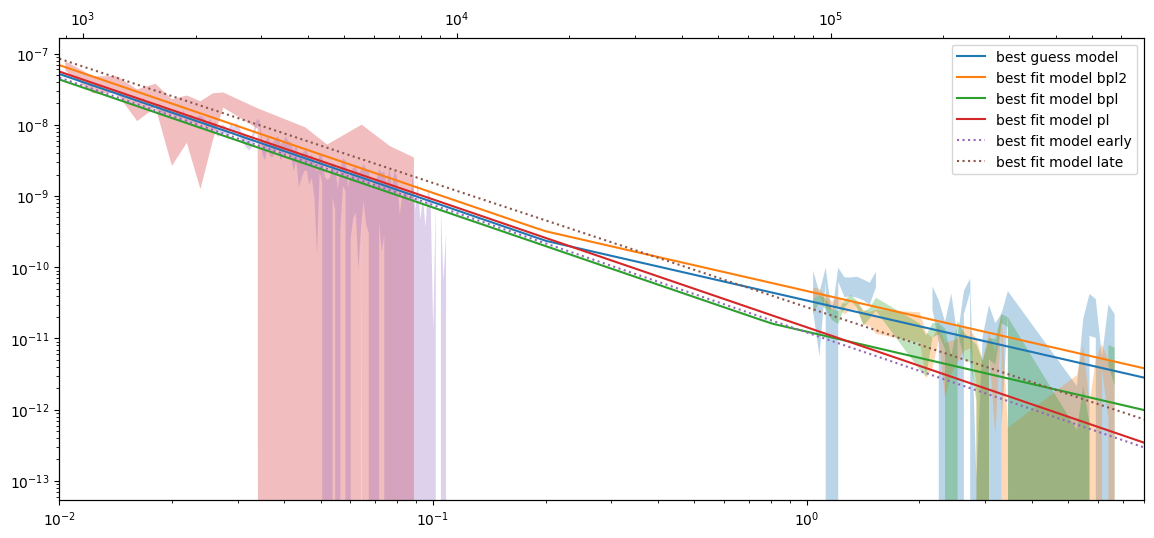

In [23]:
import numpy as np
import emcee
from scipy.stats import norm


plt.figure(figsize=(14, 6))


def fitit(ipick, p0_v = [np.log10(1e-11), -1.8]):
    ndim, nwalkers = len(p0_v), 100
    p0_c = np.array([p0_v]*nwalkers)
    p0 = norm(p0_c, p0_c.__abs__()*0.05).rvs()

    def log_prior(p):
        if not (-12.5 < p[0] < -10.5):
            return -np.inf
        
        if not (-3 < p[1] < -1):
            return -np.inf

        if len(p) > 2 and not np.isnan(p[2]) and not (0.01 < p[2] < 5):
            return -np.inf

        return 0.0
        

    def log_prob(p):
        mll = 0

        lp = log_prior(p)
        if not np.isfinite(lp):
            return -np.inf

        for n, d in lc_by_instrument.items():
            # print(n)
            if ipick(n):
            # if n in ['JMX1', 'JMX2', 'IBIS', 'picsit']:
                model = s_t_model_gen(*p)(d['t'], n)

                sigma2 = d['re']**2

                m = d['t'] > 1000./24/3600
                dev = ((model - d['r'])**2/sigma2)[m]
                
                c_mll = -0.5 * dev.sum() + np.log(sigma2.mean())

                # c_mll = norm(model, d['re']).logpdf(d['r']) #.sum()

                # print(p, 'model', s_t_model_gen(*p)(1, n), c_mll)
                
                mll += c_mll.sum()

        if np.isnan(mll):
            print("this returns NaN:", p, mll)
            return -np.inf
                
        return mll + lp

    # from multiprocessing import Pool

    # with Pool() as pool:
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob) #, pool=pool)
    sampler.run_mcmc(p0, nsampler, progress=True)

    p_best = [np.mean(np.percentile(r, [40, 60])) for r in sampler.flatchain.transpose()]
    p_range = [np.percentile(r, [5, 95]) for r in sampler.flatchain.transpose()]
    return {'p_best': p_best, 'p_range': p_range}


T = np.logspace(-2, 1, 100)

plt.plot(T, s_t_model_gen(np.log10(1.3e-11), -1.8, 0.8, -1.2, 0.2, -1.2)(T, 'picsit'), label="best guess model")

ag_fit = {}


r = fitit(lambda n: True, p0_v = [np.log10(1.3e-11), -1.8, 0.8, -1.2, 0.2, -1.2])
ag_fit['all_bpl2'] = r
plt.plot(T, s_t_model_gen(*r['p_best'])(T, 'picsit'), label=f"best fit model bpl2")

r = fitit(lambda n: True, p0_v = [np.log10(1.3e-11), -1.8, 0.8, -1.2])
ag_fit['all_bpl'] = r
plt.plot(T, s_t_model_gen(*r['p_best'])(T, 'picsit'), label="best fit model bpl")

r = fitit(lambda n: True, p0_v = [np.log10(1.3e-11), -1.8])
ag_fit['all_pl'] = r
plt.plot(T, s_t_model_gen(*r['p_best'])(T, 'picsit'), label="best fit model pl")

r = fitit(lambda n: n in ['acs', 'picsit'])
ag_fit['acs_picsit'] = r
plt.plot(T, s_t_model_gen(*r['p_best'])(T, 'picsit'), label="best fit model early", ls=":")

r = fitit(lambda n: n in ['JMX1', 'JMX2', 'IBIS'])
ag_fit['jmx_ibis'] = r
plt.plot(T, s_t_model_gen(*r['p_best'])(T, 'picsit'), label="best fit model late", ls=":")


plt.legend()

for n, d in lc_by_instrument.items():
    m = d['t'] > 0.01
    plt.fill_between(d['t'][m], 
                     (d['r'] - d['re'])[m] * conversion_for_instrument(n),
                     (d['r'] + d['re'])[m] * conversion_for_instrument(n), alpha=0.3)

plt.loglog()
plt.xlim([1e-2, 8])

xl_d = plt.gca().get_xlim()

plt.twiny()
plt.xlim(np.array(xl_d)*24*3600)
plt.semilogx()

plt.savefig("st_models.pdf")
plt.savefig("st_models.png")

# TODO: separate fits for two sections with a break
# TODO: make spectral real
# TODO: make steps with fill

In [24]:
for nm, m in ag_fit.items():
    pnames = ["N", "slope"]

    if nm == "all_bpl":
        pnames += ["t_br", "slope_pb"]

    elif nm == "all_bpl2":
        pnames += ["t_br", "slope_pb", "t_br_er", "slope_mid"]

    for n, p, pr in zip(pnames, m['p_best'], m['p_range']):
        print(nm, n, p, pr)
        m[n] = {
            'mean': p,
            'stat_err_minus': p - pr[0],
            'stat_err_plus': pr[1] - p
        }

ag_fit

all_bpl2 N -10.750085294702941 [-11.80732216 -10.02677604]
all_bpl2 slope -1.7942646371333812 [-1.93843261 -1.65994558]
all_bpl2 t_br 0.8045724616992014 [0.73519368 0.86373409]
all_bpl2 slope_pb -1.2024596490328632 [-1.30162591 -1.10579653]
all_bpl2 t_br_er 0.198617267834048 [0.18346712 0.21285687]
all_bpl2 slope_mid -1.2003755705840444 [-1.29617323 -1.09493992]
all_bpl N -10.959593006579366 [-11.75791088 -10.10240656]
all_bpl slope -1.7983879687438962 [-1.93391346 -1.6518932 ]
all_bpl t_br 0.8026250307551677 [0.74362299 0.85518669]
all_bpl slope_pb -1.2195966700104504 [-1.30068087 -1.10736474]
all_pl N -10.842576332339192 [-11.57360513  -9.97167703]
all_pl slope -1.7954193068403401 [-1.98932285 -1.663252  ]
acs_picsit N -10.915460694471305 [-11.85996077 -10.25508455]
acs_picsit slope -1.7891792168631433 [-1.91691799 -1.66324494]
jmx_ibis N -10.56117940740193 [-11.23196663 -10.0844785 ]
jmx_ibis slope -1.744987430703508 [-1.98869021 -1.24784329]


{'all_bpl2': {'p_best': [-10.750085294702941,
   -1.7942646371333812,
   0.8045724616992014,
   -1.2024596490328632,
   0.198617267834048,
   -1.2003755705840444],
  'p_range': [array([-11.80732216, -10.02677604]),
   array([-1.93843261, -1.65994558]),
   array([0.73519368, 0.86373409]),
   array([-1.30162591, -1.10579653]),
   array([0.18346712, 0.21285687]),
   array([-1.29617323, -1.09493992])],
  'N': {'mean': -10.750085294702941,
   'stat_err_minus': 1.0572368697546661,
   'stat_err_plus': 0.7233092560659706},
  'slope': {'mean': -1.7942646371333812,
   'stat_err_minus': 0.14416797553769523,
   'stat_err_plus': 0.13431905859193605},
  't_br': {'mean': 0.8045724616992014,
   'stat_err_minus': 0.06937877969067041,
   'stat_err_plus': 0.059161629417287975},
  'slope_pb': {'mean': -1.2024596490328632,
   'stat_err_minus': 0.09916625737678375,
   'stat_err_plus': 0.09666311869868971},
  't_br_er': {'mean': 0.198617267834048,
   'stat_err_minus': 0.01515014336372017,
   'stat_err_plus':

In [25]:

# import corner

# samples = sampler.get_chain(flat=False)
# flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)

# # _=plt.hist(samples[:, 0], 100, color="k", histtype="step")
# fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
# labels = ["m", "b", "log(f)"]
# for i in range(ndim):
#     ax = axes[i]
#     ax.plot(samples[:, :, i], "k", alpha=0.3)
#     ax.set_xlim(0, len(samples))
#     ax.set_ylabel(labels[i])
#     ax.yaxis.set_label_coords(-0.1, 0.5)

# axes[-1].set_xlabel("step number")

# _ = corner.corner(flat_samples)

# # plt.xlabel(r"$\theta_1$")
# # plt.ylabel(r"$p(\theta_1)$")
# # plt.gca().set_yticks([]);

In [26]:
lc_pdf = "lc.pdf"
rings = rings
relpos_history_pdf = "relpos_history.pdf"
st_models_pdf = "st_models.pdf"
comment_reconstruction = "assuming slope of -2"
theta_ons_min = theta[m_stable_ons_response].min()
theta_ons_max = theta[m_stable_ons_response].max()
approx_ons_t1_isot = Time(att_hist['POINTING_TIME'][m_stable_ons_response].min() + 51544, format='mjd').isot
approx_ons_t1_rel_d = att_hist['POINTING_TIME'][m_stable_ons_response].min() - T0_ijd
approx_ons_t2_isot = Time(att_hist['POINTING_TIME'][m_stable_ons_response].max() + 51544, format='mjd').isot
approx_ons_t2_rel_d = att_hist['POINTING_TIME'][m_stable_ons_response].max() - T0_ijd
ons_response_change_pc = 20 # check
ag_fit = ag_fit